# Enfriamiento Simulado para plegamiento de proteínas 2D.


## Diccionario con los 20 aminoácidos y sus correspondientes valores de la variación  de Energía libre:

aa_deltaG = { 'A': 1, # Alanine
 'C': 0.17, # Cysteine
 'D': -3, # Aspartic Acid
 'E': -2.6, # Glutamic Acid
 'F': 2.5, # Phenylalanine
 'G': 0.67, # Glycine
'H': -1.7, # Histidine
'I': 3.1, # Isoleucine
 'K': -4.6, # Lysine
 'L': 2.2, # Leucine
'M': 1.1, # Methionine
'N': -2.7, # Asparagine
 'P': -0.29,# Proline
 'Q': -2.9, # Glutamine
 'R': -7.5, # Arginine
 'S': -1.1, # Serine
 'T': -0.75,# Threonine
 'V': 2.3, # Valine
'W': 1.5, # Tryptophan
 'Y': 0.08 # Tyrosine}



In [1]:
aa_deltaG = { 'A': 1, # Alanine
 'C': 0.17, # Cysteine
 'D': -3, # Aspartic Acid
 'E': -2.6, # Glutamic Acid
 'F': 2.5, # Phenylalanine
 'G': 0.67, # Glycine
'H': -1.7, # Histidine
'I': 3.1, # Isoleucine
 'K': -4.6, # Lysine
 'L': 2.2, # Leucine
'M': 1.1, # Methionine
'N': -2.7, # Asparagine
 'P': -0.29,# Proline
 'Q': -2.9, # Glutamine
 'R': -7.5, # Arginine
 'S': -1.1, # Serine
 'T': -0.75,# Threonine
 'V': 2.3, # Valine
'W': 1.5, # Tryptophan
 'Y': 0.08 # Tyrosine
            }

In [2]:
import numpy as np
import math

# Problema 1
Se pide implementar una función get_spatial_dic(protein, structure) que recibe una cadena
representando una proteína (letras de aminoácidos) y otra cadena representando su estructura
(I para el aminoácido inicial, N, S, E o W según la posición relativa de un aminoácido con respecto
al anterior) y devuelve un diccionario o un diccionario vacío si existen solapamientos. Las claves
de dicho diccionario serán tuplas de dos números enteros representando coordenadas
espaciales y los valores serán letras de aminoácidos.

In [3]:
# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt

In [4]:
def get_last_key(dic): #Función que nos proporciona la última clave de un diccionario
    claves = list(dic.keys())
    return claves[-1]

In [5]:
def get_spacial_dic(protein, structure):
    result = {}
    for i in protein:
        cont = 0
        while(cont<len(protein)):
            if structure[cont]=='I':
                valor = protein[cont]
                clave = (0,0)
                result[clave] = valor 
                cont += 1
            else:
                valor = protein[cont]
                if structure[cont]=='N':
                    clave = (get_last_key(result)[0],get_last_key(result)[1]+1)
                elif structure[cont]=='S':    
                    clave = (get_last_key(result)[0],get_last_key(result)[1]-1)
                elif structure[cont]=='E':
                    clave = (get_last_key(result)[0]+1,get_last_key(result)[1])
                elif structure[cont]=='W':
                    clave = (get_last_key(result)[0]-1,get_last_key(result)[1])
                result[clave] = valor
                cont += 1
        #Comprueba si existe solapamiento
        if len(list(result.keys())) != len(protein):
            result = {}
        
    return result

In [6]:
def get_spacial_dic_modificado(protein, structure):
    result = {}
    x = 0
    y = 0
    for i in range(0, len(structure)):
        if structure[i] == 'I':
            result[(x,y)] = protein[i]
        elif structure[i] == 'N': 
            y += 1
            if (x,y) in result.keys():
                return {}
            result[(x,y)] = protein[i]
            
            
        elif structure[i] == 'S': 
            y -= 1
            if (x,y) in result.keys():
                return {}
            result[(x,y)] = protein[i]
            
        elif structure[i] == 'E':
            x += 1
            if (x,y) in result.keys():
                return {}
            result[(x,y)] = protein[i]
                
        elif structure[i] == 'W':
            x -= 1
            if (x,y) in result.keys():
                return {}
            result[(x,y)] = protein[i]
    return result

In [7]:
#La proteina ('PEPTIDE','IEENNWS') dará lugar al siguiente diccionario:
#{(0,0): 'P', (1,0): 'E', (2,0): 'P', (2,1): 'T', (2,2): 'I', (1,2): 'D', (1,1): 'E'}
print(get_spacial_dic_modificado('PEPTIDE','IEENNWS'))

{(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (2, 2): 'I', (1, 2): 'D', (1, 1): 'E'}


In [8]:
#prueba
p = "AAAAAAABBBBBB"
s = "INNESESESENNN"
print(len(p))
dic_proteina_prueba = get_spacial_dic(p,s)
print(dic_proteina_prueba)

13
{(0, 0): 'A', (0, 1): 'A', (0, 2): 'A', (1, 2): 'A', (1, 1): 'A', (2, 1): 'A', (2, 0): 'A', (3, 0): 'B', (3, -1): 'B', (4, -1): 'B', (4, 0): 'B', (4, 1): 'B', (4, 2): 'B'}


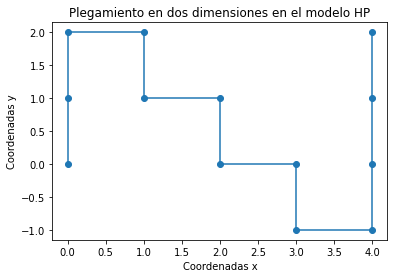

In [9]:
#prueba representar proteina 2D
claves_proteina = list(dic_proteina_prueba.keys())
lista_coordenadas_x = [i[0] for i in claves_proteina]
lista_coordenadas_y = [i[1] for i in claves_proteina]

fig, ax = plt.subplots()
ax.plot(lista_coordenadas_x, lista_coordenadas_y)
ax.scatter(lista_coordenadas_x, lista_coordenadas_y)

plt.xlabel('Coordenadas x')
plt.ylabel('Coordenadas y')
plt.title("Plegamiento en dos dimensiones en el modelo HP")
plt.show()

In [10]:
#La proteina ('PEPTIDE','IEENNWS') dará lugar al siguiente diccionario:
#{(0,0): 'P', (1,0): 'E', (2,0): 'P', (2,1): 'T', (2,2): 'I', (1,2): 'D', (1,1): 'E'}
print(get_spacial_dic('PEPTIDE','IEENNWS'))

{(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (2, 2): 'I', (1, 2): 'D', (1, 1): 'E'}


# Problema 2
• Se pide implementar una función is_hydrophobic(aa).

• Se pide implementar una función get_score(dic) que reciba un diccionario representando la
estructura espacial de una proteína y devuelva su puntuación. La puntuación de un aminoácido
será ΔG * N (si el aminoácido no es hidrofóbico) y ΔG * N + 10 * N (si el aminoácido es
hidrofóbico). Siendo N el número de posiciones adyacentes libres.

In [11]:
def is_hydrophobic(aa):
    aa_deltaG = { 'A': 1, # Alanine
 'C': 0.17, # Cysteine
 'D': -3, # Aspartic Acid
 'E': -2.6, # Glutamic Acid
 'F': 2.5, # Phenylalanine
 'G': 0.67, # Glycine
'H': -1.7, # Histidine
'I': 3.1, # Isoleucine
 'K': -4.6, # Lysine
 'L': 2.2, # Leucine
'M': 1.1, # Methionine
'N': -2.7, # Asparagine
 'P': -0.29,# Proline
 'Q': -2.9, # Glutamine
 'R': -7.5, # Arginine
 'S': -1.1, # Serine
 'T': -0.75,# Threonine
 'V': 2.3, # Valine
'W': 1.5, # Tryptophan
 'Y': 0.08 # Tyrosine
                } 
    res = False
    if aa in aa_deltaG:
        energia_libre = aa_deltaG[aa]
        if float(energia_libre) > -1.5:
            res = True
    return res

In [12]:
#Prueba: is_hydrophobic()
alanina = 'A'
lisina = 'K'
print("La Alanina es hidrofóbica --> ",is_hydrophobic('A'))
print("La Lisina NO es hidrofóbica --> ",is_hydrophobic('K'))

La Alanina es hidrofóbica -->  True
La Lisina NO es hidrofóbica -->  False


In [13]:
def posiciones_adyancentes(c,dic): #c=coordenadas2D del aminoácido, dic=diccionario 
    c_x = c[0]
    c_y = c[1]
    
    #print("Coordenadas 2D del aminoácido: ","x:",c_x,", y:",c_y)
    
    c_ady_n = (c_x,c_y+1)
    c_ady_s = (c_x,c_y-1)
    c_ady_e = (c_x+1,c_y)
    c_ady_w = (c_x-1,c_y)
    
    #print("Coordenadas adyacentes: N{0} , S{1}, E{2} ,W{3}".format(c_ady_n,c_ady_s,c_ady_e,c_ady_w))
    
    cont = 0
    
    if c_ady_n not in list(dic.keys()):
        cont += 1
        
    if c_ady_s not in list(dic.keys()):
        cont += 1
    
    if c_ady_e not in list(dic.keys()):
        cont += 1
    
    if c_ady_w not in list(dic.keys()):
        cont += 1

    return cont

In [14]:
#Prueba: posiciones_adyancentes()
p = "AAAAAAACCCCCC"
s = "INNESESESENNN"
dic_proteina_prueba = get_spacial_dic(p,s)
print(list(dic_proteina_prueba.keys()))
print('Posiciones adyacentes libres de A, (1, 1) --->',posiciones_adyancentes((1,1),dic_proteina_prueba))
print('Posiciones adyacentes libres de C, (3,-1) --->',posiciones_adyancentes((3,-1),dic_proteina_prueba))

[(0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (2, 1), (2, 0), (3, 0), (3, -1), (4, -1), (4, 0), (4, 1), (4, 2)]
Posiciones adyacentes libres de A, (1, 1) ---> 1
Posiciones adyacentes libres de C, (3,-1) ---> 2


In [15]:
def get_score(dic):
    aa_deltaG = { 'A': 1, # Alanine
 'C': 0.17, # Cysteine
 'D': -3, # Aspartic Acid
 'E': -2.6, # Glutamic Acid
 'F': 2.5, # Phenylalanine
 'G': 0.67, # Glycine
'H': -1.7, # Histidine
'I': 3.1, # Isoleucine
 'K': -4.6, # Lysine
 'L': 2.2, # Leucine
'M': 1.1, # Methionine
'N': -2.7, # Asparagine
 'P': -0.29,# Proline
 'Q': -2.9, # Glutamine
 'R': -7.5, # Arginine
 'S': -1.1, # Serine
 'T': -0.75,# Threonine
 'V': 2.3, # Valine
'W': 1.5, # Tryptophan
 'Y': 0.08 # Tyrosine
                } 
    res = 0
    cont = 0
    lista_claves = list(dic.keys())
    
    #print("Claves de dic: ",list(dic.keys()))
    #print("Valores de dic: ",list(dic.values()))
    #print("Claves de aa: ",list(aa_deltaG.keys()))
    
    #for i in list(aa_deltaG.keys()):
    for i in list(dic.values()):
        energia_libre = aa_deltaG[i] 
        #print("Energia libre ",energia_libre)
        #print("Hidrofóbico? ---> ",is_hydrophobic(i))
        if is_hydrophobic(i)==False:
            valor_coordenadas = lista_claves[cont]
            res += energia_libre*posiciones_adyancentes(valor_coordenadas,dic)
            cont += 1
            #print("Valor de contador: ",cont)
        else:
            valor_coordenadas = lista_claves[cont]
            res += energia_libre*posiciones_adyancentes(valor_coordenadas,dic)+10*posiciones_adyancentes(valor_coordenadas,dic)
            cont += 1
            #print("Valor de contador: ",cont)
    
    return res

In [16]:
#prueba: get_score()
print("Mostrando puntuación para la estructura espacial de una proteina prueba: ",get_score(dic_proteina_prueba))

Mostrando puntuación para la estructura espacial de una proteina prueba:  254.86999999999998


In [17]:
print(get_spacial_dic('PEPTIDE','IEENNWS'))
print("--------------------------------------------------------------------------------------------")
print(get_score(get_spacial_dic('PEPTIDE','IEENNWS')))
# 72.80000000000001

{(0, 0): 'P', (1, 0): 'E', (2, 0): 'P', (2, 1): 'T', (2, 2): 'I', (1, 2): 'D', (1, 1): 'E'}
--------------------------------------------------------------------------------------------
72.80000000000001


# Problema 3
• Se pide implementar una función fold(structure, pos, angle) que recibe una estructura, una
posición de plegado (desde donde se comienza a plegar) y el ángulo que puede ser 90 o –90.

• Se pide implementar una función get_successors(protein,structure) que, dada una proteína y su
estructura, devuelva un diccionario cuyas claves son todas las posibles estructuras válidas tras
aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios
espaciales obtenidos con get_spatial_dic. 

In [18]:
def fold(structure, pos, angle):
    list_estructura = list(structure) #Convertimos el string en list de string
    for i in range(pos, len(list_estructura)):
        posicion_estructura_plegado = list_estructura[i] #Accedemos a la posicion de la estructura que vamos a modificar
        if angle == 90:
            if posicion_estructura_plegado == 'N':
                list_estructura[i] = 'W'
            elif posicion_estructura_plegado == 'S':
                list_estructura[i] = 'E'
            elif posicion_estructura_plegado == 'E':
                list_estructura[i] = 'N'
            elif posicion_estructura_plegado =='W':
                list_estructura[i] = 'S'
            else:
                list_estructura[i] = 'I'
        else:
            if posicion_estructura_plegado == 'N':
                list_estructura[i] = 'E'
            elif posicion_estructura_plegado == 'S':
                list_estructura[i] = 'W'
            elif posicion_estructura_plegado == 'E':
                list_estructura[i] = 'S'
            elif posicion_estructura_plegado =='W':
                list_estructura[i] = 'N'
            else:
                list_estructura[i] = 'I'

        structure = "".join(list_estructura)
        i += 1
        
    return structure

In [19]:
#datos prueba
proteina_prueba = "AAAAAAABBBBBB"
structure_prueba = "INNESESESENNN"

#Vamos a probar con una estructura de una proteina para la 2da posicion y angulo de 90º --> Salida esperada: "I|E|NESESESENNN"
print("Mostrando salida de funcion fold() --> ", fold(structure_prueba,1,90))

Mostrando salida de funcion fold() -->  IWWNENENENWWW


In [20]:
print(fold('IEEEEEE',4,90))
# IEEENNN

IEEENNN


In [21]:
print(fold('IEEEEEE',4,-90))
# IEEESSS

IEEESSS


In [22]:
print(fold('IEENNWS',4,-90))
# IEENENW

IEENENW


In [23]:
def get_successors(protein, structure):   
    res = {}
    for i in range(len(structure)):
        #print("------------------------------------------")
        #print("Entrando en el 1er bucle: iteración -> ",i)
        clave = fold(structure,i,90)
        valor = get_spacial_dic_modificado(protein,clave)
        #print("")
        #print("Clave 1er bucle: ",clave)
        #print("Valor 1er bucle: ",valor)
        #print("------------------------------------------")
        #print("")
        if valor != {}:
            #print("Entrando en if del 1er bucle")
            res[clave] = valor
            #print("")
            
    for i in range(len(structure)):
        #print("******************************************")
        #print("Entrando en el 2do bucle: iteración ->",i)
        clave = fold(structure,i,-90)
        valor = get_spacial_dic_modificado(protein,clave)
        #print("")
        #print("Clave 1er bucle: ",clave)
        #print("Valor 1er bucle: ",valor)
        #print("******************************************")
        #print("")
        if valor != {}:
            #print("Entrando en if del 2do bucle")
            res[clave] = valor
            #print("")
    return res

In [24]:
def muestra_grafico_coordenadas(protein, structure):
    dic = get_successors(protein,structure)
    coordenadas = list(dic.values())
    for i in range(len(dic)):
        dic2 = coordenadas[i]
        li = list(dic2.keys())
        print("------------------------Mostrando estructura ",i+1," de la proteína---------------------------")
        print("Coordenadas 2D de cada aminoácido: ",list(dic2.keys()))
        print("Aminoácidos qu forman la estructura de la proteína: ",list(dic2.values()))

        lista_coordenadas_x = [l[0] for l in li]
        lista_coordenadas_y = [i[1] for i in li]
    
        
        lista_pos_hydrophobic = []
        lista_pos_no_hydrophobic = []
        #Indexamos las coordenadas de los hidrofóbios y los NO hidrofóbicos
        cont = 0 
        for a in list(dic2.values()):
            if is_hydrophobic(a):
                lista_pos_hydrophobic.append(cont)
                cont += 1
            else:
                lista_pos_no_hydrophobic.append(cont)
                cont += 1
        print("Posición de coordenadas hidrofóbicas en lista de coordenadas: ",lista_pos_hydrophobic)
        print("Posición de coordenadas NO hidrofóbicas en lista de coordenadas: ",lista_pos_no_hydrophobic)
        
        #Asignamos valores x e y en función del index anterior
        lista_coordenadas_x_hidrof = [lista_coordenadas_x[i] for i in lista_pos_hydrophobic]
        lista_coordenadas_x_no_hidrof = [lista_coordenadas_x[i] for i in lista_pos_no_hydrophobic]
        lista_coordenadas_y_hidrof = [lista_coordenadas_y[i] for i in lista_pos_hydrophobic]
        lista_coordenadas_y_no_hidrof = [lista_coordenadas_y[i] for i in lista_pos_no_hydrophobic]
        
        fig, ax = plt.subplots()
        ax.plot(lista_coordenadas_x, lista_coordenadas_y)
        ax.scatter(lista_coordenadas_x_hidrof, lista_coordenadas_y_hidrof, c='green')
        ax.scatter(lista_coordenadas_x_no_hidrof, lista_coordenadas_y_no_hidrof, c='red')
        plt.legend(("","Hidrofóbico","No hidrofóbico"), loc = "best")

        plt.xlabel('Coordenadas x')
        plt.ylabel('Coordenadas y')
        plt.title("Plegamiento en dos dimensiones en el modelo HP")
        plt.show()

In [25]:
def muestra_grafico_coordenadas_estructura_unica(protein, structure):
    dic_spacial = get_spacial_dic_modificado(protein, structure)
    li = list(dic_spacial.keys())
    
    lista_coordenadas_x = [l[0] for l in li]
    lista_coordenadas_y = [i[1] for i in li]
    
    lista_pos_hydrophobic = []
    lista_pos_no_hydrophobic = []
    #Indexamos las coordenadas de los hidrofóbios y los NO hidrofóbicos
    cont = 0 
    for a in list(dic_spacial.values()):
        if is_hydrophobic(a):
            lista_pos_hydrophobic.append(cont)
            cont += 1
        else:
            lista_pos_no_hydrophobic.append(cont)
            cont += 1
            
    lista_coordenadas_x_hidrof = [lista_coordenadas_x[i] for i in lista_pos_hydrophobic]
    lista_coordenadas_x_no_hidrof = [lista_coordenadas_x[i] for i in lista_pos_no_hydrophobic]
    lista_coordenadas_y_hidrof = [lista_coordenadas_y[i] for i in lista_pos_hydrophobic]
    lista_coordenadas_y_no_hidrof = [lista_coordenadas_y[i] for i in lista_pos_no_hydrophobic]
        
    fig, ax = plt.subplots()
    ax.plot(lista_coordenadas_x, lista_coordenadas_y)
    ax.scatter(lista_coordenadas_x_hidrof, lista_coordenadas_y_hidrof, c='green')
    ax.scatter(lista_coordenadas_x_no_hidrof, lista_coordenadas_y_no_hidrof, c='red')
    plt.legend(("","Hidrofóbico","No hidrofóbico"), loc = "best")

    plt.xlabel('Coordenadas x')
    plt.ylabel('Coordenadas y')
    plt.title("Plegamiento en dos dimensiones en el modelo HP")
    plt.show()

In [26]:
print("Se han obtenido un total de ",len(get_successors('PEPTIDE','IEENWWN')))
get_successors('PEPTIDE','IEENWWN')


#{'ISSENNE': {(0, 0): 'P',
#  (0, -1): 'E',
#  (0, -2): 'P',
#  (1, -2): 'T',
#  (1, -1): 'I',
#  (1, 0): 'D',
#  (2, 0): 'E'},
# 'INNWSSW': {(0, 0): 'P',
#  (0, 1): 'E',
#  (0, 2): 'P',
#  (-1, 2): 'T',
#  (-1, 1): 'I',
#  (-1, 0): 'D',
#  (-2, 0): 'E'},
# 'IESENNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (1, -1): 'P',
#  (2, -1): 'T',
#  (2, 0): 'I',
#  (2, 1): 'D',
#  (3, 1): 'E'},
# 'IEEENNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (3, 0): 'T',
#  (3, 1): 'I',
#  (3, 2): 'D',
#  (4, 2): 'E'},
# 'IEENNNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (2, 2): 'I',
#  (2, 3): 'D',
#  (3, 3): 'E'},
# 'IEENWNE': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (1, 1): 'I',
#  (1, 2): 'D',
#  (2, 2): 'E'},
# 'IEENWWW': {(0, 0): 'P',
#  (1, 0): 'E',
#  (2, 0): 'P',
#  (2, 1): 'T',
#  (1, 1): 'I',
#  (0, 1): 'D',
#  (-1, 1): 'E'}}

Se han obtenido un total de  7


{'INNWSSW': {(0, 0): 'P',
  (0, 1): 'E',
  (0, 2): 'P',
  (-1, 2): 'T',
  (-1, 1): 'I',
  (-1, 0): 'D',
  (-2, 0): 'E'},
 'IEENWWW': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (0, 1): 'D',
  (-1, 1): 'E'},
 'ISSENNE': {(0, 0): 'P',
  (0, -1): 'E',
  (0, -2): 'P',
  (1, -2): 'T',
  (1, -1): 'I',
  (1, 0): 'D',
  (2, 0): 'E'},
 'IESENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (1, -1): 'P',
  (2, -1): 'T',
  (2, 0): 'I',
  (2, 1): 'D',
  (3, 1): 'E'},
 'IEEENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (3, 0): 'T',
  (3, 1): 'I',
  (3, 2): 'D',
  (4, 2): 'E'},
 'IEENNNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (2, 2): 'I',
  (2, 3): 'D',
  (3, 3): 'E'},
 'IEENWNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (1, 2): 'D',
  (2, 2): 'E'}}

------------------------Mostrando estructura  1  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (0, 1), (0, 2), (-1, 2), (-1, 1), (-1, 0), (-2, 0)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


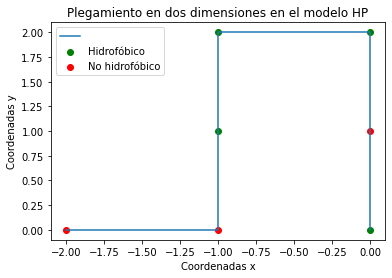

------------------------Mostrando estructura  2  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (0, 1), (-1, 1)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


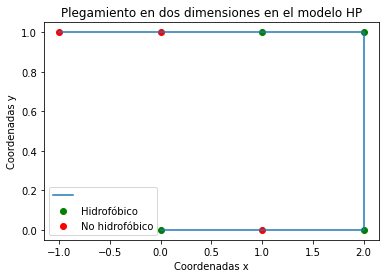

------------------------Mostrando estructura  3  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (0, -1), (0, -2), (1, -2), (1, -1), (1, 0), (2, 0)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


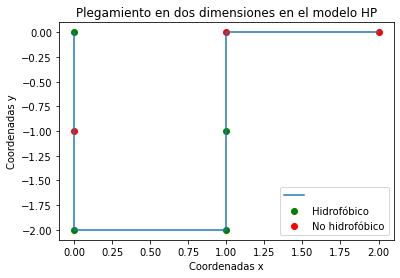

------------------------Mostrando estructura  4  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (1, 0), (1, -1), (2, -1), (2, 0), (2, 1), (3, 1)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


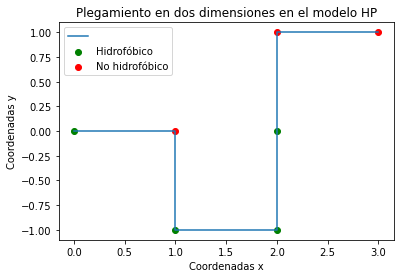

------------------------Mostrando estructura  5  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


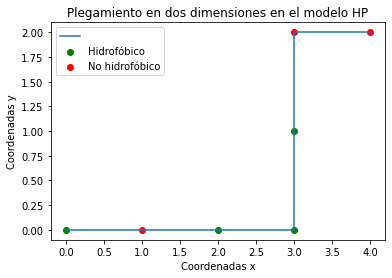

------------------------Mostrando estructura  6  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


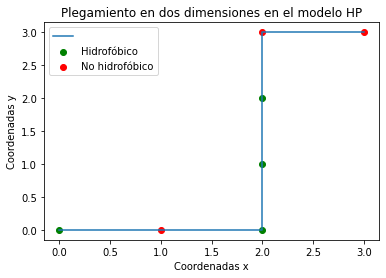

------------------------Mostrando estructura  7  de la proteína---------------------------
Coordenadas 2D de cada aminoácido:  [(0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (1, 2), (2, 2)]
Aminoácidos qu forman la estructura de la proteína:  ['P', 'E', 'P', 'T', 'I', 'D', 'E']
Posición de coordenadas hidrofóbicas en lista de coordenadas:  [0, 2, 3, 4]
Posición de coordenadas NO hidrofóbicas en lista de coordenadas:  [1, 5, 6]


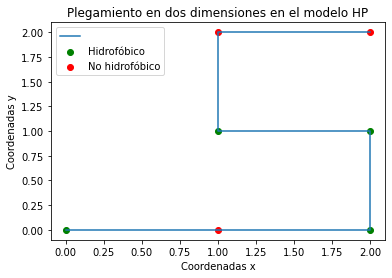

In [27]:
muestra_grafico_coordenadas('PEPTIDE','IEENWWN')

# Problema 4
• Usando las funciones creadas en los problemas anteriores, implementa el algoritmo de
Enfriamiento Simulado (Simmulating Annealing) para resolver el problema del plegado 2D como
un problema de optimización.


In [28]:
def genera_todos_norte(protein):
    structure = ''
    for i in range(0, len(protein)):
        if i == 0:
            structure += ''.join('I')
        else:
            structure += ''.join('N')
    return structure

In [29]:
Q8NHC7 = 'MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV'

def prueba_simulated_annealing4(protein, tInit=100, nIters=100, factor=0.99, nCoolins = 100):
    act = genera_todos_norte(protein)
    t = tInit
    tope = nIters
    t2 = 0
    while t > 0.1 and nCoolins > t2:
        est = act
        it = 0
        print('While INTERNO:')
        print('')
        while it != tope:
            sig = np.random.choice(list(get_successors(protein,est).keys()))
            iE = get_score(get_spacial_dic_modificado(protein,sig)) - get_score(get_spacial_dic_modificado(protein,est))
            if iE < 0:
                est = sig
            else:
                q = min(1,e**(-iE/t))
                if np.random.random() < q:
                    est = sig
            it = it + 1
        act = est
        t = t*factor 
        t2 = t2 + 1
        print('')
        print('Valor it: ',it)
        print('Valor t2: ',t2)
        print('-> Estructura: ',act)
        print('-> Score: ',get_score(get_spacial_dic_modificado(Q8NHC7,act)))
        print('-> Variable t: ',t)
        muestra_grafico_coordenadas_estructura_unica(Q8NHC7,act)
        print('')
    return act

In [ ]:
prueba_simulated_annealing4(Q8NHC7, nCoolins = 300)

While INTERNO:



# Problema 5
Dada una proteína podemos predecir un plegamiento 2D de la misma gracias a los algoritmos
implementados durante el desarrollo de este trabajo.

• Se pide probar estos algoritmos con al menos otras tres proteínas sencillas cuya secuencia de
aminoácidos y descripción sea extraída desde UNIPROT.

• Se pide hacer una representación gráfica de las estructuras 2D resultante con pyplot. Coloreando
de distinto color los aminoácidos dependiendo de si son hidrofóbicos o no.

• Por último, OPCIONALMENTE para optar a nota extra, se pide intentar implementar un gradiente
de color dependiendo del valor ΔG del correspondiente aminoácido.


While INTERNO:


Valor it:  100
Valor t2:  1
-> Estructura:  INNNNNNNNNNNNNNNNNESSSSSSSSSSSSSSSSSSWWNNNNWWWSSWSSSSWWWSEEESWSSWSSSSWSSWWSSEESSSSSSENENNEEESWSESSSSENNESSEENNNENESSSENENENWNNEENNW
-> Score:  1671.82
-> Variable t:  99.0


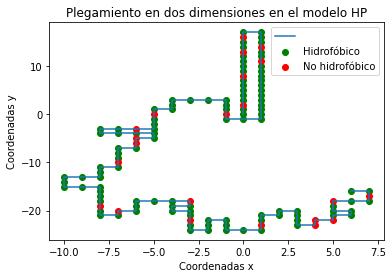


While INTERNO:


Valor it:  100
Valor t2:  2
-> Estructura:  IESSWNWWNNNNWWWWWWNEEEEEEEENNNEENNNENNNENNWWWWWWNWNWNWSWWSWWNENNNWWSSWSSWSEEESWWSWWNWSSSSSSSSWSEESSWSSSSWWWWSWWWSSWWWSWNWNWSWWNWNNW
-> Score:  2022.7399999999998
-> Variable t:  98.01


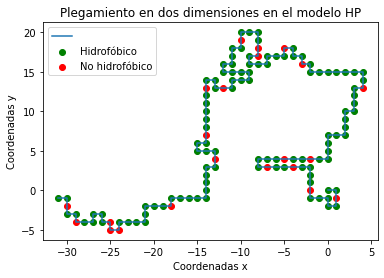


While INTERNO:


Valor it:  100
Valor t2:  3
-> Estructura:  ISWSWWSESEEEEEEENNNEENWNENNWSWNWSSWNWWWNWNEESEENNWWWNWSWWSWWWNWWNWWSWWWNENWWSWNNWNNENENNNNNWNENWNNNNWNNWNNNWSWWWSSWWWSWNWWSESESWWSW
-> Score:  1770.8400000000001
-> Variable t:  97.0299


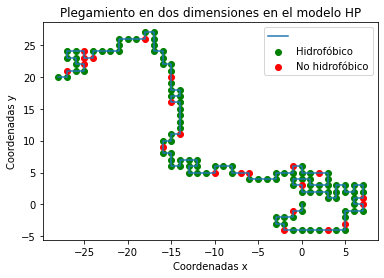


While INTERNO:


Valor it:  100
Valor t2:  4
-> Estructura:  IESSWNWWWWWWNENNNNWNWWWNNWNWSWNWWWNNWSWNWWNNENNWNWWNENWWWSWSSWSSWSSWNWWNENWWSWNNWWSWWWWWSWWSWNNNENEENEENNNNENEENNNENENESESEESSWWSSW
-> Score:  2027.1500000000003
-> Variable t:  96.059601


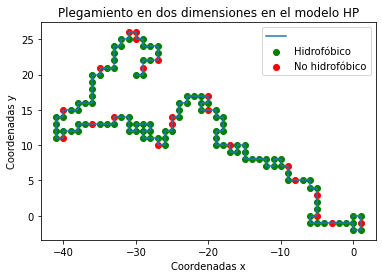


While INTERNO:


Valor it:  100
Valor t2:  5
-> Estructura:  ISWWSWSESWSEESEENNNESENEENEENNESSESSENNENENWNEENENNNENNNENENWNWWNENNENNNEENNWWNNWNEENWWNNNNWNNNNENESENEEENENWNWWNWWSSSWNNNNNEESENNN
-> Score:  1837.3099999999995
-> Variable t:  95.09900499


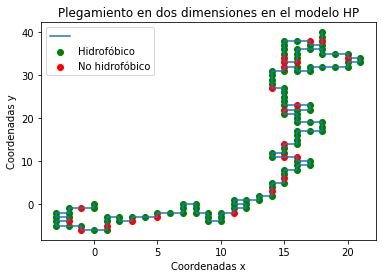


While INTERNO:


Valor it:  100
Valor t2:  6
-> Estructura:  IWNWWWSESWSSSSESEEESWWSWWSWWSSWNWSWWSEESESSESWSSSSSWWSEEEESEESENESESSSSWNNWWWWNWSWWSSSESWSWSSEENENESSSEEEEENWNNNENENNNESSSSSSEEEESW
-> Score:  1791.6799999999996
-> Variable t:  94.1480149401


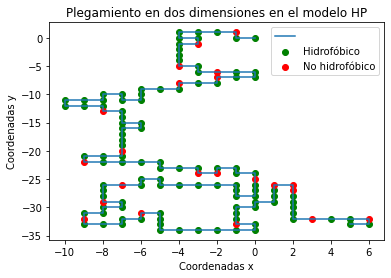


While INTERNO:


Valor it:  100
Valor t2:  7
-> Estructura:  IWNNNENWNENWWNWNWWWNNNWWSESWSSSSEESSEEESESSSWNNWWSSWSESSSESESWSESSESWSWWNENWWSSWSWNWWWSWNWWSSSSESEESSSWSSSWSSSSESSWSSSWSESSSSEEEESW
-> Score:  1816.1499999999996
-> Variable t:  93.206534790699


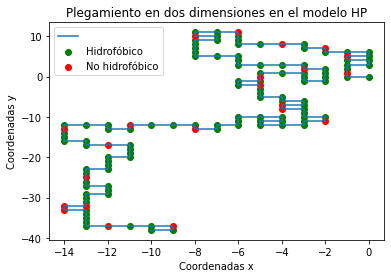


While INTERNO:


Valor it:  100
Valor t2:  8
-> Estructura:  IWWSWNWSWWWSSWWWSWWSESSSSESSSEESENEEEEESESEESWSSSEENNNESSEENESSESSSSSSWWNWSSWSSWSWNWWWSWNWWSSSSESEESSEENENEEESWSSSWWSSWSSWNNNNWSWWW
-> Score:  2032.95
-> Variable t:  92.27446944279201


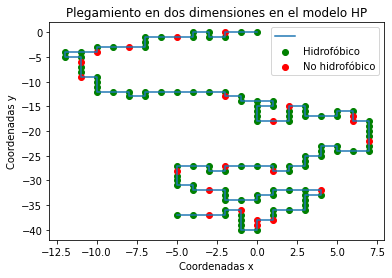


While INTERNO:


Valor it:  100
Valor t2:  9
-> Estructura:  IWNNESEESEENNNNNWNNWWNWWWNENENWNWWNWNWNNWNNWWNNNENNWWWWNNWWWNNWSWWWNWSWNNWSSWSESSWNWSSEESSWWWSSESEESWSSSWSWSESWSSESSEESESWSSWSWWWWN
-> Score:  1960.6800000000005
-> Variable t:  91.35172474836409


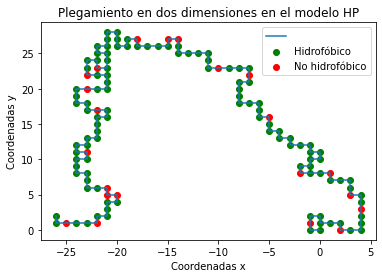


While INTERNO:


Valor it:  100
Valor t2:  10
-> Estructura:  IESENEENEEENWNNEEESESWSEESENENWNWNENENWNWNWWWWWWNWWWWNWNNWWSSSWSWWWNWWNNNNWNENWNNESENNWWNWNNNNWSSWSESSSWNWNWWSWSSWWSSSWWSWSEESSWWWN
-> Score:  1863.5800000000002
-> Variable t:  90.43820750088045


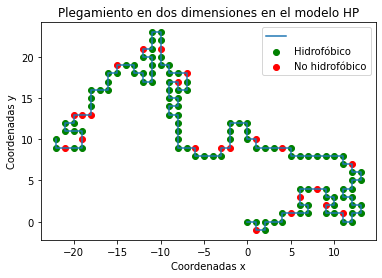


While INTERNO:


Valor it:  100
Valor t2:  11
-> Estructura:  IESENEEENENNNWWNWWNWNENWWWNNNWSSSSSSWSESSWSSSSSSWSSENEEESESSWSWWWSSWWSSWWWWNNWSWSSWSEENESEEEESENESSWWSESSESSSSWSSWWSWWWWSWSEESESSWN
-> Score:  1916.4799999999996
-> Variable t:  89.53382542587164


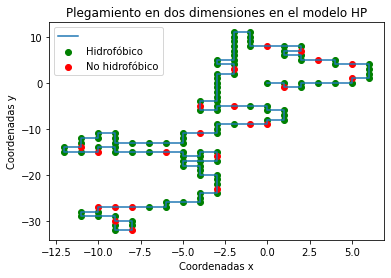


While INTERNO:


Valor it:  100
Valor t2:  12
-> Estructura:  IEEEESSWSWWWWSSSESWSESENNNESSENNNNESSENENNNWNENWNWNWWNNWNWNNENEENWWNNWWNNNNNNWSWNNEEEENESESSSSSENEESSSESSENNNNEEEENNNWWNNNWNNEESEEN
-> Score:  1775.94
-> Variable t:  88.63848717161292


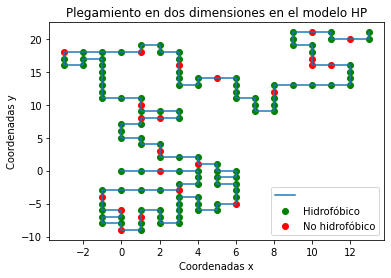


While INTERNO:


Valor it:  100
Valor t2:  13
-> Estructura:  INNNNEESESSWNWSSSWWWWWSSSSWNNWSWWWWNNWWNNWNWWWWSWSSESWWWNWWSWSSWSSSSWSWNWWWWNWWWNNENWWSWNWNNNWNNNEESEENEEENNNWNNWNWNEEESSENNNEEENWW
-> Score:  1981.559999999999
-> Variable t:  87.75210229989679


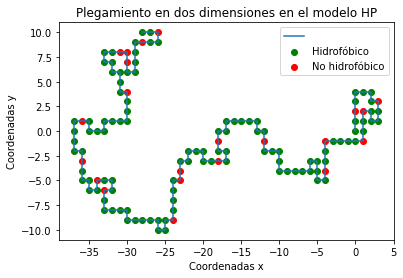


While INTERNO:


Valor it:  100
Valor t2:  14
-> Estructura:  INWNWNNENEESWSEEESWSSSENEEEEENWWWNNEENESSESEENEEENENESSESEESSESWSSSWWWSSSSWSWWWNWNENWWSWNWNWWSSSSSESSSWNNWSWWSSSEENEEENESSSESWWWSEE
-> Score:  1803.0899999999992
-> Variable t:  86.87458127689783


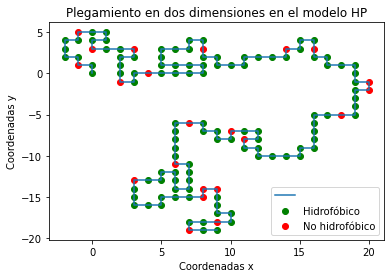


While INTERNO:


Valor it:  100
Valor t2:  15
-> Estructura:  INWWSWSWSWWNNNWWWNEEEENWNNNWWSESSWWNWWWNNWSSSESESESSWNWSSESSSENEEESWWSEEEESSWSEEESSENNNEENENNNNWNEESENESSEESSESSESSWWSSWSSSEEEEEESS
-> Score:  1778.9699999999998
-> Variable t:  86.00583546412885


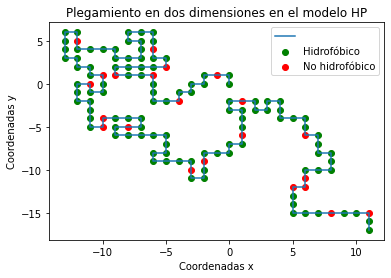


While INTERNO:


Valor it:  100
Valor t2:  16
-> Estructura:  IEEEEENNWWWNWWSESWWWWNWSWNNNNWSWWNNENNWNNWSWWSWSWSWSSWSWSESWWSEEENESSENESSWSWSEENENENNESSSWSSSSSWWWNWWNNWSSWWWNNWNWWWWWWSSSEESEENEE
-> Score:  1734.9999999999998
-> Variable t:  85.14577710948755


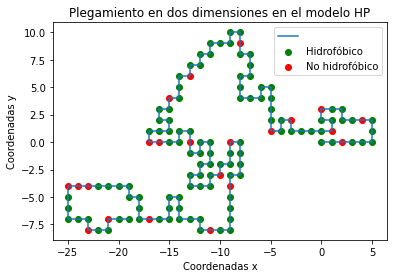


While INTERNO:


Valor it:  100
Valor t2:  17
-> Estructura:  IWNNESEESSSSEENWNENNESENNESESSEENNNENNWWSSWNNNNWWSWNNEEENWNEEENNNNESSENEEEENEENNWNWNNNESENENENNWWNNENWNENWWSWSWNWNWWSSSWSWWSESSSSSE
-> Score:  1713.7700000000002
-> Variable t:  84.29431933839268


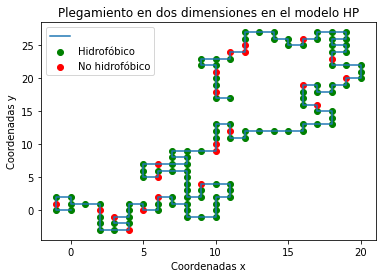


While INTERNO:


Valor it:  100
Valor t2:  18
-> Estructura:  IWWNENNNNWSSWWWSWWSESWSSWWNWNENNWWNENNWWWWNEENNWWWNENEESENESSEENNNESSENEENESSSEENENEEESWSESESESENNNENNNNNWWSWNNENEENESESEEENWNEENNW
-> Score:  1832.4099999999999
-> Variable t:  83.45137614500875


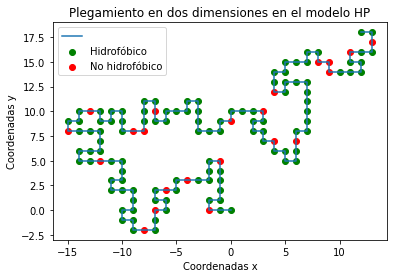


While INTERNO:


Valor it:  100
Valor t2:  19
-> Estructura:  IWWNEEEENNWNEEENEENWNNWWNEENEENEENESSENNENNENWWSSWWWSWWNWWNNWWWSWSWNNWWWWWWNNNWWWNNENNEENWNWWWNWSSWNNWWWWSWSSWWWSSSSWNWNNWNWWWNWSSE
-> Score:  1869.3699999999997
-> Variable t:  82.61686238355867


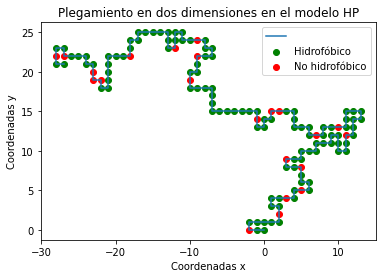


While INTERNO:


Valor it:  100
Valor t2:  20
-> Estructura:  IEEESSESEENESSENENENEEENNNWSWWSWNNWNNWSWNWNENWNNNENEEENEENENEENWNWWNEENENWWNEEEEESSWSEEEENENEESENNESSESSENEEEEEENESSSWSSEESWWWNWSSS
-> Score:  1827.6599999999994
-> Variable t:  81.79069375972308


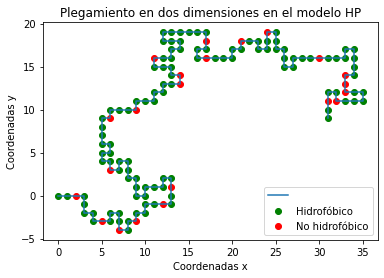


While INTERNO:


Valor it:  100
Valor t2:  21
-> Estructura:  INNEENWWNNWNNNWWNWNWNNEEESENEEEENNWNENNENWNNWSWNWNWNNNNEENENNENWNNNNNWWNWSSSWNNWWNNNWSSSSWNWSSWSEESWWWNNWSSSSSSWSSWWNENNWWWSSWNNWWW
-> Score:  1763.9700000000005
-> Variable t:  80.97278682212585


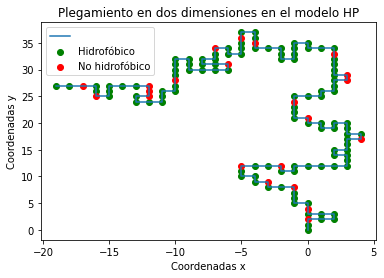


While INTERNO:


Valor it:  100
Valor t2:  22
-> Estructura:  IEESSSEESSSWNNWWWSWSWWNWSWWSSSWWSEEESESSENESESESESESWWSWSESSWNWSSSESEEESENNNEEENESEENWNNNESENESEEESWSEESSESWWWSWWNWSSWWSSWSSSWNNWWN
-> Score:  1866.6400000000003
-> Variable t:  80.1630589539046


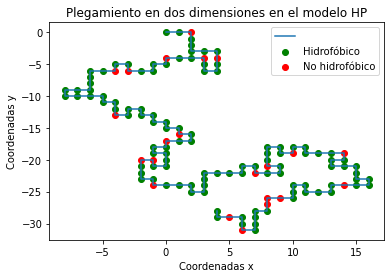


While INTERNO:


Valor it:  100
Valor t2:  23
-> Estructura:  INEENWWWSWWNENWWWWNWNWWSESWSSWNNWSWNNNEENNWNNEEENNNWNNESENENWNWSWWNWWNNENWNWNNENESEENWNENNENWNEENESSENNESESSEEESSWWSWWWSESESEESWSES
-> Score:  1698.58
-> Variable t:  79.36142836436555


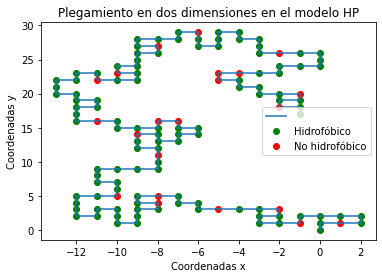


While INTERNO:


Valor it:  100
Valor t2:  24
-> Estructura:  INESSSWNWNWWWSSWWSWSWNWWSWNWWSWWSSSWWWWSESSWSSESEESEEESWSEEEESEESESWSWNNWSWSWSWSSWSSSESWSESEEESSESWWSWWSSSSSEEEEESENEESENENESESSWSS
-> Score:  1918.2499999999998
-> Variable t:  78.56781408072189


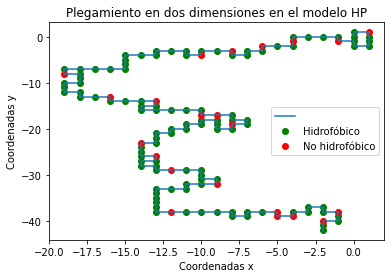


While INTERNO:


Valor it:  100
Valor t2:  25
-> Estructura:  IWNEEESWSWSWWSSWWSSEEENENWNEENESENEEENENNEESESESEEENNWNEEEEEESEENWNENNEENESESESESENNNWWNNNEEEESWSESSESSWSESWSEESSWSSSEENNEENENENNNE
-> Score:  1781.1699999999998
-> Variable t:  77.78213593991467


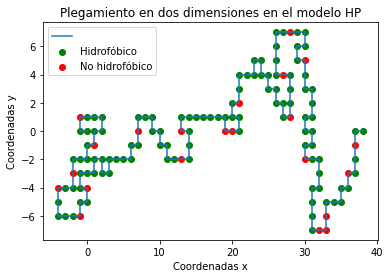


While INTERNO:


Valor it:  100
Valor t2:  26
-> Estructura:  IEEENNWNWWNEENNENWNWWNWNNWWNNWNEENESEESEEENENENENNNNENNNNWNWNENNWSWWSWNWSWNNNWNNENWWNWNNNNENNWWNWSSSESSSSSWWSSWSSWWWWSWSESWWSESSWSW
-> Score:  1959.3999999999996
-> Variable t:  77.00431458051553


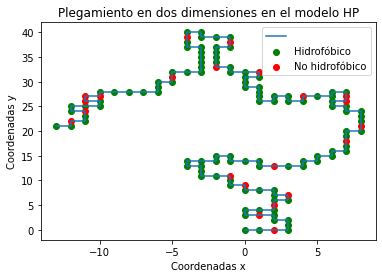


While INTERNO:


Valor it:  100
Valor t2:  27
-> Estructura:  ISSESENEEESWSEESSEENNEESEEEEENESSESWSSWNWWSWSWWWSSESWSWSSESSWWWNWSWWSSWNWWWSWSWSWNNNNWWWWWNWWWWNWNWSSWSSWWNNWWNWSSSSSSWSSSWWSESWSSS
-> Score:  2077.5499999999993
-> Variable t:  76.23427143471037


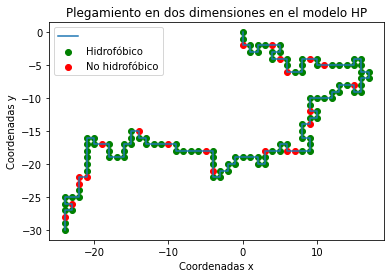


While INTERNO:


Valor it:  100
Valor t2:  28
-> Estructura:  IESESESWSWNNWSSSWSSSSSWWSEESSEESWSESEESWWWSWWNENNWSWNNNWWSWWNWWNNWNNWWNEENNWNENWNNWSSWSSSSWWWNNENENWWNWNENNNENENWWSWWSSWSSWWWWNNNES
-> Score:  1668.5599999999995
-> Variable t:  75.47192872036327


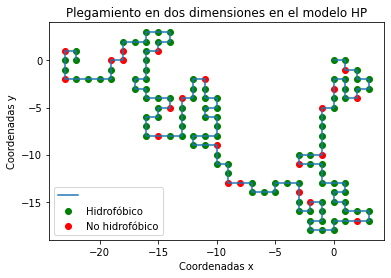


While INTERNO:


Valor it:  100
Valor t2:  29
-> Estructura:  ISENENESESWWSESEEEEEEESWWSESESESWSSSESEENEEENESEENWNEEENNNENENNEEESENNWNNNWSWNWSWNWWNNNWWNEEEENENENWWWSWNWWNNWWSWNWWSSWNWSSSSSWSSWN
-> Score:  1807.7500000000005
-> Variable t:  74.71720943315964


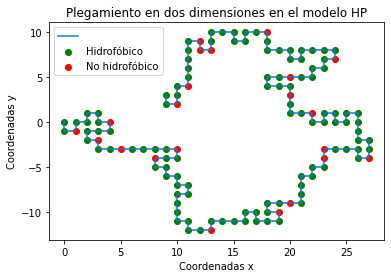


While INTERNO:


Valor it:  100
Valor t2:  30
-> Estructura:  IWSSSEESSWSWSSSEESSEEESWWSSWSSEEEEESESEESSWWSWWSSESWWWWSESWSEEEEESWSEENEESENESSEEEEEENNWWWNNNENENENNNNNNENESSEENESESSESWWSSEEESSWWN
-> Score:  2006.7999999999997
-> Variable t:  73.97003733882804


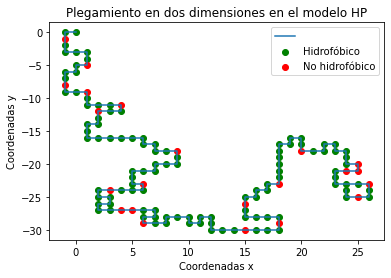


While INTERNO:


Valor it:  100
Valor t2:  31
-> Estructura:  IWSSSSWWWWSWSESWSWWSESSWWWSWWNWWSESWSSESWWNWWNNWWWSWNWWSESWSSSSWWNENWWWWNENNEEENNNWSWWNWWWNWWNNENENWWWSWNWNENWWWNNWWWSWNNWWWWWWWWWN
-> Score:  1821.07
-> Variable t:  73.23033696543976


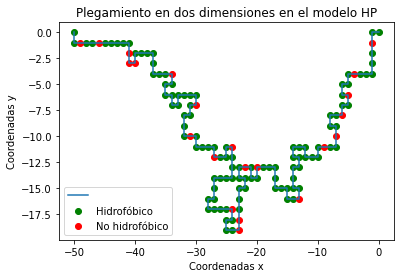


While INTERNO:


Valor it:  100
Valor t2:  32
-> Estructura:  IWNNEEEESSEENWNEEEEENEESSENENENNWSWNNNWWNNENWNWSWWSSWSWWSWNNNWWNNNENWNWSSWSSWSSSSWWWNWNNNNWSSSWNWNWSSSEESESWSSSSSWWSEESWSSESENNENES
-> Score:  1830.7600000000002
-> Variable t:  72.49803359578536


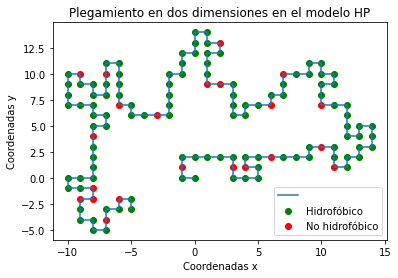


While INTERNO:


Valor it:  100
Valor t2:  33
-> Estructura:  IWSSWWNWNENENWNNNNENWNNESEEENNWNWSWNNNNNEEENWNNWNEEEENESESWSSEESESWSESSSSSENENNNWNNNNWNEEENWNNESESSEEENNENESSSSEEEENWWNNWNNEENNWNNE
-> Score:  1752.8700000000001
-> Variable t:  71.7730532598275


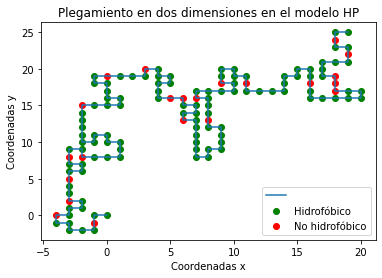


While INTERNO:


Valor it:  100
Valor t2:  34
-> Estructura:  IEESENENEENENWNNEESENEESWSWWSSESENEENEEESSSSEEEESSSWSEESEEENENESESWSESESEEENEEESESEESEESSSENEENENESESSEEENNENWWWWNENNEEENNWNWWWSWNW
-> Score:  1936.479999999999
-> Variable t:  71.05532272722922


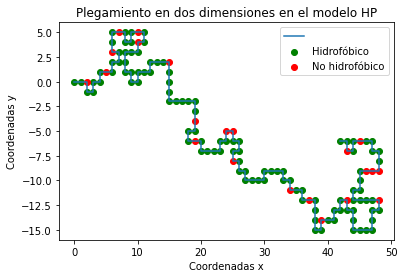


While INTERNO:


Valor it:  100
Valor t2:  35
-> Estructura:  IESSENNNENWNWSSWWSWWSWSWWSWWSESWWSWWWNNWNNNNWWWWWWSSSWWNNENWNWNNWNNWWNWNNNNWNEENWNNNENEESEENENNENEENNNESSEEENENNWWNWWNNEEENENWNNESE
-> Score:  1910.9099999999994
-> Variable t:  70.34476949995693


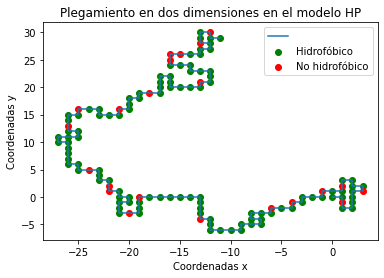


While INTERNO:


Valor it:  100
Valor t2:  36
-> Estructura:  ISSWSWWNENWNNWSWWWWSESSWNWWWWSWNNWSSSWSSSWSWSEESSSEEENESSSEEEESWSWWSESESSSEESWWWWNNNNWWWWSWWWWWWWNENWWNWWWWWSWSWWSSESWSWSSESWSWWNEN
-> Score:  1839.9999999999998
-> Variable t:  69.64132180495736


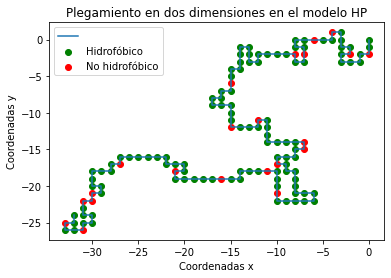


While INTERNO:


Valor it:  100
Valor t2:  37
-> Estructura:  IWSWWNNWNWSWWWSSSSSEESSWNWWSWSWNWSSEESWWWWSWWSESSSSEENESSEENESEEEESENNWNENWWNENNWNENEESSEESWSWSSESWSESSEENESESSWWWWSWNWWSSEESESSSWS
-> Score:  1763.2100000000003
-> Variable t:  68.94490858690779


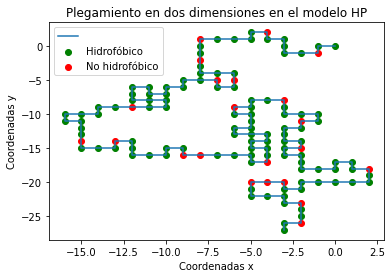


While INTERNO:


Valor it:  100
Valor t2:  38
-> Estructura:  IWSWWWWSWWSWNWSSWNNWWNNNNWWSSESWSSSSSWNNNNWNNWSWNNNNNWNEEENNESENNESENNWNENWWWWSWSWWSWWNWWWWNWWNENNNWSWWWSSSSSWSWSSSSWNNNWWSSSESSWWW
-> Score:  1810.6699999999996
-> Variable t:  68.25545950103871


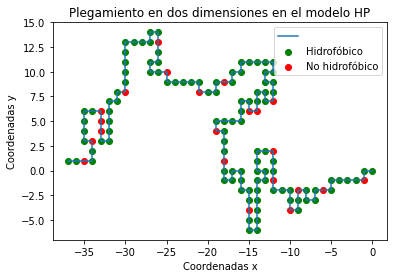


While INTERNO:


Valor it:  100
Valor t2:  39
-> Estructura:  IWSWWNWSSSEESEENESENNNNEENENNWNENNWNNESENNWNWSWNWNNESEENWNNNESENNESENEESSSESENNNWNNWNNENWWNENNNEEEENNEEEEEEESESSENESSEEENENNWSWSWNN
-> Score:  1665.3199999999995
-> Variable t:  67.57290490602833


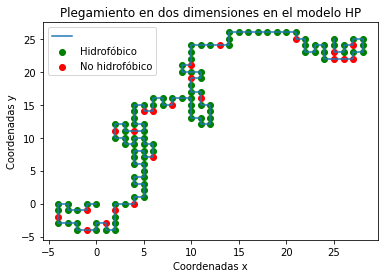


While INTERNO:


Valor it:  100
Valor t2:  40
-> Estructura:  IWWNEENWWNWWNWWSSWNWWWWNNNENENESESEENESESSEENWNNWNNNNNNNWNWWWWSEESWSESSWWNWNWSSWWNNNENEENWWNWWNEEEENNWNWWNNNESEENWNWWWNNESEENNENESE
-> Score:  1643.7099999999996
-> Variable t:  66.89717585696805


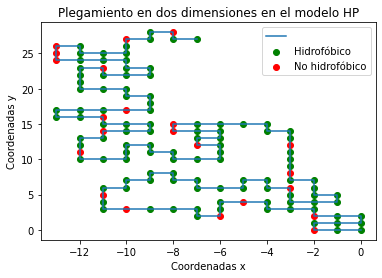


While INTERNO:


Valor it:  100
Valor t2:  41
-> Estructura:  IWWNEEENNNWNEEENWWNWWWWNWWNWNNESEEEENESEEENNWWNEENNNWNNWWNNEEENWWNENNESSESESENNNNEENEEEEENWNWSWWNWWNWWNWNWWWNEEENWNWWWSSWNWNWWNEENN
-> Score:  1754.8100000000002
-> Variable t:  66.22820409839836


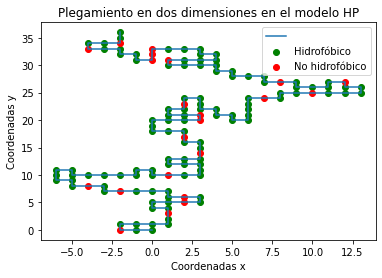


While INTERNO:


Valor it:  100
Valor t2:  42
-> Estructura:  IWNWNEEESENEESSENNNNWNNENNENNNWNNEENWWNNWNNEENESENEENNNWWWWWWNNWWNENNESSESESENNEEENWWWNEENWNWSWWNWWWWWNWNNNWWNNNNNENNNWWNENEESSSEEN
-> Score:  1848.43
-> Variable t:  65.56592205741438


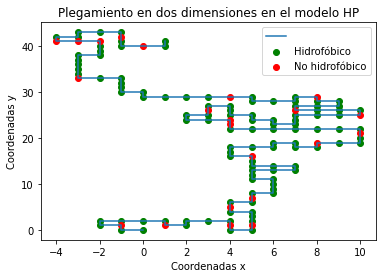


While INTERNO:


Valor it:  100
Valor t2:  43
-> Estructura:  IWWSWNNNEENEESWSEEESESSENESSEESEESSEESSSSENEEEESSSWSESWSSWSEESENNESEESWWSWSWSEESSSENNNESSENEENEEEENEESWSWSSSWNWSSWNWSSEESWSSWSWWSWW
-> Score:  1771.7199999999998
-> Variable t:  64.91026283684023


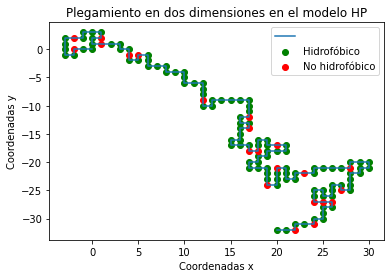


While INTERNO:


Valor it:  100
Valor t2:  44
-> Estructura:  IWNNESEESSSWSSWSESSSWWNNWWNNNNNWSSSSSWWWWSESSWSSSWNNWNENWWWSSWSEESWSSWWSESEEENESSWSESSWWWSESENESEENNNESESEEEESSSSWNWSSEESWWWWWWSESS
-> Score:  1766.5
-> Variable t:  64.26116020847184


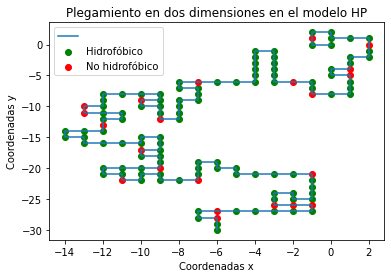


While INTERNO:


Valor it:  100
Valor t2:  45
-> Estructura:  IESESWSSSWWWSWNWWNNWWWNWWWNENESENNNNEESSWSEEEENWWNEENESEEEENNENNNESSEESENENEENESSWSWWSEEEENENWNENENEESEESENNWNNWWNENESEESEENENNWWNN
-> Score:  1674.9600000000003
-> Variable t:  63.618548606387115


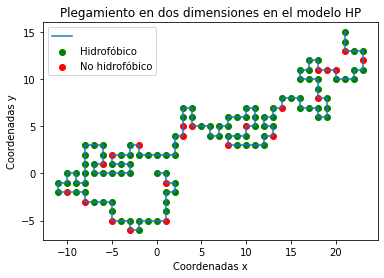


While INTERNO:


Valor it:  100
Valor t2:  46
-> Estructura:  IESWSWWNNWNEENEENEENNESEEEESESWSEEESWSSWNNWWWWSEESWWSSSSSSSWSEEEESWWSESENENESEESSWSWNWWSWWSWSSSWWWWSSWWNNWWWWNNWSSWSSWSESWWWSSWNWNE
-> Score:  1729.3300000000002
-> Variable t:  62.98236312032324


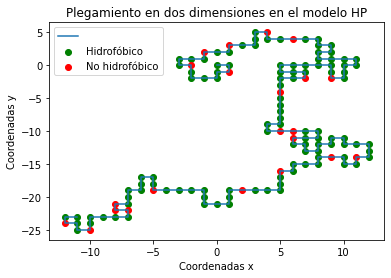


While INTERNO:


Valor it:  100
Valor t2:  47
-> Estructura:  INNEESSSSEESSSWSESWSSESEESSWSWNWWWSWNNNEENWWNNWSSWNNNENWNWWNNWSSSWNNNWNWSWSWWSSSSWWNENNWNENNWWNWWWWSSENESSESSSWNNWNWWNWSWNWSSWNNWNE
-> Score:  1571.2499999999998
-> Variable t:  62.35253948912001


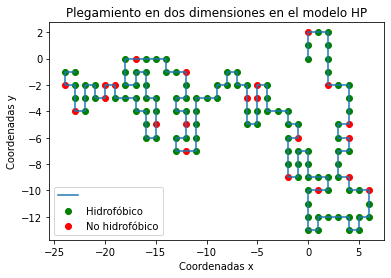


While INTERNO:


Valor it:  100
Valor t2:  48
-> Estructura:  IWWWSEESSENENNESENENNWNNWNENNWWWSSESWWWNNWSSWNWSSSWWSWWSWWNNWSWSWNNNNWNWSWSWWNWNWWSSSSWSWWSSEEENNESEENWNEENEEESWWSWSESEEESENNESSENE
-> Score:  1538.019999999999
-> Variable t:  61.72901409422881


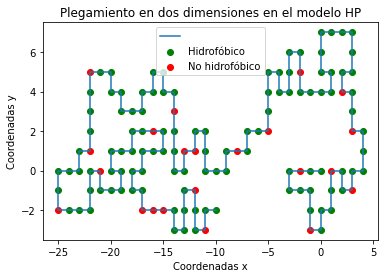


While INTERNO:


Valor it:  100
Valor t2:  49
-> Estructura:  IESSENESSENENEESEEENNESSEESEENEENENESSESSENNNEEENWNNWSSWNNNENENWNEESSESEESESSWSWSWSESEEESWWWSWSEESEESENEEENEEESWWSWSESEEESENESSSWSW
-> Score:  1744.8099999999997
-> Variable t:  61.11172395328652


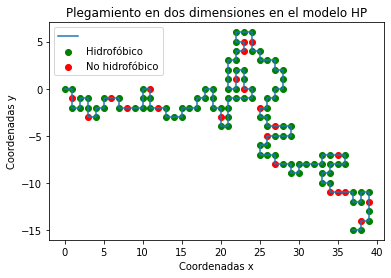


While INTERNO:


Valor it:  100
Valor t2:  50
-> Estructura:  ISSWSESWWSESEEESENNWWNEEEEENENESSSEESSESWWSSWSSWSESSENNESSSENENWNENNEEENNESSESESSWSSWSEEESSSESESEENESEESSENESESWSESSESSEEENWNENESES
-> Score:  1772.1899999999994
-> Variable t:  60.500606713753655


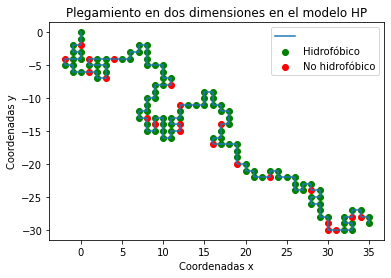


While INTERNO:


Valor it:  100
Valor t2:  51
-> Estructura:  IESSSSSWWSESENESSESEESSEEEENNWNENENWNEEEEEENNWNENNEENWWWNEENNEENEENNNNNWWNWWSWWNWNWSWSWWSSWWSSESSWWNNNWSSWSWNWNEENNNWNENNNWSWNWWNNN
-> Score:  1859.5399999999993
-> Variable t:  59.89560064661612


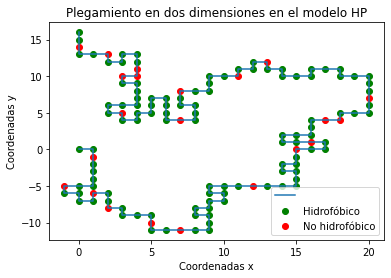


While INTERNO:


Valor it:  100
Valor t2:  52
-> Estructura:  ISSSESEESENENWNEENENNNNNNNNWWSWNNENWNEEENWNWWWNENWNNNWWWSWWSSSSESWSWWSWSSWWSESSWSWWWWSWNWSSSSSESSSSSWWSESWSWNWNNNNENWNNWWNNNWNNNEEN
-> Score:  1951.9899999999998
-> Variable t:  59.29664464014996


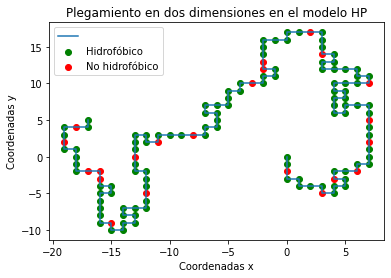


While INTERNO:


Valor it:  100
Valor t2:  53
-> Estructura:  IEESESEESENNWWNEENEESSEESSWWWSWSSWSESWSSENEENNESEESWWSSSESSESESESWSWWWNWSWWSSWSWSWSESESWWWWWSSSWWWSWNNWSSSESWWWNWWWWNENWNEENNESSSSE
-> Score:  1710.879999999999
-> Variable t:  58.70367819374846


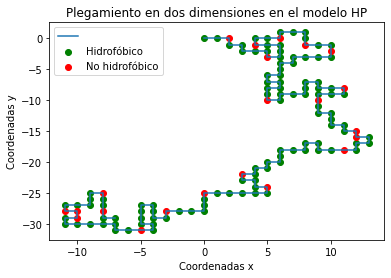


While INTERNO:


Valor it:  100
Valor t2:  54
-> Estructura:  IESWSWSWNWSSEESSENENEEEEEEENNWNWWNNWWNWNWNNNWSWNWWNEENWNWNNNNWNWWWSSSSWWSSSWSWWNWNWSWWNNENNWNWSWSWSWNNNWWSSSWWNENWWNEENWNEENWNNNNWN
-> Score:  1894.06
-> Variable t:  58.116641411810974


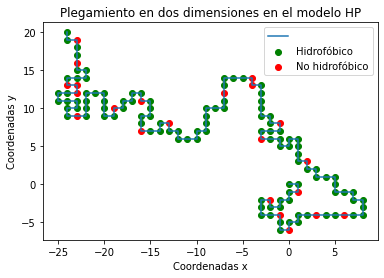


While INTERNO:


Valor it:  100
Valor t2:  55
-> Estructura:  ISWNWWSESWSWWNNNWSWSWWSSSSWSSEEEESENNNNENEEEENNENNEEENWNWNWWNWNWNNWWWSWNWNNEENNNWNWSSSWWNWNWNWSWSSESWSSSWSWNNWNENWWNEENWWNWWSWSESES
-> Score:  1833.6799999999992
-> Variable t:  57.535474997692866


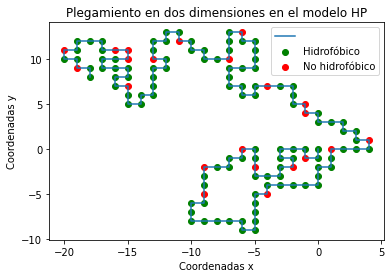


While INTERNO:


Valor it:  100
Valor t2:  56
-> Estructura:  INNEEEENEENENEESENENNNWWWNEEEEENWNWSWNNNWNENNWWNWSWNWWWNEENESEENENWNWWWNWNWNWWWWNENWWWNWWWNWNWWNWWWWNNNNENESSESSEEEEEENNESSSENEESEN
-> Score:  1810.58
-> Variable t:  56.960120247715935


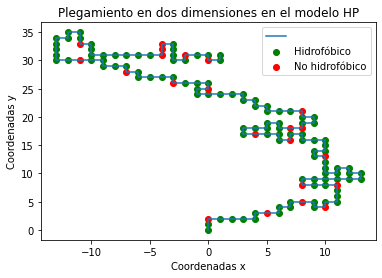


While INTERNO:


Valor it:  100
Valor t2:  57
-> Estructura:  INESEEENEENEEEESENNWWNWWSWNNEEENWNNNESSENESEENESENESEESESENESESESSESSEEEEENNNNEESWSEESWSWSSESESEESSSWWSESESWWSWWSSSSSSSSWNNNNWWNNNW
-> Score:  1681.44
-> Variable t:  56.390519045238776


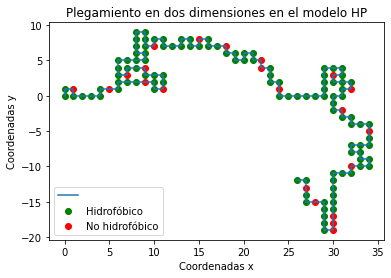


While INTERNO:


Valor it:  100
Valor t2:  58
-> Estructura:  IESWSWSESENESENENNNWWNEENNNNEEENWNENESSENNEEEESWSESWWSSESENESSWWSEEESEENNENNNNNNNENWNNEESESESESENEEEESEEEEESEESSWSWWSSSESWWSWSESSWN
-> Score:  1732.6999999999998
-> Variable t:  55.82661385478639


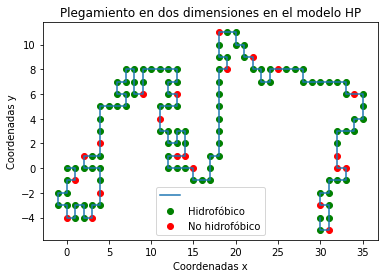


While INTERNO:


Valor it:  100
Valor t2:  59
-> Estructura:  IESWWNWNENWNEEESSESSESWWWWSSWWSSESSEESSENNEENEESSEEESEENEENESSWSSWSSWSSESWSSWSEEESSEENENEEEESESSESSSSSWSWWWNNWNWNWNWSSSESWSSWSEEESW
-> Score:  1913.9699999999998
-> Variable t:  55.26834771623852


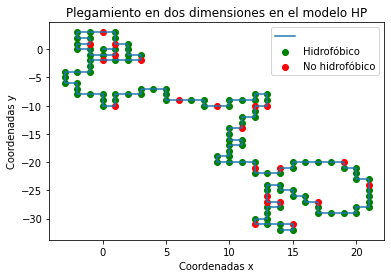


While INTERNO:


Valor it:  100
Valor t2:  60
-> Estructura:  IESWWNNWNWWWWNNEENEENESSSSENENNNWNNWWNNWSSWWSWWNNWSSWWWNNWSWNNNWWNNESEENEENNENWNNNNWWWNWNENWWWNNWNNNWNENNNNNWSWSWWNWWWNWWNWSWWSSSWN
-> Score:  1866.8899999999999
-> Variable t:  54.71566423907614


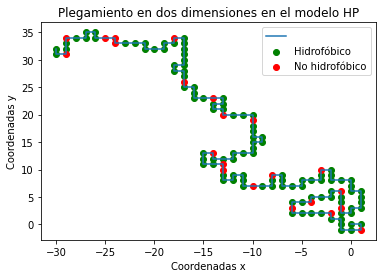


While INTERNO:


Valor it:  100
Valor t2:  61
-> Estructura:  ISWSSWSWNWNWWWWNWSSSESWWWWSESEEEESWWSWWSEESSEESWWSSSSEESSESSWSSENEESWSSESWSWNWSSSSWSWSWSSWWSSESSSSEENEENEEESSESEENESSESEESSWNWSWSWN
-> Score:  1877.2799999999995
-> Variable t:  54.16850759668538


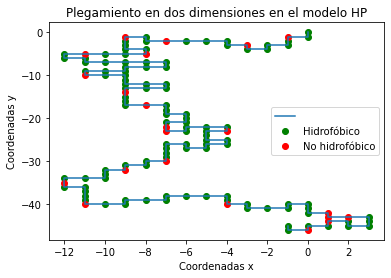


While INTERNO:


Valor it:  100
Valor t2:  62
-> Estructura:  ISWSESENENENESESESSSEESSSWNWWSSEESWWSWWWSSWNWSWWNNWWWWNNWSWWNWWSWNWWWNWWNNNEENWWNNNWNWNNNESSENESSSEENEEEESEEENENNWWNWSWWSWWNENWNNES
-> Score:  1804.1399999999999
-> Variable t:  53.62682252071853


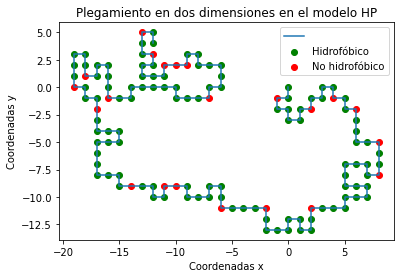


While INTERNO:


Valor it:  100
Valor t2:  63
-> Estructura:  IWWNWNNWWSWSWWSSESWWWSWWNNENNWNWWNENWNNNWWWWSESSWWWSSSWWSSSSWSWSSSSSSEEESSSWNWSSESSESESSSWSSEESENENNNESEEENNENNEEENENNENWNEESENNWWN
-> Score:  2017.63
-> Variable t:  53.09055429551134


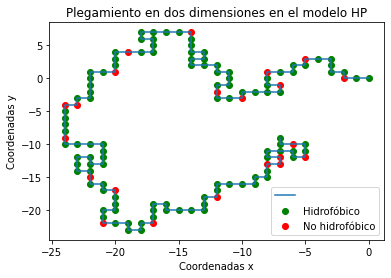


While INTERNO:


Valor it:  100
Valor t2:  64
-> Estructura:  INNENESEEESSWWWWSWWSSSWSWWSESSWSEESEESWWWNWWSSSESSSEEESSESEESESEEEEESSSWWNWWNWWNWWWSSESWSSEEEESEESEENNENESSSSWWWWSEEESSSESWWNWSWSSW
-> Score:  1812.8599999999992
-> Variable t:  52.55964875255623


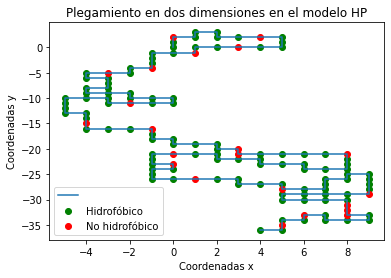


While INTERNO:


Valor it:  100
Valor t2:  65
-> Estructura:  INESENNNNNEESSSESWWSESSSWSWSWSWNWSSSESSSESEEESWSWWSEEESSSWSESSWSSWWWNNNENNWSWSSSSSSEENESSSSSSWSEESSWSSWSWNWSSWWNENWWWWWWSWNNENWNWWN
-> Score:  1686.2700000000002
-> Variable t:  52.03405226503067


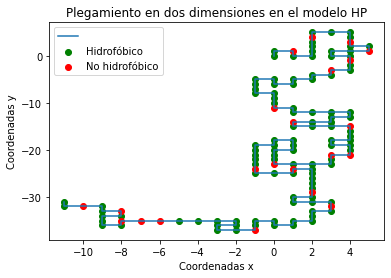


While INTERNO:


Valor it:  100
Valor t2:  66
-> Estructura:  IESWSEEESSWSWWWWWWWSESEEEESESEESEEESSWWWSWWWWWSWNNNWWSWWWNNNNNNWWNWWNNNEESENENEENNNNNWNEESEENENWNEESENENESENNNNESENNWWNWSSSSWWWNENW
-> Score:  1811.5799999999995
-> Variable t:  51.51371174238036


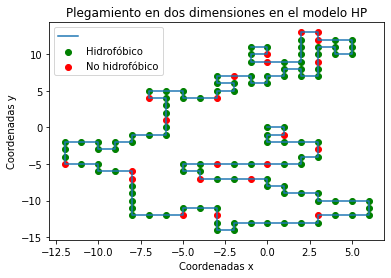


While INTERNO:


Valor it:  100
Valor t2:  67
-> Estructura:  IESSENNNENEESESWSWSESSEEESWWSSESSSESSWWWWNWWSSESWWWSEEEEESEENESESWSESSSWWSSESESSESSSSESWWNNWWNWSWNWWSESSSWSSWSSSWWWNWWWSSWSEEENESSS
-> Score:  1918.8499999999992
-> Variable t:  50.998574624956554


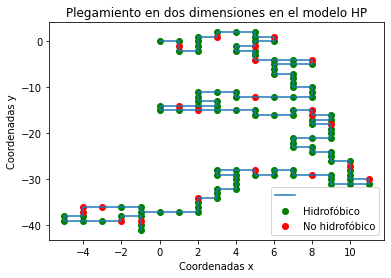


While INTERNO:


Valor it:  100
Valor t2:  68
-> Estructura:  INESSENESENNENESEENWNNWWSWNNWWSSSWWWNNNNNENNWNWNEESEEENEEEENEESESSENENWNNWNWNNEEEEEENWWNNEEENEESSSEENWNNNENNEENWNEESEEESSWSSWSESENE
-> Score:  1826.3400000000001
-> Variable t:  50.488588878706985


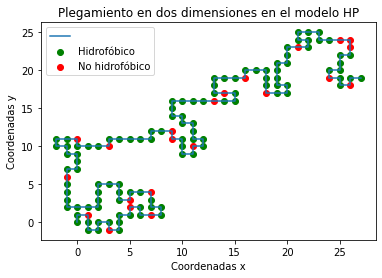


While INTERNO:


Valor it:  100
Valor t2:  69
-> Estructura:  IENNENWWNWWWNWNENNWSWNNENESENNNNWNWNWNENNNNNWWSWNNNWWSESSWWSWWNWNNWNENWWNWNWNWWNNWWWWSESSWWWSESSSSESENENWNNNESSEESEEESESSWSESSEENWN
-> Score:  1716.02
-> Variable t:  49.98370298991991


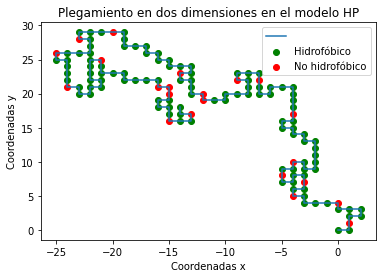


While INTERNO:


Valor it:  100
Valor t2:  70
-> Estructura:  INNESENEENESENNNWNWSWNNENESEEESSSWSSENENNEENWNWNENNWWWWWWNENNEEEEENWNNWWWWNNENNWWWNNNNNEESSEENEENENENWNENEEESWWSSSEESWSWWNWSWWSWWSW
-> Score:  1605.4899999999993
-> Variable t:  49.483865960020715


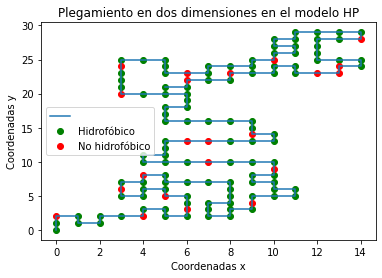


While INTERNO:


Valor it:  100
Valor t2:  71
-> Estructura:  IWSWNWSWSESSEEESEENWNEESESWSEEEENENENWNENEENNEESWSSEESSSEESEESSSSSWWWSSWWSWNNWWSSESSWWNNWWSSWWWWWNWNWSSWSSSSWNNWWNNWNNWNNEENEENEENE
-> Score:  1893.0699999999995
-> Variable t:  48.98902730042051


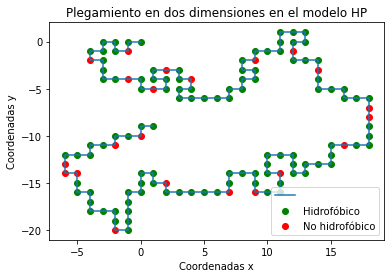


While INTERNO:


Valor it:  100
Valor t2:  72
-> Estructura:  ISENNENNWSWNWNWNWNWSWNNENESEENNEEEESENESSENNEENNEESSSEESEEENNEEESSWWSSESENESSEENNWNNNNESENNESSSESENNENNENNNNESSEEEENESESSSEESENNNNN
-> Score:  1815.4899999999998
-> Variable t:  48.4991370274163


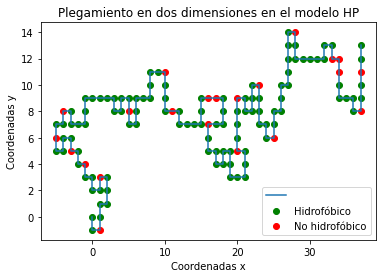


While INTERNO:


Valor it:  100
Valor t2:  73
-> Estructura:  IENNNENENWNNWWWNWNWWNNEENESSSEEEEEESENESSEENESENNNESSSSSESSSWWSESESSESSWSESSESSEENESSESWSEESWWWSEEESWSSSESENESEENEEESWSSEENNENWNWNE
-> Score:  1714.3499999999997
-> Variable t:  48.01414565714214


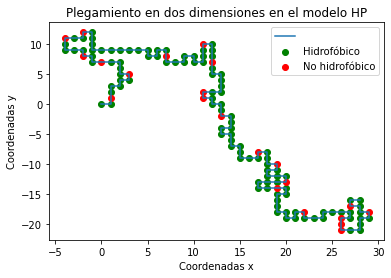


While INTERNO:


Valor it:  100
Valor t2:  74
-> Estructura:  IENNNNNENWNWSSSSSWSSSESENESSSENNEEESENESENNWNENNNWNEEEEENEEESWWSEESSEEESSESEEESSSESWWWWWSEEESSSENNESSEEENENWNEEEESEESSESSSEESEEENEE
-> Score:  1743.3399999999997
-> Variable t:  47.53400420057071


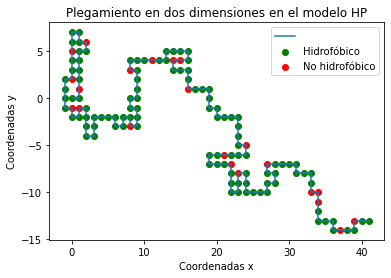


While INTERNO:


Valor it:  100
Valor t2:  75
-> Estructura:  IWWNNEESENENWWWWNEEEENNWWNENENWWNNESENESENNNNNWNWWNENNENWNNNESSEEEEENNESESWSSESSSEESWWWWSEEESSSENNESSESWWWSESESWSSENEENESSESWSSSENE
-> Score:  1506.11
-> Variable t:  47.05866415856501


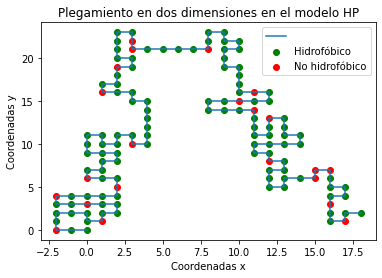


While INTERNO:


Valor it:  100
Valor t2:  76
-> Estructura:  ISSSSWWNWSWSEEEESWWSESWSESWSSWSWWWSSSSWWSESWWWSWWSWNWSWSESEESSSSEEESEESWSWNWNWWWWSESSSSSSEEEESSENNESENESSWSESESWWWWSSWWSSSEESESWWNW
-> Score:  1635.54
-> Variable t:  46.58807751697936


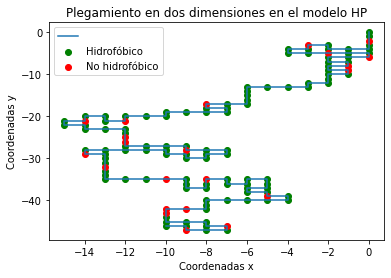


While INTERNO:


Valor it:  100
Valor t2:  77
-> Estructura:  IWWWWWWWWSWSSSSSWNNWSWSSEESESWSWNWSWWSWNWSWWWWSWSSWNWSWSESSSWSSSWWSWSSWNWNENENWWNNWNWWWWNWWSSSSEESWSSSWSSWSSSEESENEEESENESENENESSWS
-> Score:  1848.6799999999994
-> Variable t:  46.12219674180957


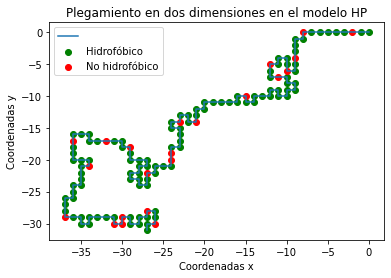


While INTERNO:


Valor it:  100
Valor t2:  78
-> Estructura:  IENNENWNNWNWWWSSWNNWSWSSESWSWNWNENWNENNNWSWWWWWWWNNNWWNNWNNNNNWNENWWSSWNWNENENNNEENNWWWWNWNWWNENNESENNEENENNNWNENWWWWNENNEEEENESSWS
-> Score:  1784.9999999999998
-> Variable t:  45.66097477439147


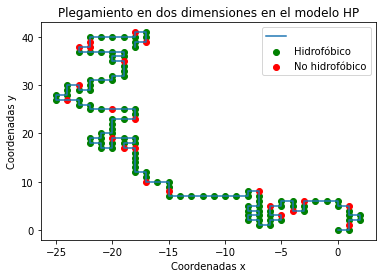


While INTERNO:


Valor it:  100
Valor t2:  79
-> Estructura:  IWSESENEEESSWNWSWWWSESEEESWWWWSSWSSWWWWWSESESSWWSWWWWWSSESSESSEESENNWWNENESESENESSWWSSSESEEEESWSSWNNWWWNWWSWWNNENWWWWNNWWWWWSESSSES
-> Score:  1578.0
-> Variable t:  45.20436502664755


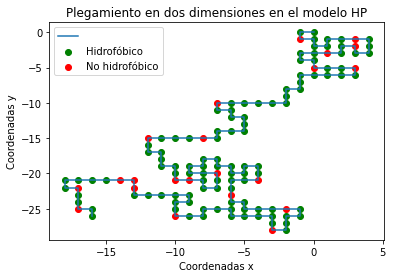


While INTERNO:


Valor it:  100
Valor t2:  80
-> Estructura:  INWSWSEEESWSWWSESESEESEEESWSSSESWSSSSSWNNWNWNWNNNENWNNWNWNWWNENWNWWWSSWNWNENNNWWSSSSWWWWWSWNWWNWWNEENWWWWWSWSSSSEESSSWSEENESENNWNWN
-> Score:  1696.3299999999995
-> Variable t:  44.752321376381076


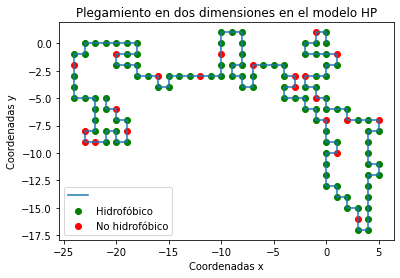


While INTERNO:


Valor it:  100
Valor t2:  81
-> Estructura:  IWSESSESSWNWNNWSWSSEESEEESWSSENENNNNENEEEESWWSSSESEEENNENENNESENNNNNWWNNNENWWNWNWSSWNNNNNWWNWWNWWNWWSESSSSSWWNNNWSWWSWSEENESSSWSWSS
-> Score:  1716.59
-> Variable t:  44.30479816261727


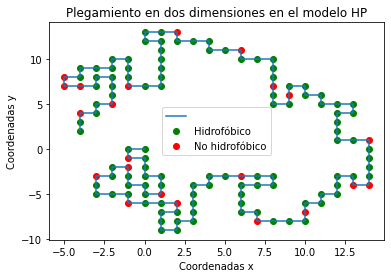


While INTERNO:


Valor it:  100
Valor t2:  82
-> Estructura:  IENNEENEESWSWWSSWWWSESESSWNWNWWNWNNWNWNENWNENNNNWNWNNWNENWWWNENNNNWNENNNNNWWNEEENNNESENNNNNNEEENEENNNNNNNNWNNNNNWSWWSWSEENESSSSSWSE
-> Score:  1697.7299999999996
-> Variable t:  43.861750180991095


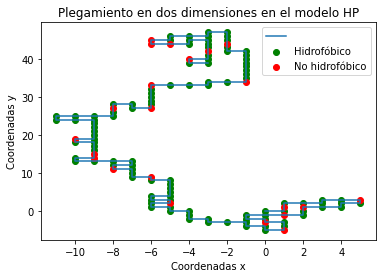


While INTERNO:


Valor it:  100
Valor t2:  83
-> Estructura:  INWNNWSSSESESWSESSSENENEESWSWSSWSSSESESWSEESSWSSESESSESWSEEESSEESSEEEEEENENWNEENWWWNENWNNENNENNWNWSSSWNNWNWWSSSWWWNNNENWWSWNNNNEENW
-> Score:  1769.49
-> Variable t:  43.42313267918119


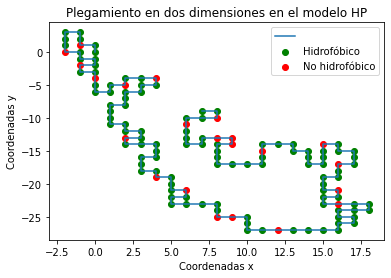


While INTERNO:


Valor it:  100
Valor t2:  84
-> Estructura:  INWNNWSSSESESWWSSSSWSSESESSESEEENWNWNNEENNWNNENENENESESSESEEEEEESSESEESSESENESEEEEEESENEESESSSSESSEESWWWSSESSSSWSSWWNENWWSSSSSWNNWS
-> Score:  1941.37
-> Variable t:  42.98890135238938


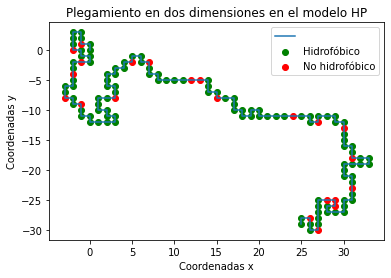


While INTERNO:


Valor it:  100
Valor t2:  85
-> Estructura:  IENEENWWWSWSWNNWNWWSESSWWSSSWWWNWWWWNNNWSSSWWNWNWNWWWNNWSWNWSSWSSWSWSWNWSWWSWNWWWWSSWSESSWSWSWWSWWWSWNNNNENNWNNNWWNNESENENEEEENESSE
-> Score:  1912.7599999999998
-> Variable t:  42.559012338865486


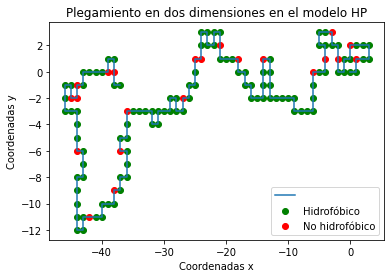


While INTERNO:


Valor it:  100
Valor t2:  86
-> Estructura:  INNEENWWWSWSWNWSSESSEEESWSESENNEENNNEEENNENEESESENEEEEESESWSSSWWSWSSWNNWSSWSWNWWSSEESENEESESESSSWWSEESSSWNNWSWSWSSSSSWSESEENNNWNNNE
-> Score:  1689.2799999999997
-> Variable t:  42.133422215476834


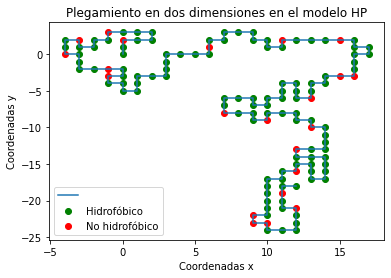


While INTERNO:


Valor it:  100
Valor t2:  87
-> Estructura:  IEEEENWNNNEESWSEENESESSWNWSWSEEESSSESWWSSWSSWNWNWSWSSSSWSWNWNNNNNWWWNNNWNNWSWNWWNNWWNWSWWNNENENNEENWWNNNESSENEESENEESWSSWSWSESSWWNE
-> Score:  1659.6799999999998
-> Variable t:  41.712087993322065


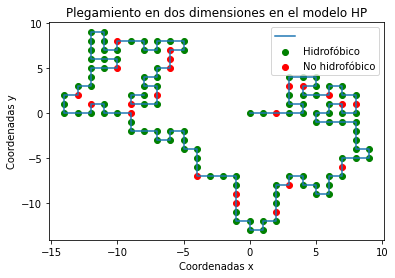


While INTERNO:


Valor it:  100
Valor t2:  88
-> Estructura:  ISEEENESSSSSSWSEENEEESSWNWSWSEEEEEENESSWSSEENENNNNESSENEESWSSSENENNNENENESENESENNNEESENESSESEEEESWWSSSEESSSENENENWNNESEEENNWWNWWSWN
-> Score:  1652.3400000000001
-> Variable t:  41.29496711338884


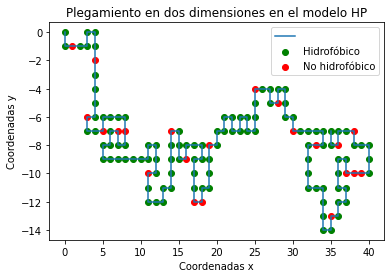


While INTERNO:


Valor it:  100
Valor t2:  89
-> Estructura:  ISSSENEENEEEESENENEENEESWSESENNNNNNWNEESENENWNWWWWWNNNWNNESEEENNENNNEESEEENWWNENNNEENWWNENWWWSSSWNWWNNNNNNNWSWWNWWWSWWWWNNNWWWSSEES
-> Score:  1898.79
-> Variable t:  40.882017442254956


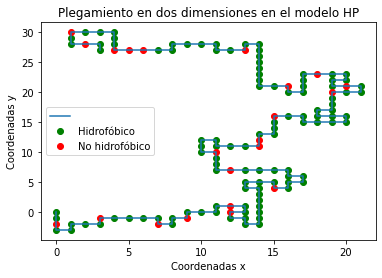


While INTERNO:


Valor it:  100
Valor t2:  90
-> Estructura:  ISESSESWSSEEESSSSESSEEESWSESENNNEENWNEESEESENEEENNNENEEENNENWNENNWNNNNEEENWNEEENNEESENNESEENNWNNNENWNNNWWNNWSWWWSSENESEEESWSSSWNWWN
-> Score:  1806.6999999999998
-> Variable t:  40.473197267832404


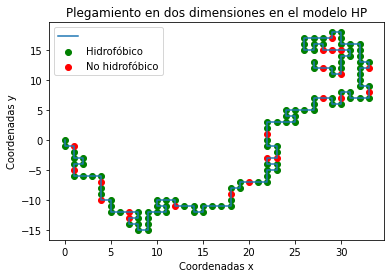


While INTERNO:


Valor it:  100
Valor t2:  91
-> Estructura:  IWWWNWNEESEEESESSWNWSSESWSESEENNEEENEEESSWWSESEENEESSWWSESWSEESSSESSEESWWWWNNNNWWWWNWSSESSEESESESWSESSSSSWWSESWWWWSEESEEESWSWWWSSWS
-> Score:  1735.16
-> Variable t:  40.06846529515408


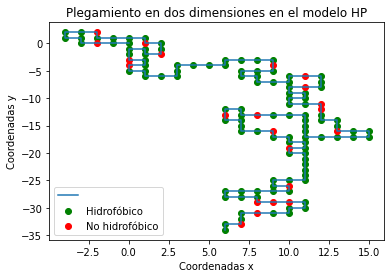


While INTERNO:


Valor it:  100
Valor t2:  92
-> Estructura:  IEEEENESSWSSSWSWWNENWWWNENWWSWSESSWSWSSSWNNNWNWNWWSWSWWSWNNNWSWWNWWSSSWNNWWNEENNWWNNNWNWNWWNENNEESENEENWNEEENENWWNNNNENNNESEEENWWNE
-> Score:  1725.41
-> Variable t:  39.66778064220254


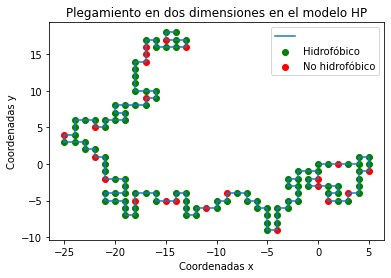


While INTERNO:


Valor it:  100
Valor t2:  93
-> Estructura:  INENWWNNWNWSSWSWNNNWSWWNENWWSWSESESESEEESWWWWNWNWNWNWWWSWNNNNWWNENENNNESSENNNNWNWWWWNNNNNWWNWSSSWWSEESEESWSSSWSESWSWNNNWWWNNWNWSSWW
-> Score:  1567.4900000000005
-> Variable t:  39.27110283578051


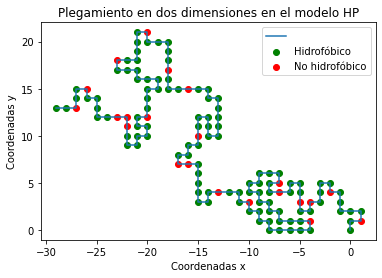


While INTERNO:


Valor it:  100
Valor t2:  94
-> Estructura:  IESENNEENEESEENENEENNEESWSEENENWNWWNENWWNNWSWNWNNNESEENWNENENWNEEESENNNEEEESSENENESSSEENEEESENNWNEESSENNESSEEENWNENESSENNNENWNWWWNN
-> Score:  1550.8700000000001
-> Variable t:  38.8783918074227


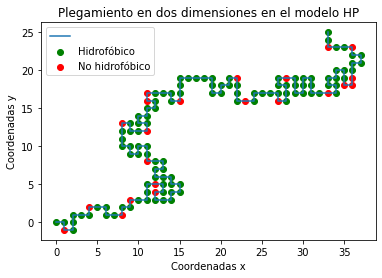


While INTERNO:


Valor it:  100
Valor t2:  95
-> Estructura:  INNWWWNENEESESSENEENNESESENEESENEEENWWWWNNWNNEESENESEENNNENEENNEENENEENEEEEEEEEEESWSSESESENENNNWNNNESSEESWSEEENWNENNEENNEESEEENNESS
-> Score:  1797.1099999999997
-> Variable t:  38.48960788934848


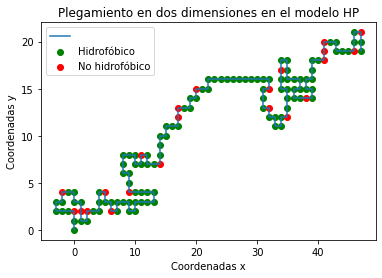


While INTERNO:


Valor it:  100
Valor t2:  96
-> Estructura:  IEENWWWWSWNNWNNNNWWSESWSWWWNWWNWNEENWNWWNNWNNENNWSWNWWSWSWWWWWSSSEENESESSSWWSSSSSWNWSWNWNWSWWNWSWWWNEENWNENWNNWSWNWWNNNNWWWSESSSWWW
-> Score:  1778.9400000000005
-> Variable t:  38.104711810454994


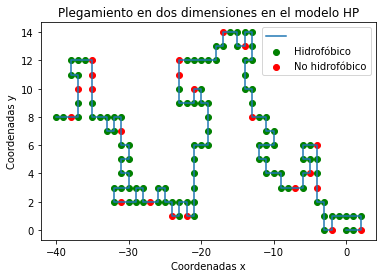


While INTERNO:


Valor it:  100
Valor t2:  97
-> Estructura:  ISWSEENNESSSSSEESSWSESENNEESENNWWNNWWNNNENNWWNWNWSWNWNWWNEEEESEEENNWNNWWWNEENNNENESENESESENENNNWNNNESSENESSEESENESESWWSSSSWSESWWNWW
-> Score:  1638.5300000000004
-> Variable t:  37.72366469235045


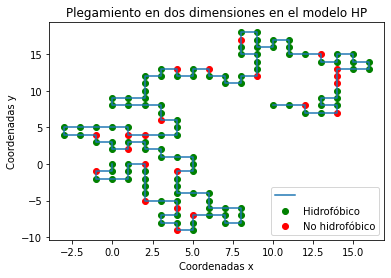


While INTERNO:


Valor it:  100
Valor t2:  98
-> Estructura:  ISWWWWWWNENNNNWNEESENEENNESSSSSSEEEEENNESENEESESENNENENWNEENWNWNENENEENWWNEEENNWSWNWWNENNENENWWSWWWNWWWWNNNWWNWSWWSSWWSWWWNNWNEESES
-> Score:  1793.2800000000009
-> Variable t:  37.34642804542694


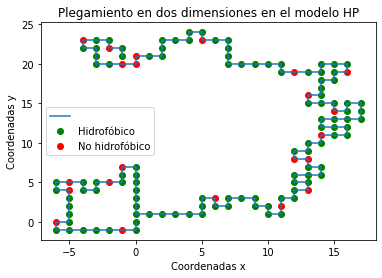


While INTERNO:


Valor it:  100
Valor t2:  99
-> Estructura:  ISWSWSSWWNWWWSEESSWSEEEEESWWSSWNWSSSSSESWSEESSEENNESESEESWWSESESWSWSSSENNESSSESENEENESSSSWSWSESESSESEEESWWWSESENEESSWWSSSEEENESSWSW
-> Score:  1687.68
-> Variable t:  36.97296376497267


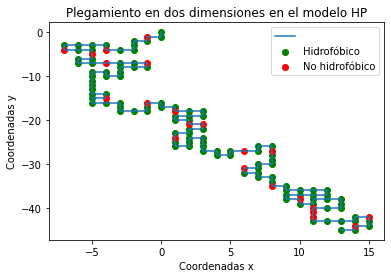


While INTERNO:


Valor it:  100
Valor t2:  100
-> Estructura:  INNWWSSSSSESWWSWNNENNNNWWNNNWSWNNWWWNENEENWWNNWSSSWNWWSSWWWSESESWWNWWNWSSWNWWWWSESSESWSSSWSWSEENESESENNESSSENNENEESENEESSSSWSSSSSWW
-> Score:  1685.0500000000006
-> Variable t:  36.60323412732294


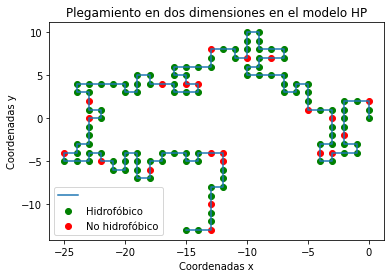

'INNWWSSSSSESWWSWNNENNNNWWNNNWSWNNWWWNENEENWWNNWSSSWNWWSSWWWSESESWWNWWNWSSWNWWWWSESSESWSSSWSWSEENESESENNESSSENNENEESENEESSSSWSSSSSWW'

In [36]:
#A0A5P8I0X0
#MTTSSYFLLVALGLLLYVYVCQSGQDYSCQLDDPADPRGKCGSDLPDYLEKKCEEEKARQGVSGTNDPGKKRGRASPLKRRRFLSMMKARAKRNEPFKRRGYKGIACECCQHYCTDPEFTKYCPPLPKSSS
A0A5P8I0X0 = 'MTTSSYFLLVALGLLLYVYVCQSGQDYSCQLDDPADPRGKCGSDLPDYLEKKCEEEKARQGVSGTNDPGKKRGRASPLKRRRFLSMMKARAKRNEPFKRRGYKGIACECCQHYCTDPEFTKYCPPLPKSSS'
prueba_simulated_annealing4(A0A5P8I0X0)




While INTERNO:


Valor it:  100
Valor t2:  1
-> Estructura:  IWNEESSENNNNWWNWNNNWWWSWSWWNNNNNNENWWWNWSWWWWNWWWNWWWSSWNWNNNNENNWWSWSWSSSWSSSWSSWNWNNEE
-> Score:  1372.79
-> Variable t:  99.0


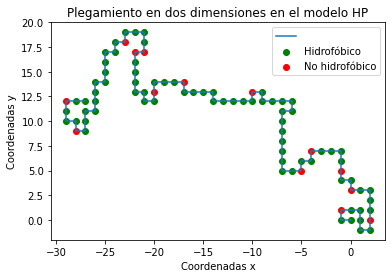


While INTERNO:


Valor it:  100
Valor t2:  2
-> Estructura:  IWNENESSSWSWSWWWWWSSSEEESENEEEESSSENEESESWWSSWSWWNWWWSSWSEEEENEEEEENEESSSWWSWSSWSSSSWWWS
-> Score:  1346.3999999999999
-> Variable t:  98.01


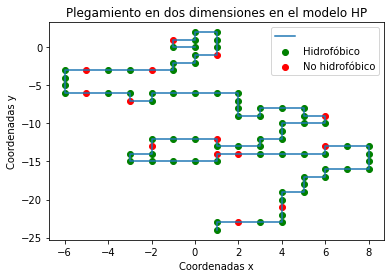


While INTERNO:


Valor it:  100
Valor t2:  3
-> Estructura:  IWWWWNNWWWWSSSENEESSSEEENENESSSWWWSSWSWWNENWWWWWSSWNNWWWWWNENNENNNNWWNWWWWWSWWWWWWWWNNNW
-> Score:  1262.6199999999997
-> Variable t:  97.0299


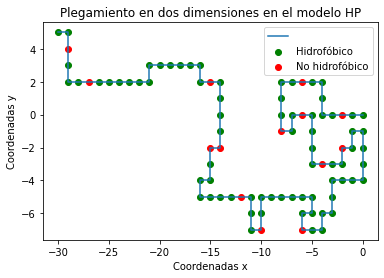


While INTERNO:


Valor it:  100
Valor t2:  4
-> Estructura:  IEEEESENESSSSSSESESWWSWNWWWWNWNWWNNWWWWNNENWNNENWNEENNNENNEESSSENNENNEEEESWWSSEESEESWSSE
-> Score:  1327.8999999999994
-> Variable t:  96.059601


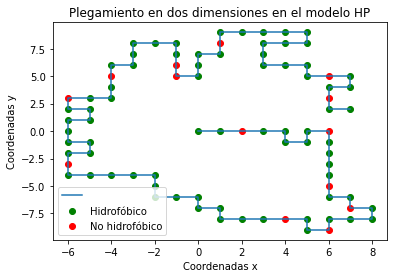


While INTERNO:


Valor it:  100
Valor t2:  5
-> Estructura:  INNNEENWNEESENENNNESSEESSEEEEEENNENWWSSWNNNENNEENNNWSSWNNNENNWNWSSSSWWWNNNNNNNNNENNNENEN
-> Score:  1135.79
-> Variable t:  95.09900499


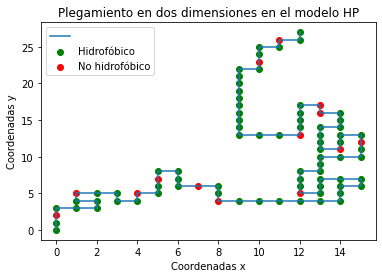


While INTERNO:


Valor it:  100
Valor t2:  6
-> Estructura:  IWSWNNNNWWNEEESENNEEENNEEEESSWWSSSWWWSEESSSWSSSSEEEEEESSWSWWWSWSEEESWSSSWNWNNWSSWSSWSSSE
-> Score:  1346.86
-> Variable t:  94.1480149401


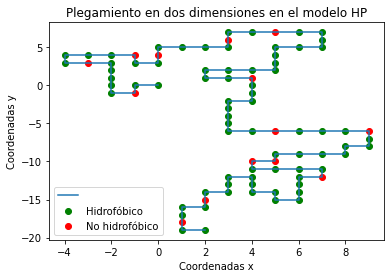


While INTERNO:


Valor it:  100
Valor t2:  7
-> Estructura:  ISEEEENEEESSSSSESESWSWWSSSWNWNNWWWSWWSSESSESSWWWWSSSSSWNNWWNWSWSESESWSEESWSWNWSWNNENWNWW
-> Score:  1280.7700000000002
-> Variable t:  93.206534790699


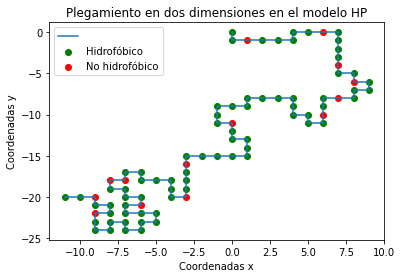


While INTERNO:


Valor it:  100
Valor t2:  8
-> Estructura:  INENEENWNNEEEEENWWNNWNWWWSWNWNNWWSESWSSEESSSWWWWNWSWNWWWWSWWSSSENENESSENESESWWSWWWWSESSS
-> Score:  1242.3000000000002
-> Variable t:  92.27446944279201


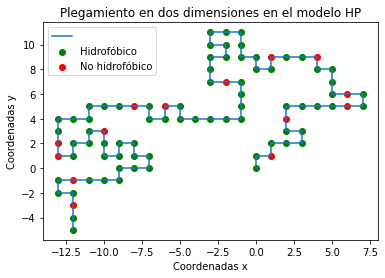


While INTERNO:


Valor it:  100
Valor t2:  9
-> Estructura:  INESSENNENESSSEENNNENWNEENESESWSEENNNWNWNEEESEEEENNENNNNNNESSSSENENESSSEEENNENNEESSSENEE
-> Score:  1209.1399999999999
-> Variable t:  91.35172474836409


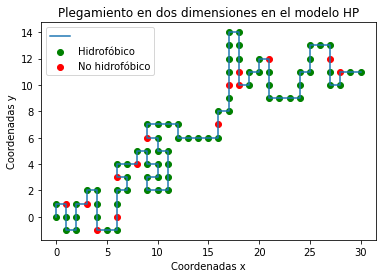


While INTERNO:


Valor it:  100
Valor t2:  10
-> Estructura:  ISSWWWSWWSSWNNWNNNNENWWNWWWNWWNNEENEEESEESEEENWNEEESEESESSSEENENNENESESEESSESWSWSSWWSSWN
-> Score:  1420.4799999999996
-> Variable t:  90.43820750088045


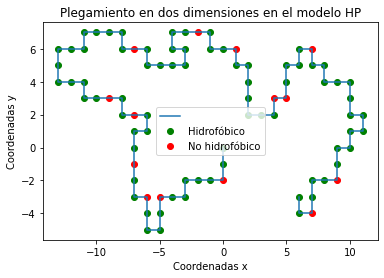


While INTERNO:


Valor it:  100
Valor t2:  11
-> Estructura:  ISESESSEENNNEENENENNWWWWNNWNWNEESEESSEEEEEESWSESSSSWWSSSWNWSWSWSSWSESESSSWWSSWSSEESSENES
-> Score:  1319.1399999999999
-> Variable t:  89.53382542587164


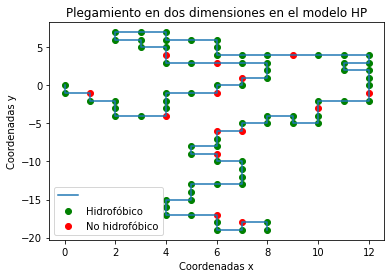


While INTERNO:


Valor it:  100
Valor t2:  12
-> Estructura:  ISWWWWWSWSWSWNWWNNNENESEEENENNNNENWWNWWWWWWSWSSWWSWSSWNNNNWSWWNNWNWSWWNWSWWWNNWWNNWSWWWN
-> Score:  1366.2200000000003
-> Variable t:  88.63848717161292


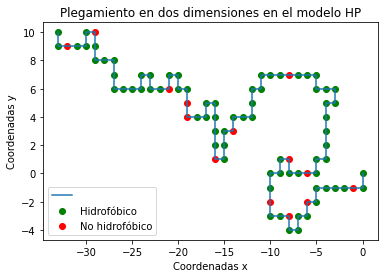


While INTERNO:


Valor it:  100
Valor t2:  13
-> Estructura:  INNEENEESSSESSESWWWNWWWNWWSSESESSENEEEESSSWSWSSSESSSEESEESENEESSESSSWWNWSWNWSWWSSESESSES
-> Score:  1426.32
-> Variable t:  87.75210229989679


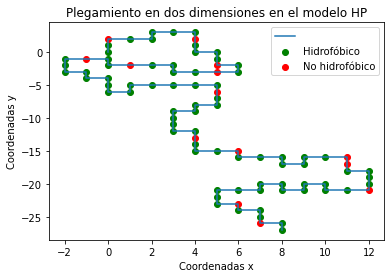


While INTERNO:


Valor it:  100
Valor t2:  14
-> Estructura:  IESWWWWWNNWSSSESWWWWSSESESENNENESENESENEESSEEENENESEESSSWWSSWNWWSWSSSSSWSWSSSWSEENEEEENE
-> Score:  1317.11
-> Variable t:  86.87458127689783


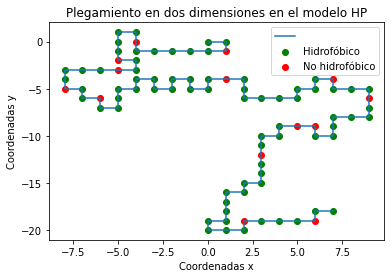


While INTERNO:


Valor it:  100
Valor t2:  15
-> Estructura:  INWNWWWSWWSSSEESSSSWWWWWWNWSWWWWWSEESEEENESESWSSSSWSEEEESSSSWSEEESEEESSWWNWWWNWWNWNNNWSW
-> Score:  1330.6
-> Variable t:  86.00583546412885


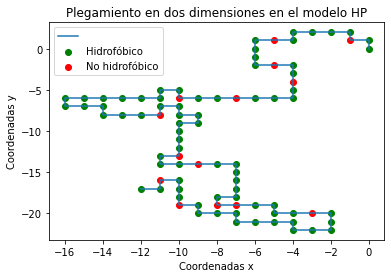


While INTERNO:


Valor it:  100
Valor t2:  16
-> Estructura:  ISENNNEESWSESESSSEESSENENEENEESSSEEEENWNWWNNEEEEENEENNNEESWSSENEEEENNEENNEENEEEESSWNWSWS
-> Score:  1193.2900000000004
-> Variable t:  85.14577710948755


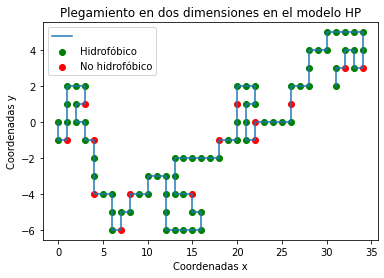


While INTERNO:


Valor it:  100
Valor t2:  17
-> Estructura:  IENWWSWWNENWNWWNNWWSSSESWSESSSSWWSSESESEEESSWSSESESSENNEESWSSENEESWSSESSSWSESEEENNESESWS
-> Score:  1230.3900000000003
-> Variable t:  84.29431933839268


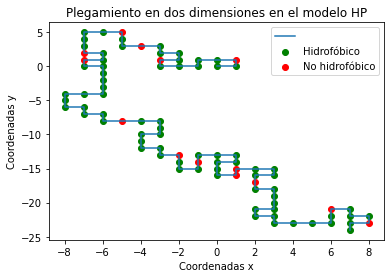


While INTERNO:


Valor it:  100
Valor t2:  18
-> Estructura:  IENWWWNWNNNNWWNEENNWNNNEENWNNWNNWWNWNNENWWWWNWNWNENNENESESSEENNENNNNENEEENENNWWNNEEENEEE
-> Score:  1425.8899999999999
-> Variable t:  83.45137614500875


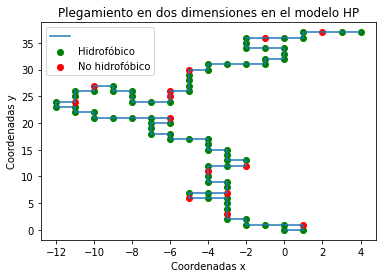


While INTERNO:


Valor it:  100
Valor t2:  19
-> Estructura:  IESSSSSWNNNNWSWSSSSESSESSEEEENNWWNENEESENNENESSENESEENESEEENNWSWNWNNEEEESESESESSSEEENNEN
-> Score:  1237.6399999999999
-> Variable t:  82.61686238355867


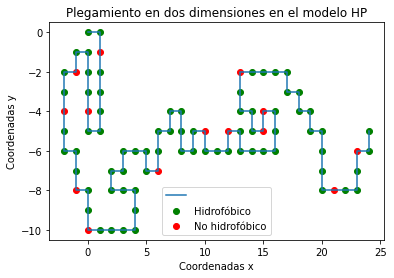


While INTERNO:


Valor it:  100
Valor t2:  20
-> Estructura:  IWNNNENEEENNWSWNNWSSWWSWWNNNWWWWSSWSEESESSSESWSEESSESESWWWNWNWSWWSSEEEEESESESEENESESEESW
-> Score:  1276.7300000000002
-> Variable t:  81.79069375972308


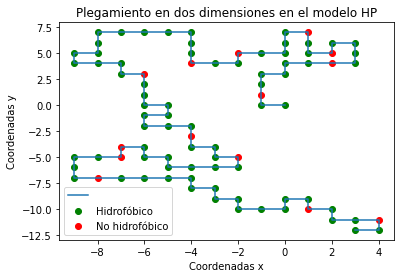


While INTERNO:


Valor it:  100
Valor t2:  21
-> Estructura:  ISSWSWSWNNWSSSSWWSEESSSWSWSSSEESEENNWNEEENENESEEESESWSWWWSWSSEENEESSWSEESSSESSSESWSWSEEE
-> Score:  1396.35
-> Variable t:  80.97278682212585


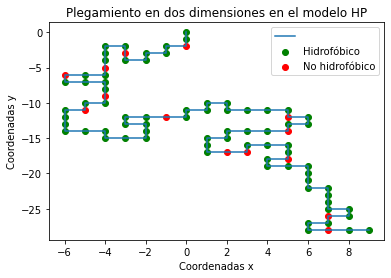


While INTERNO:


Valor it:  100
Valor t2:  22
-> Estructura:  ISWNWWSWWNNWWNWNWSWNWNENWNWNNENENNWNWNEENWNNENEEESEESESSENENWNNNEEENEEEESEEEENEESWSWSESS
-> Score:  1344.0800000000002
-> Variable t:  80.1630589539046


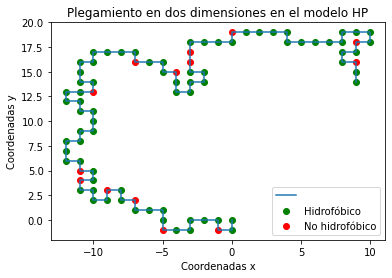


While INTERNO:


Valor it:  100
Valor t2:  23
-> Estructura:  IENESSENNESESWSWSESWSWNNWNWWSWSWSWSSESWWSESSWSSEESEESEESSEENNNESSSSESSSSWSEENNNNESEENWNN
-> Score:  1148.1200000000006
-> Variable t:  79.36142836436555


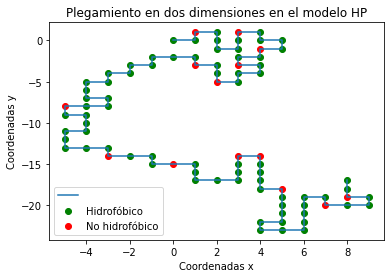


While INTERNO:


Valor it:  100
Valor t2:  24
-> Estructura:  IWNENNWSWNNNNENENWNENNEENNWWNEEENENENNEENWNNEESENENNEESEEESSSSWNWSSEESSSWWSWSSWWNNWWSESW
-> Score:  1268.89
-> Variable t:  78.56781408072189


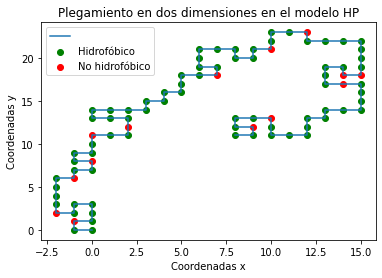


While INTERNO:


Valor it:  100
Valor t2:  25
-> Estructura:  IEEEEESSWNWWSSESENESSSEEESEENESENENNWSWNWNNEEENNWNNENESEESSSENESSEENWNEESENNNEEEENWWNWSW
-> Score:  1052.4399999999998
-> Variable t:  77.78213593991467


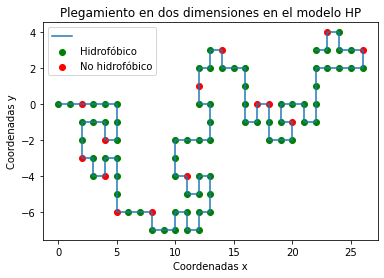


While INTERNO:


Valor it:  100
Valor t2:  26
-> Estructura:  INWNNEENESEENNNENWNEEEEESSSWSSSSESENNWNEEENENEEENENENESENEEENWNNEEENWNENENWNWWNNNNWNNEEE
-> Score:  1311.4899999999996
-> Variable t:  77.00431458051553


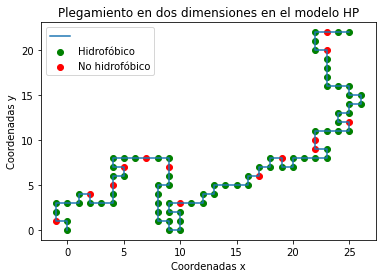


While INTERNO:


Valor it:  100
Valor t2:  27
-> Estructura:  ISESESSESENEESESWWSSSWSSSSESSSWNWNWSSESWWNWWWNWSSWSWWSWSSWWNWSSESSSSESESSENEESWSWSSSESEN
-> Score:  1257.54
-> Variable t:  76.23427143471037


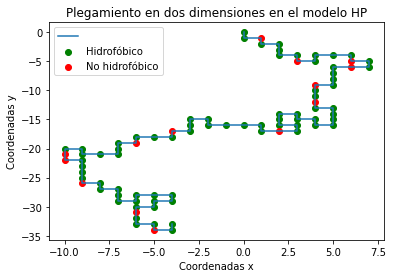


While INTERNO:


Valor it:  100
Valor t2:  28
-> Estructura:  ISESESSWNWSWNWWSWSSSSSESEESWSSSWSWSESESSESENESSESSSWSESSWNWNWWSSWWWSEEEEEESSEESESSWWSWNN
-> Score:  1228.1599999999996
-> Variable t:  75.47192872036327


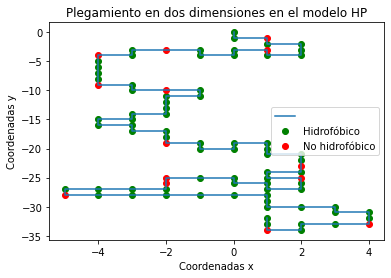


While INTERNO:


Valor it:  100
Valor t2:  29
-> Estructura:  INNNWSSWNWWNNWWSWSSWNWSWSWNNWNNNWSSWNWWNNWSSWNWSSEESEESSWWSWSEESSSWWSSWWWSSWWWNWWWNENNEE
-> Score:  1238.6699999999996
-> Variable t:  74.71720943315964


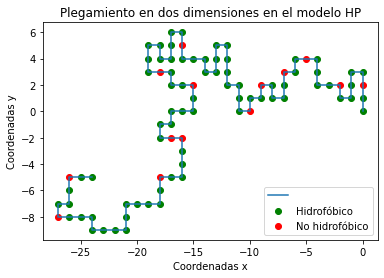


While INTERNO:


Valor it:  100
Valor t2:  30
-> Estructura:  ISSSEENEENENNWNWNWWNNNWNNNEEESSWSEEESEESWSEEEENWNNNENNEESENESEESWSSWSSWSESWWSESSSEESENNW
-> Score:  1337.2100000000003
-> Variable t:  73.97003733882804


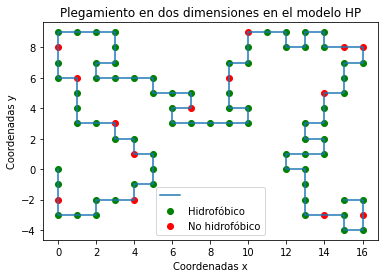


While INTERNO:


Valor it:  100
Valor t2:  31
-> Estructura:  ISSEEEESSWNWWSWWWSWNWWNWWWNNNWWNWWNWWSSWNWSWNWWSWNWNWSWWWSSWWSSSWSESSWWSESESEEENESSWSSWW
-> Score:  1317.9299999999998
-> Variable t:  73.23033696543976


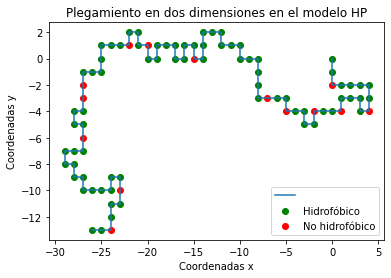


While INTERNO:


Valor it:  100
Valor t2:  32
-> Estructura:  IENNNWWSWWNNNWWSWSSWWNENNWNEENESENNWNWWWWSESWSWWWNNENNEENWNNEENNNENEESSSEEENNESESSESEESE
-> Score:  1247.23
-> Variable t:  72.49803359578536


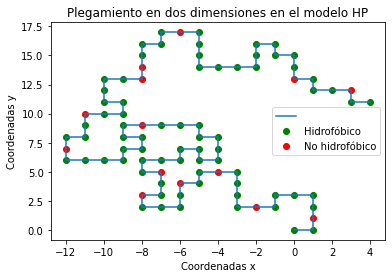


While INTERNO:


Valor it:  100
Valor t2:  33
-> Estructura:  IWNWWSSSSWWNENNWWWWNNWNWNNEENNESSEENENESSENNEESENEEEESEENWNNEEEEESSWSSSSSWWSWNNWWWNNWWSE
-> Score:  1267.7199999999996
-> Variable t:  71.7730532598275


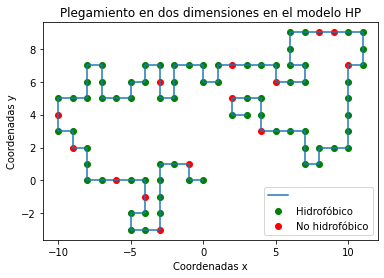


While INTERNO:


Valor it:  100
Valor t2:  34
-> Estructura:  IESESEENNWWNENNWNWSWNWWWWWNWSSWWWSWSWWNWWNWSWSWWSEEEESESEEESWWSSWWWNWWWSWNWSWWNWSWNWWNNW
-> Score:  1254.8100000000004
-> Variable t:  71.05532272722922


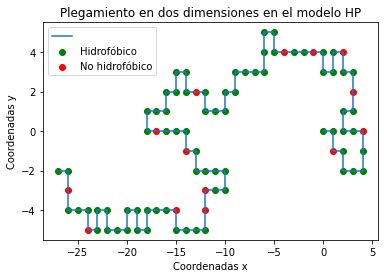


While INTERNO:


Valor it:  100
Valor t2:  35
-> Estructura:  ISWSWWSWSSWSWSWWNWSSWWSWWWWSEESWWSWSEESSWNWSSSWWWSWSWSESSENESSENNEESEEESSWSEENENENWWNENW
-> Score:  1116.6100000000001
-> Variable t:  70.34476949995693


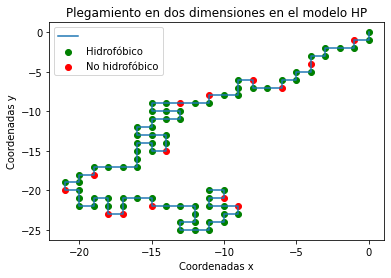


While INTERNO:


Valor it:  100
Valor t2:  36
-> Estructura:  INEEEENNWNWSWSWWSWSSSSEESSSSESWSSSSEEESSWNWWSSEEESWWWSESWSWWNNWSSWSSEENEESEESSSENEEESSEN
-> Score:  1132.1299999999999
-> Variable t:  69.64132180495736


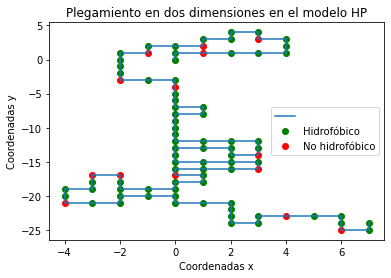


While INTERNO:


Valor it:  100
Valor t2:  37
-> Estructura:  IWNNWNNENNNWNWNWNEENNNWNNWNENESEEEENWWNNESEEEEESEEEESEENNNEESSWSSWSSSSSESSSEEEEENEENESEN
-> Score:  1301.5899999999997
-> Variable t:  68.94490858690779


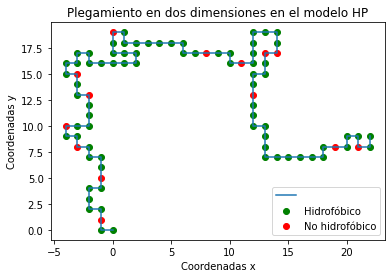


While INTERNO:


Valor it:  100
Valor t2:  38
-> Estructura:  INENNNEENESENEESSWSSEESSESWSEESEESWSEESSWWWWWWWNWWSWWSSESSENEESENESSSSWSWSSSWWWSSWSESSEE
-> Score:  1336.35
-> Variable t:  68.25545950103871


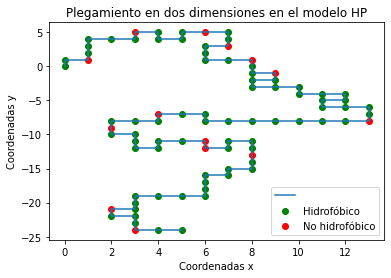


While INTERNO:


Valor it:  100
Valor t2:  39
-> Estructura:  IESSSSWWNNENWWSSSWSSENESESWSESSENESSESSSSEESSSWSWWSWNNNWNENNENNWWWNWSSSESWWSWSEEESESWWSE
-> Score:  1061.9199999999998
-> Variable t:  67.57290490602833


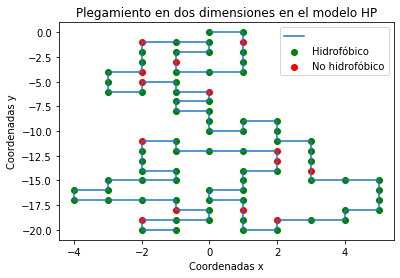


While INTERNO:


Valor it:  100
Valor t2:  40
-> Estructura:  INENNWNWNNNNNENWNENWWSWWSWNNWWNWSWWSESESWSSWWSWSSENESSSESWSSWSSEESWWSESESWWSSESSWWSSWSWW
-> Score:  1277.94
-> Variable t:  66.89717585696805


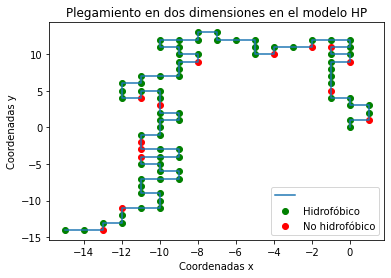


While INTERNO:


Valor it:  100
Valor t2:  41
-> Estructura:  INESENEESSWWSSSESSENNNEEEEENNNNWSWNWWNNESEEEEEEESENNNESESSEESESEESWWSSWSWWNNENENWWSWNNWW
-> Score:  1096.8600000000001
-> Variable t:  66.22820409839836


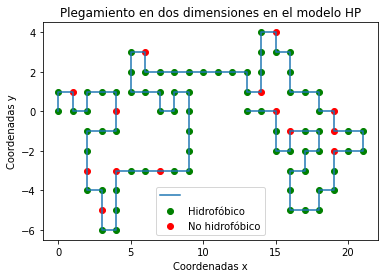


While INTERNO:


Valor it:  100
Valor t2:  42
-> Estructura:  INNNWSWWSWNWWNNNENNNNNNWNEENNESENEESSSSEENEESSSESENNWNENESENENEENEENWNENNNEESESSSSSWNWSW
-> Score:  1227.36
-> Variable t:  65.56592205741438


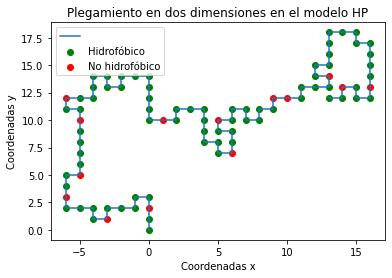


While INTERNO:


Valor it:  100
Valor t2:  43
-> Estructura:  ISWWSESWSSSENESSSSWWSSSSWNNNWNENWNWNWWSESESSWWWSWSEENESESWSESWWNWSWSSWWSESWSEESESWSESSSE
-> Score:  974.3799999999995
-> Variable t:  64.91026283684023


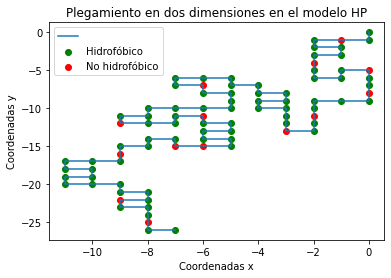


While INTERNO:


Valor it:  100
Valor t2:  44
-> Estructura:  IWNWSWWNNNNNWNNWSWWNNNNNNESENNNWWNNNNNNWNNEEENWWNWWSSWNWNENWNNWWWWNWWWNWSWNNWWWWWNWSWSWN
-> Score:  1258.1599999999996
-> Variable t:  64.26116020847184


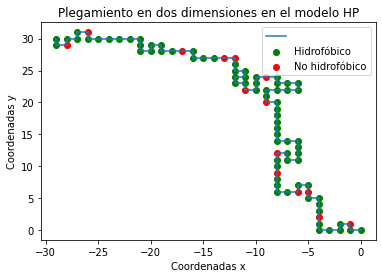


While INTERNO:


Valor it:  100
Valor t2:  45
-> Estructura:  IESENNENENWNWSSWWNWNWNWNNNENENENNESEENNNENNENWWNNWNNNESESENEENNWWNENNNENWNWWSWSWSWWWNWNE
-> Score:  1301.31
-> Variable t:  63.618548606387115


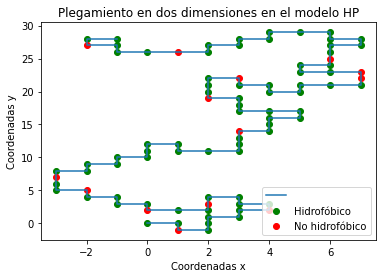


While INTERNO:


Valor it:  100
Valor t2:  46
-> Estructura:  IESEESWWWWWWWSSWWNWWWWSWSWNWNWWWWWNEENNNWWNEENWWWSWWWNWSSSSWNWWNNNENNNNNWNWWSSWNNNWWNWNE
-> Score:  1258.05
-> Variable t:  62.98236312032324


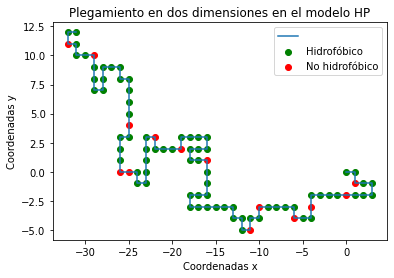


While INTERNO:


Valor it:  100
Valor t2:  47
-> Estructura:  INEEEESSENESSESSESEESSSWSWWSWSESEESWSSWWWWNNNNWWNNEENENWWWWNNWSWWSSWSWSEESSSSEEESEENNWNE
-> Score:  1273.61
-> Variable t:  62.35253948912001


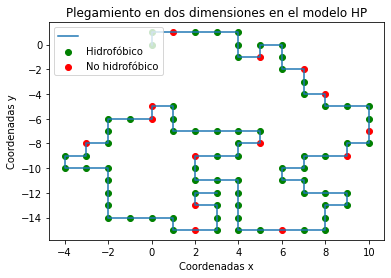


While INTERNO:


Valor it:  100
Valor t2:  48
-> Estructura:  INENESSSENNEENESEENNEEENNENWNWSWSWWNWSWWWSSWWWSWWNENWWWWWNNEEENENNNEEENWWWWNWNWWNWWSWSES
-> Score:  1226.29
-> Variable t:  61.72901409422881


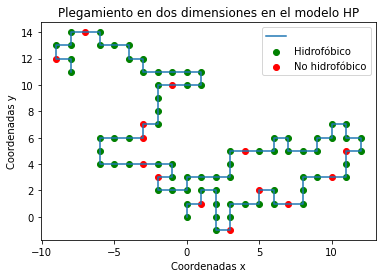


While INTERNO:


Valor it:  100
Valor t2:  49
-> Estructura:  INENENNNNWWNNNEENEEESSENNNESESEEESEEEEEENNWNNEEENESENNNESENENNNEESESSSENNNEENNEESSSEENEE
-> Score:  1398.04
-> Variable t:  61.11172395328652


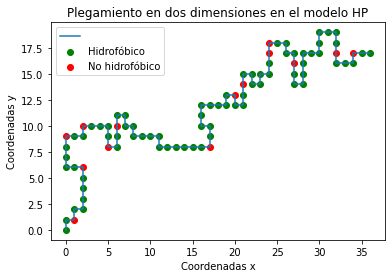


While INTERNO:


Valor it:  100
Valor t2:  50
-> Estructura:  INENEEESSEESSSEEESEEESSWSSWNWNNWSWSWWNWWSSESSSESESWSEESSWSSWWSSWWNWNNNWWWNENWWNNNNEEEESW
-> Score:  1404.3099999999997
-> Variable t:  60.500606713753655


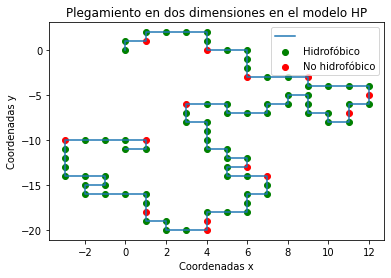


While INTERNO:


Valor it:  100
Valor t2:  51
-> Estructura:  IWSWSEEENNNEENWWNWSWNWSWWWWSSWWSESSWWWWSWWSEESSWWSSEESSSWNWSWWWSESWSSEEENESSSESWSSSSWWWN
-> Score:  1240.11
-> Variable t:  59.89560064661612


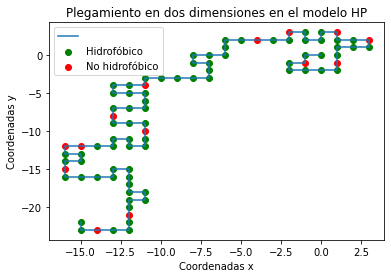


While INTERNO:


Valor it:  100
Valor t2:  52
-> Estructura:  ISSSSESSENNEENNEEEEESWSSSSWSSWSSSWSWNWWWSWSEESSWSESSSWSEESSESESSESESSSSSWWNWWSWWSSEEEESS
-> Score:  1417.84
-> Variable t:  59.29664464014996


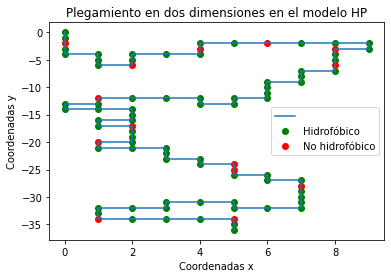


While INTERNO:


Valor it:  100
Valor t2:  53
-> Estructura:  ISESWWNNWWNNNWSWNNEEENWWWWNNNEEESWSEEENENENWWWWNWSWWNNWSSSWSWSWNWWSWWWNWNEENNWWWSSSWSWNN
-> Score:  1028.9300000000003
-> Variable t:  58.70367819374846


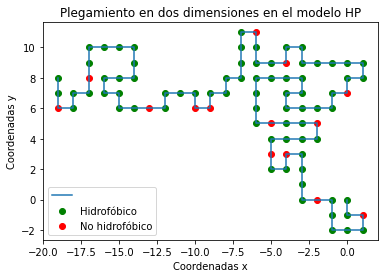


While INTERNO:


Valor it:  100
Valor t2:  54
-> Estructura:  ISWWNNWSSSWNNWSSSWWNWWSSSSWWWSSSWNNWWWSSSWSEEESSSESSWNWSSWWSWWSSESESSEESSWWSSSSWWNNNWNEE
-> Score:  1295.7199999999998
-> Variable t:  58.116641411810974


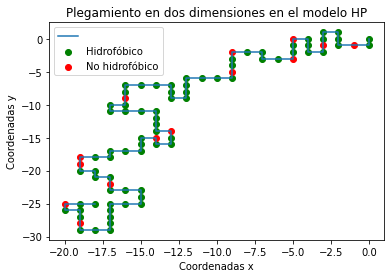


While INTERNO:


Valor it:  100
Valor t2:  55
-> Estructura:  IWSESEEESWWSSSWWSWWWNNWNWSWWWSWSWWWSWNWWSWSSSSESENEEESSESESSSSSENEESENNESEENNNENNENWNNES
-> Score:  1325.81
-> Variable t:  57.535474997692866


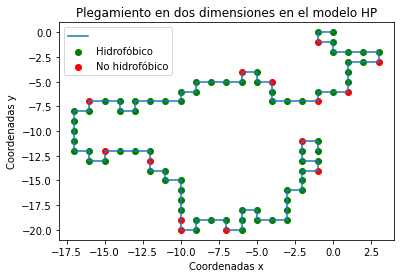


While INTERNO:


Valor it:  100
Valor t2:  56
-> Estructura:  IWWSWWNWWNNWSSWNWNNNNNNNWSWWWSSESSSSWWSWNWWNNWWNNNEENENWWSWWWWWSESSWWSWNWSWSWNNNWNNNENNW
-> Score:  1331.8999999999996
-> Variable t:  56.960120247715935


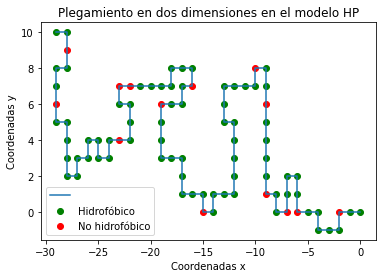


While INTERNO:


Valor it:  100
Valor t2:  57
-> Estructura:  INNNNWWSWWSEEESSSWWSEEEESEENNWNEEESSWSESSSWNNWWSESSSESEEEESSWSWWWNWNWSSWSESEEENEEEESSEEN
-> Score:  1153.51
-> Variable t:  56.390519045238776


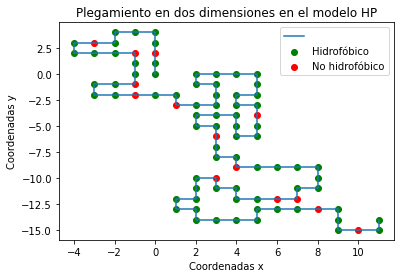


While INTERNO:


Valor it:  100
Valor t2:  58
-> Estructura:  IESSSEENNENWNNWNWNNNNNNEENNWWSWNNNNNENWWWSWNWSSESWWNWWWNENENENENEENENNESSSSSEEESWSESSSES
-> Score:  1188.33
-> Variable t:  55.82661385478639


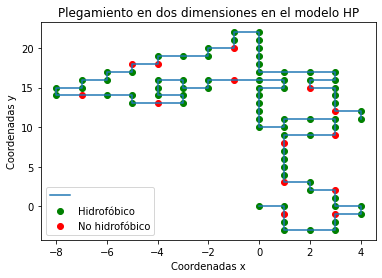


While INTERNO:


Valor it:  100
Valor t2:  59
-> Estructura:  IESSWSWNNNWWNENNWWNENNEEENNWWSWNWWWNEEENNNNEESSENENENENNENEESESESENNENNENENENWWNEEEESESE
-> Score:  1274.87
-> Variable t:  55.26834771623852


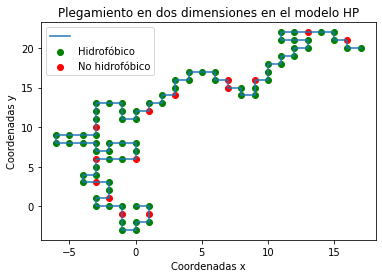


While INTERNO:


Valor it:  100
Valor t2:  60
-> Estructura:  IWWWWSESWSEEESEESESWSESESSSSSESSWWSWWWWWSWWNWNWWNNWNWWSSWSSSWSSWWSESWWWNWNNNNWWNEEEENEEN
-> Score:  1407.5899999999997
-> Variable t:  54.71566423907614


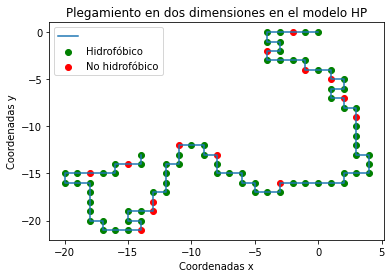


While INTERNO:


Valor it:  100
Valor t2:  61
-> Estructura:  IWNNENNESSESESSESESWSEEESSSSENEEESSWSWSWSSESESESWWSSEENESESESWSWWSESSWSSWSSWWWSWNNNWWSSE
-> Score:  1359.1799999999998
-> Variable t:  54.16850759668538


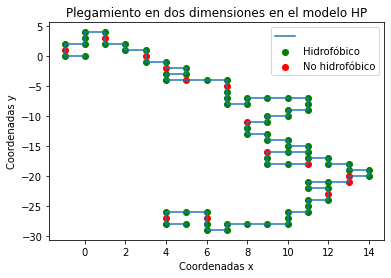


While INTERNO:


Valor it:  100
Valor t2:  62
-> Estructura:  IESESESESWWNWNWWNWWWWNWNWNWNNWNNNENENNWNWWSWSWNNNNNNNNNEENEEEENEEEENWNWWNWNNWWWNNNNNENES
-> Score:  1421.2499999999998
-> Variable t:  53.62682252071853


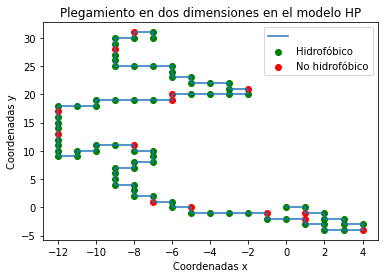


While INTERNO:


Valor it:  100
Valor t2:  63
-> Estructura:  IWWNNNEENEEEEENNEENESSEENEEENWWWNEEENNNNNENNNEENWNENNEESSSWSSSESSSESESEESENNWNNEENWWWWNN
-> Score:  1232.85
-> Variable t:  53.09055429551134


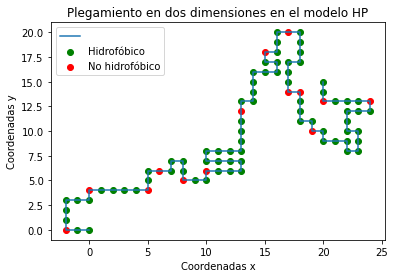


While INTERNO:


Valor it:  100
Valor t2:  64
-> Estructura:  IWNEENNWSWNNEENEEEENEESEEEEENNNNESSSENNNEENNNEEENESENEENENEENENENESSSSEESSSENESSWWWSSWNN
-> Score:  1168.7400000000005
-> Variable t:  52.55964875255623


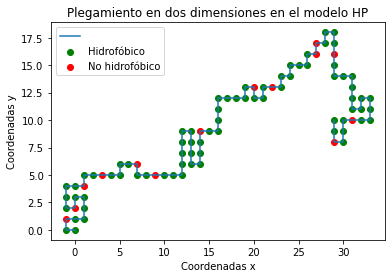


While INTERNO:


Valor it:  100
Valor t2:  65
-> Estructura:  INENEESENEESEENNEEENENENENNNNNENEEEEENNESSEEENWNWNEENESESSSWSSESSWNWSWSWNWNNWWWSSSSEESEN
-> Score:  1312.7599999999998
-> Variable t:  52.03405226503067


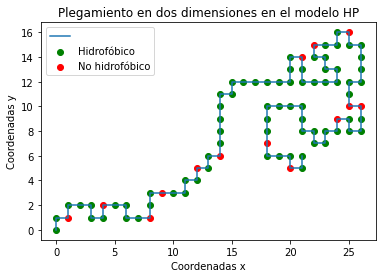


While INTERNO:


Valor it:  100
Valor t2:  66
-> Estructura:  IWSEESSEESEESENEENWNENENEESSSSSSENNNNNNESSSSSSESESWSSWSSWWWNWWSSEEEEESENENESSSWSSWWSSSEN
-> Score:  1027.46
-> Variable t:  51.51371174238036


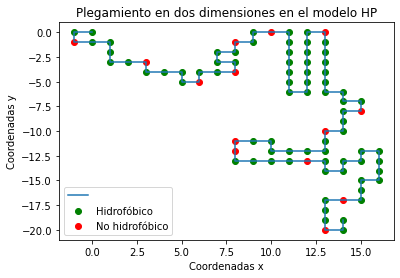


While INTERNO:


Valor it:  100
Valor t2:  67
-> Estructura:  ISENNWNWWNENNWWNENWNENNNENNWWWWNWWNENNNESSENNNENWNENWNWWNNWNWNNEEENNEENWWWNWWNNNNWWWNENW
-> Score:  1245.5499999999997
-> Variable t:  50.998574624956554


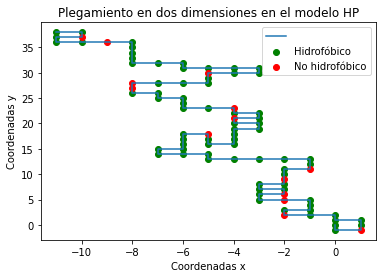


While INTERNO:


Valor it:  100
Valor t2:  68
-> Estructura:  IWSEEEENNESEENNWNNWNENEEENNNNNNNWWNENNNESSENEESENESENNWWWWWNWWWNWNNESEENEESENNEESENNESEN
-> Score:  1105.9900000000002
-> Variable t:  50.488588878706985


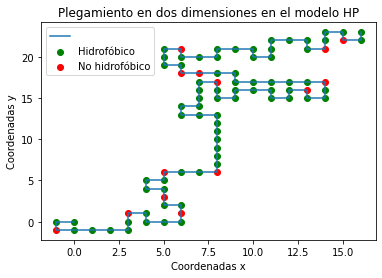


While INTERNO:


Valor it:  100
Valor t2:  69
-> Estructura:  IENWWWNWWNNWWSSSSSESWSWNWWSESSSSSWWNWWWNEENWNWNWSWNWSSSSWNWNWWWNNENWWNWNENENWWWNNWNEESSE
-> Score:  1170.59
-> Variable t:  49.98370298991991


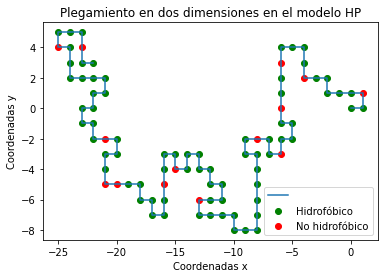


While INTERNO:


Valor it:  100
Valor t2:  70
-> Estructura:  IENWWSSESWWSWWWSSSSSSSWNNNWSWWWSESESSWWWNNNWNWNNNENNNNWWNNWNWSSWWWNNWNWNNWNNWNWNNWSWSWSS
-> Score:  1331.8
-> Variable t:  49.483865960020715


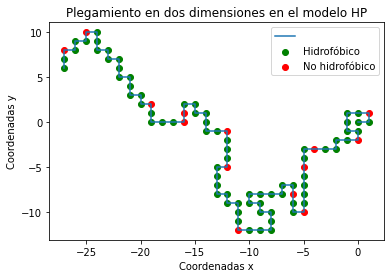


While INTERNO:


Valor it:  100
Valor t2:  71
-> Estructura:  IESEEENNEENWNEENENEENNESSSENENNEESEENENNESENEENNESESEENWNENENWNNWWNNNNWSSWNWNNWNWNNENESS
-> Score:  1302.53
-> Variable t:  48.98902730042051


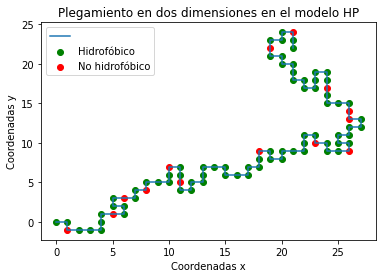


While INTERNO:


Valor it:  100
Valor t2:  72
-> Estructura:  INEEESSSESESSEENEESSSSWSEESSSENEESESSWWSWNWWNNWSSSESSSWSSSESESWSEESWSSESEESESENNWNNENWNE
-> Score:  1310.5600000000002
-> Variable t:  48.4991370274163


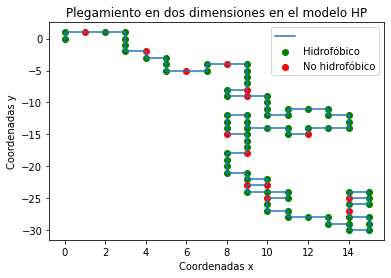


While INTERNO:


Valor it:  100
Valor t2:  73
-> Estructura:  IWWSWNNNEENNENNNENEEESSENNENEENEESEENENWNENESSSEEESSEESSSSSENESENNEENWWNWNENENWNNEEEENNW
-> Score:  1307.8799999999997
-> Variable t:  48.01414565714214


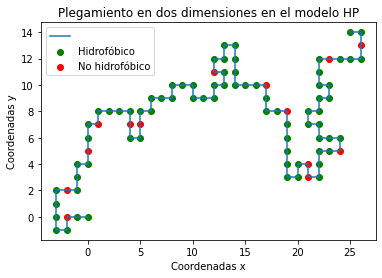


While INTERNO:


Valor it:  100
Valor t2:  74
-> Estructura:  INWSWNNNNENNESEESENNNEEEESWSEESSSWWWWNWSSSESWSEESEEENEENNNENWNENNENNNWWNWNEEEENEEEESSSSW
-> Score:  1324.4999999999995
-> Variable t:  47.53400420057071


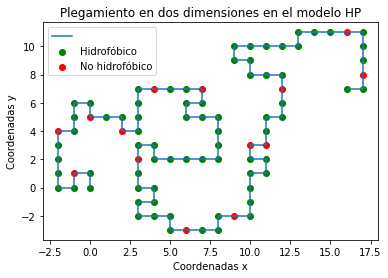


While INTERNO:


Valor it:  100
Valor t2:  75
-> Estructura:  INENWWNEEENNWWWNNENNNEEEESSEENNWNWNNESEEEENNESEEEENNWNNEENEEESWSESEESEESESWWWSESWWSSSSSW
-> Score:  1337.7599999999995
-> Variable t:  47.05866415856501


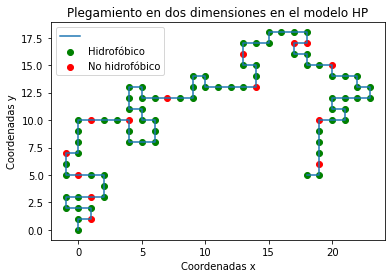


While INTERNO:


Valor it:  100
Valor t2:  76
-> Estructura:  INWNNNNENWWNNWNEENWWNNNWWWWNEEENNWNWNNWWWWSEESESSWSSSWWNWSSSSWWWSWSEEESWWWSSESEEEESWWWSW
-> Score:  1166.6299999999999
-> Variable t:  46.58807751697936


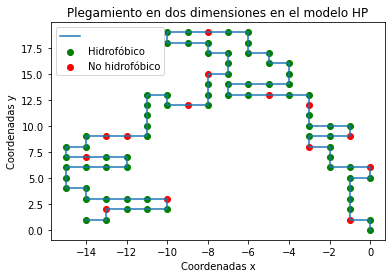


While INTERNO:


Valor it:  100
Valor t2:  77
-> Estructura:  ISESWWWWNWWWSEESWSSWNWWNNNWNEENWNNENEENNNNWSSWSWSWSSSWWNWSWWWWNWWNWSWSSWSSEESSWSWWSSEEEN
-> Score:  1213.3899999999999
-> Variable t:  46.12219674180957


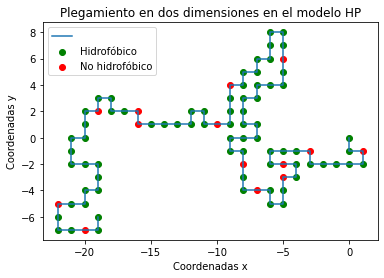


While INTERNO:


Valor it:  100
Valor t2:  78
-> Estructura:  ISSSWWWSWSWWNWWNNWWNENWWWSSSSSEESSWSWWSWWSSESWSWWWWWSWSWWWNNNNNWNNNWNNWNNENNNESESENNWNEN
-> Score:  1373.2100000000003
-> Variable t:  45.66097477439147


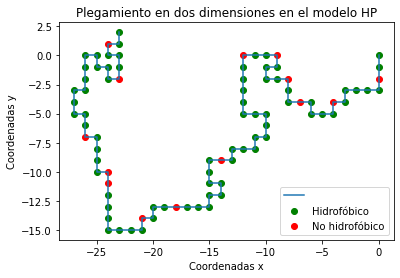


While INTERNO:


Valor it:  100
Valor t2:  79
-> Estructura:  ISSESSENEESESEESWSESWSESWSSSSSSWWWNWNNWWWNNWWWSWWSWNWWSSWSWWWWSSWWWSWWWNWWSWSWNWWSWWWNNN
-> Score:  1437.88
-> Variable t:  45.20436502664755


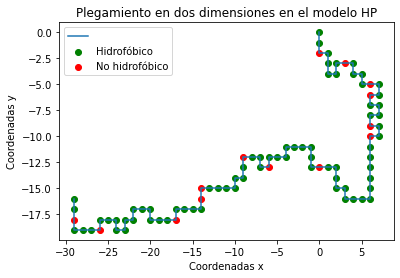


While INTERNO:


Valor it:  100
Valor t2:  80
-> Estructura:  INWSSSESWWSWWSESWWWNWWSWWSWSWSEEESSSWSESSWNWWSESSSESENEEESSENNNWNNNWNNNNESESEEEENWNNNNNN
-> Score:  1246.3200000000002
-> Variable t:  44.752321376381076


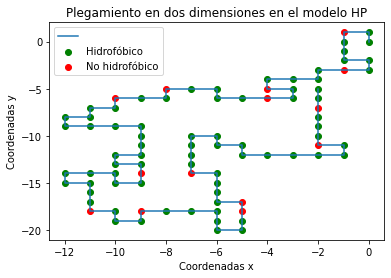


While INTERNO:


Valor it:  100
Valor t2:  81
-> Estructura:  INWWSSSSSESWSSESEESSEENEENEESSSESWWWWSEEESWSSSSWNWSWSESSWWWSEEESWWSESESSWWWWSSWSEESWSSES
-> Score:  1293.1699999999996
-> Variable t:  44.30479816261727


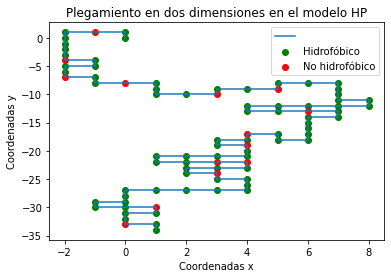


While INTERNO:


Valor it:  100
Valor t2:  82
-> Estructura:  ISSWNNNWSWSWWWSWWWNENWNNNWSSWWWWNEEENWNWSWWWWWWNNNWWSESSWSSSESESWWSESESSSSSWSWWWWSWNWNNN
-> Score:  1151.4799999999998
-> Variable t:  43.861750180991095


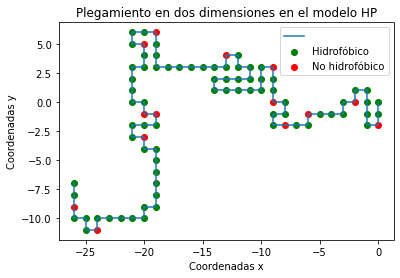


While INTERNO:


Valor it:  100
Valor t2:  83
-> Estructura:  ISENENNWSWWNNNWNENWWSSWWNENNEENNEEENNWNWSWWWSWWWNNESENNNENNEENWNEENWNWWNNENESEEEEEESENNW
-> Score:  1163.6199999999997
-> Variable t:  43.42313267918119


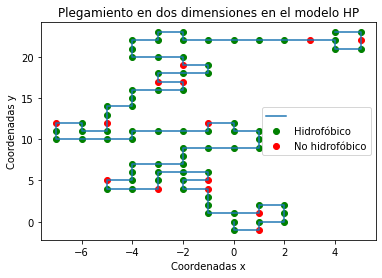


While INTERNO:


Valor it:  100
Valor t2:  84
-> Estructura:  IENNEEENNNNWSSSWNNWWSWSSSWSWSSWSSSSSSSWWWWSWSSSESSWNWSSESEEENNWNEEENENESSSESSSSSESESSWNW
-> Score:  1328.2499999999998
-> Variable t:  42.98890135238938


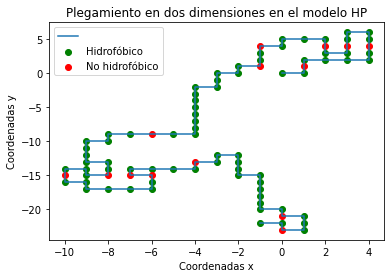


While INTERNO:


Valor it:  100
Valor t2:  85
-> Estructura:  INWWNENNWSWWWWSWNNWWWNWWWNWWSWNWWWNWWWSWNNNENENWWSWNNWWWNNNNWWSWSWWNNNENNNEEENNNESESSSWN
-> Score:  1363.3199999999997
-> Variable t:  42.559012338865486


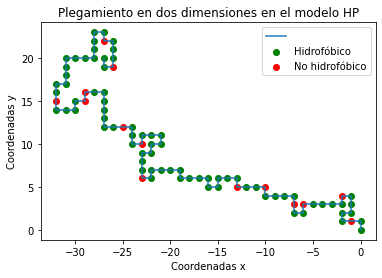


While INTERNO:


Valor it:  100
Valor t2:  86
-> Estructura:  INENNENNNWNNNEESSSENNENNESEENESESSENEENESSESEENEENESSSENNEEENWWNWNNNWWNWWWNNWWSSWNWWSSWW
-> Score:  1348.51
-> Variable t:  42.133422215476834


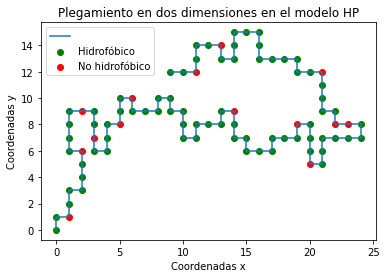


While INTERNO:


Valor it:  100
Valor t2:  87
-> Estructura:  IWNWWWSWSSSSESSWWNWSSWSESWWWWNNWNWWSWNWNEENNWWSWWSSWWNWSWNNENNENWNWWNNENNNNNWNWSWNNNNNEE
-> Score:  1325.1800000000003
-> Variable t:  41.712087993322065


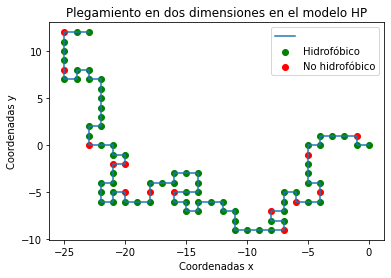


While INTERNO:


Valor it:  100
Valor t2:  88
-> Estructura:  ISSSWWWNNWWWSESWWNWSWNWSWWWNWNWSWSSESWWWNNWNWNWNWSSWWWSESWSEEESSSWSWWWSWWNWNWWNNNEESENNN
-> Score:  1336.3600000000001
-> Variable t:  41.29496711338884


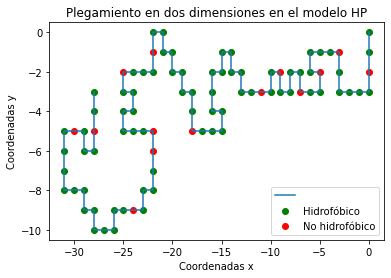


While INTERNO:


Valor it:  100
Valor t2:  89
-> Estructura:  INWSWSSWSEEENWNEESSESSEESEESWWSESSSSSWSSWSSWWSWWWNWNWNWSSWNWNNENNEESSENNNNWNNWNNWWSSWSWS
-> Score:  1223.3999999999999
-> Variable t:  40.882017442254956


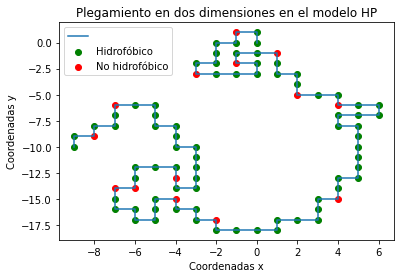


While INTERNO:


Valor it:  100
Valor t2:  90
-> Estructura:  INENNWWNNWWNWSWNWWNNWWSSSSESWSEENESEEENESSSSSWWWWWSSESENNESESSWSESSWWSSSSENESEESESENNNEE
-> Score:  1253.2099999999998
-> Variable t:  40.473197267832404


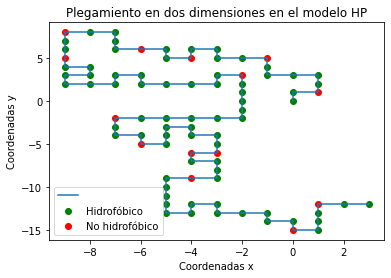


While INTERNO:


Valor it:  100
Valor t2:  91
-> Estructura:  ISSESENNEESSENEENWNNENWNENWNENWNWNENNNWNENNESENNNENNWNNWSWWSWWNWWSWWWSSEESESENESESENNNWS
-> Score:  1139.8699999999997
-> Variable t:  40.06846529515408


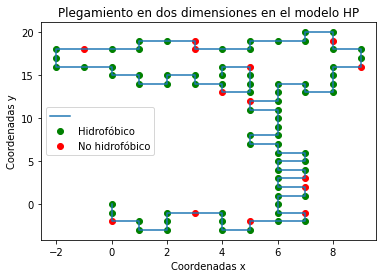


While INTERNO:


Valor it:  100
Valor t2:  92
-> Estructura:  ISENENWNEESSSSSENNNNEEENENEESENEEENNEESWSSESSWSSWWSWSWSWSWWWWSWSSESSENNENENEENESSWSESSEN
-> Score:  1135.63
-> Variable t:  39.66778064220254


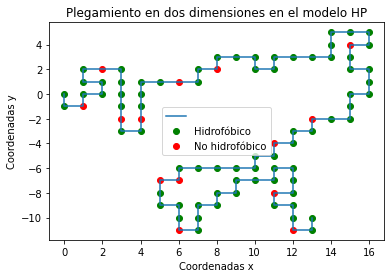


While INTERNO:


Valor it:  100
Valor t2:  93
-> Estructura:  INNEESEEENNNEEENWWWNEEEESEESWSESSSENNNESSSSWWSEEESSWSSESSWSSSSSESESWWSESSSSESSSEESENNNWW
-> Score:  1156.1799999999998
-> Variable t:  39.27110283578051


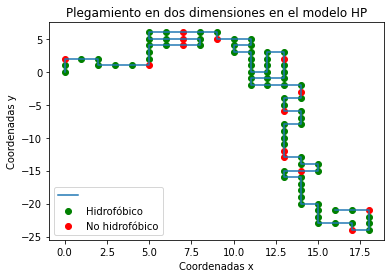


While INTERNO:


Valor it:  100
Valor t2:  94
-> Estructura:  INWNNNNWNWSWWNNNNWWNENENNNWWNWSSSWWSSSWNNNNEENWWWNNNWWSSSWNWWWWWWSWWSEESESWSWWWSSSSEENNN
-> Score:  1182.6299999999999
-> Variable t:  38.8783918074227


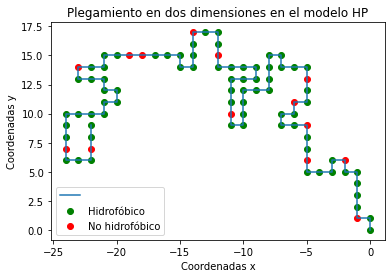


While INTERNO:


Valor it:  100
Valor t2:  95
-> Estructura:  ISESSSWSWSSWSSWWNNWWNWNWNNWSWSWWWWWSSESWSEEESENNESESESENNESSSSSESSSSSEEESSENNESESEENNESS
-> Score:  1311.1000000000001
-> Variable t:  38.48960788934848


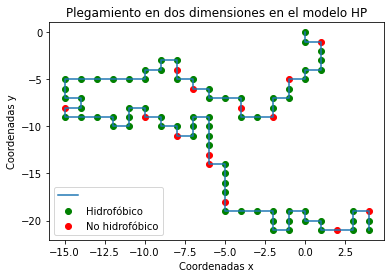


While INTERNO:


Valor it:  100
Valor t2:  96
-> Estructura:  IWWNNESEENESESSWSSENENENEENNENWNNNENWWNEEEEESENNNNNNNENNWNENWWNWNEEENWNWNEEENESEENEEESSW
-> Score:  1219.4
-> Variable t:  38.104711810454994


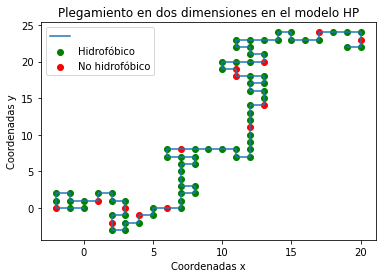


While INTERNO:


Valor it:  100
Valor t2:  97
-> Estructura:  INESEEEEEEESESWWSSENESSSSSESWSESSEESEESWWSWSSENEEESSSWWWSWNWSWWSWWSSSESSSENNENEESSWSSSSS
-> Score:  1259.18
-> Variable t:  37.72366469235045


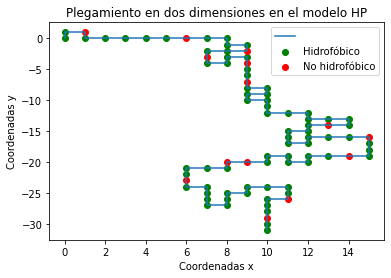


While INTERNO:


Valor it:  100
Valor t2:  98
-> Estructura:  IWNEESSWSWWWSWSSWNWSWWSSWSEESSESWSWNWSSWSESEENWNEESENENNWNEESSSSSENNNESSSESESESWSSWNNNWN
-> Score:  905.2200000000001
-> Variable t:  37.34642804542694


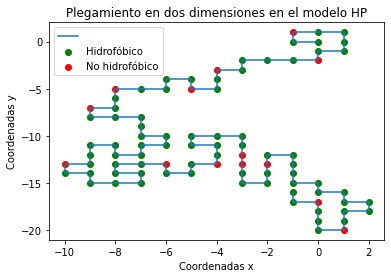


While INTERNO:


Valor it:  100
Valor t2:  99
-> Estructura:  IESSWWWNWNWWWWWWWNNWWNWNNNNNENNESESWSEESENENNWSWNNENWNWWSWNNEEEESENENNNNWSWWNWNEENESEENW
-> Score:  991.0500000000002
-> Variable t:  36.97296376497267


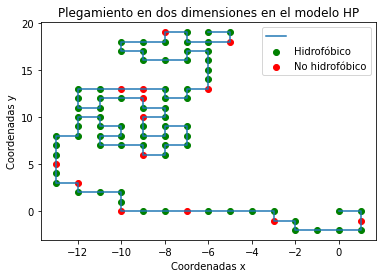


While INTERNO:


Valor it:  100
Valor t2:  100
-> Estructura:  IEESENNENWNNNWWSWNNWSWSSSESSWSSWWSWNNNWNWSWSSENESSWSWSEENESSSESENNESEEENWWNEENESSSSEESES
-> Score:  987.5099999999998
-> Variable t:  36.60323412732294


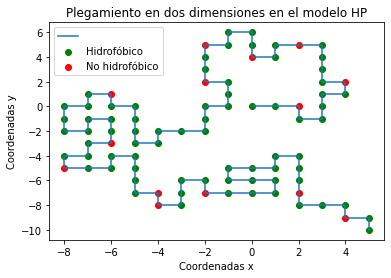

'IEESENNENWNNNWWSWNNWSWSSSESSWSSWWSWNNNWNWSWSSENESSWSWSEENESSSESENNESEEENWWNEENESSSSEESES'

In [45]:
#A1L190
#MDDADPEERNYDNMLKMLSDLNKDLEKLLEEMEKISVQATWMAYDMVVMRTNPTLAESMRRLEDAFVNCKEEMEKNWQELLHETKQRL
A1L190 = 'MDDADPEERNYDNMLKMLSDLNKDLEKLLEEMEKISVQATWMAYDMVVMRTNPTLAESMRRLEDAFVNCKEEMEKNWQELLHETKQRL'
prueba_simulated_annealing4(A1L190)

While INTERNO:


Valor it:  100
Valor t2:  1
-> Estructura:  INENWWWSSSWWNNNNEENNNNNEEESSWWSSSENEEEESSEEESSSEEENNESSSEESEENEENEEEENENNNWWWWWNNWNEEENENENESSESSSEENNNNEESSSS
-> Score:  1709.2699999999986
-> Variable t:  99.0


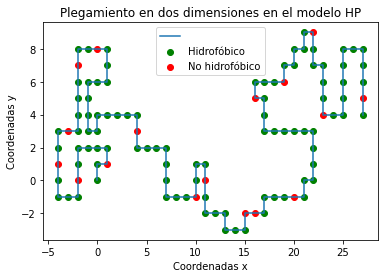


While INTERNO:


Valor it:  100
Valor t2:  2
-> Estructura:  IWWSSWNWWWNNENNESENNNWSWNWNNEENNNWSSWWNNNNNWNNNWWSESWWWWSSWSEESESWSWWSWWNNWWNWWNNWNWSWWWWNWNWWSWNWSSEEEESSWSES
-> Score:  1534.92
-> Variable t:  98.01


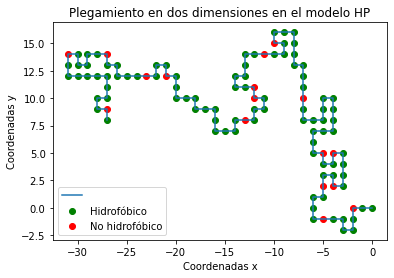


While INTERNO:


Valor it:  100
Valor t2:  3
-> Estructura:  IEEESESESESSSENESENEESESEEENENNNNWSWNNENWNENNEEENNNESSEENNENWWNWNEEEENENEENWNENEENENEENNNNWWNENEEENENNNESSSSES
-> Score:  1650.6699999999992
-> Variable t:  97.0299


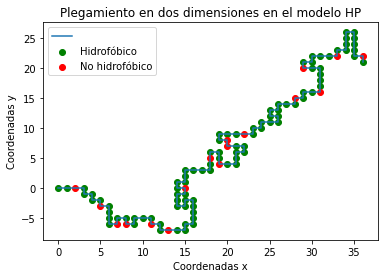


While INTERNO:


Valor it:  100
Valor t2:  4
-> Estructura:  INEESESSSEESSSSSWWSWSWSSSSWWNWSSWSSWWWSEESWSWWWWWSEESSSSEESENEENESEEENENNEENESESENENNEEENNWSWNWNNENNWWWNEEENWN
-> Score:  1699.11
-> Variable t:  96.059601


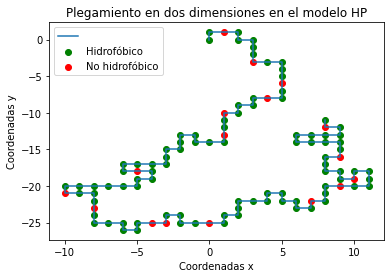


While INTERNO:


Valor it:  100
Valor t2:  5
-> Estructura:  IWWNENEESSENNNNNEENENENEEESESSENNNNNNNWSSWWSWNWSWSWWNNWWWWNNEEENEENWWNNNNEENEENENNNWWNNNWWSESWSWWWWNWWSSEEEEES
-> Score:  1575.2499999999993
-> Variable t:  95.09900499


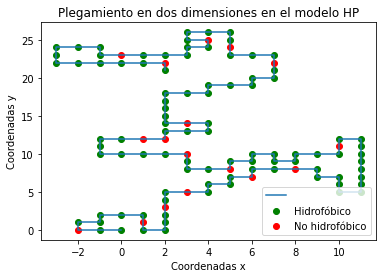


While INTERNO:


Valor it:  100
Valor t2:  6
-> Estructura:  IWSEEEEEENNWWWWNENNNNENNWWNWSSSSWWWNEENNNNNWNEENENNNNNEENNEEEENWNNWSSWWWWNNWNNNENWWSWNNNWWSESWSWSWSWSSWWSESWSS
-> Score:  1555.1399999999999
-> Variable t:  94.1480149401


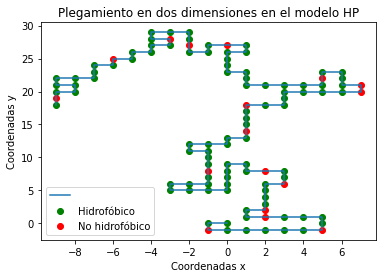


While INTERNO:


Valor it:  100
Valor t2:  7
-> Estructura:  IWWWNEEEENWNWWWNENWWWNWSWWSESSSESSESWSSWWWWWNEENENWWWNNNWWNWSSSSWWSSWNWSSSWSWWWWWSWSSSESSENNESESESENNESESSWSES
-> Score:  1599.41
-> Variable t:  93.206534790699


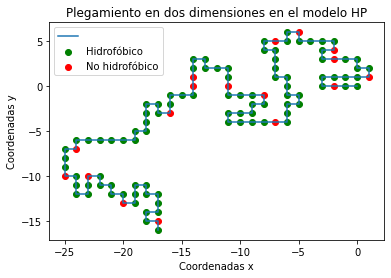


While INTERNO:


Valor it:  100
Valor t2:  8
-> Estructura:  IENEESEEENWNWWWNEENEESENEENWNNNWNNNESENEENNWNENNWWSWWNNWWWNNWSWWNNWWWNWSSSWSWSSESSWSSWWNNWWSSWSWSSSENESESSSEES
-> Score:  1749.2699999999986
-> Variable t:  92.27446944279201


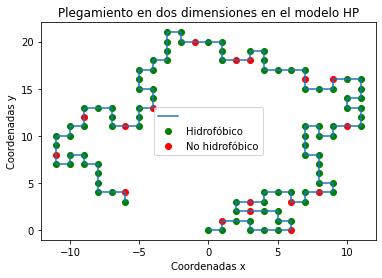


While INTERNO:


Valor it:  100
Valor t2:  9
-> Estructura:  IESSSWSWNNNNNNNESSEEESSEESESWSWSSSEESWSWSSWSWWWNWSSWWNENNWNNNNNWNNWNNEENNNNWNNESENENNEEESEENNNNNEESSSSWSSESWSW
-> Score:  1687.2499999999995
-> Variable t:  91.35172474836409


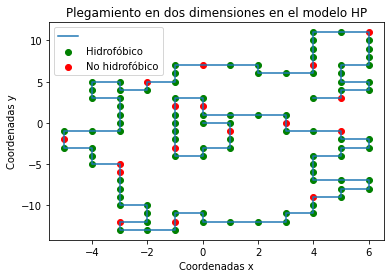


While INTERNO:


Valor it:  100
Valor t2:  10
-> Estructura:  INESSWWWNWWWWWWWWWWSSWSSSWWNENNNNWSSWNWNWWNNWNNENNENWNNWNNEENNENNNWNNEENENWNNWWNWWNWWNNNEEENWWWNNNENNWNNWNNEES
-> Score:  1689.6499999999992
-> Variable t:  90.43820750088045


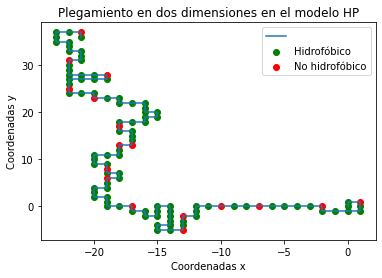


While INTERNO:


Valor it:  100
Valor t2:  11
-> Estructura:  INESSWWWSSSSSSEENEENESEEESSWNWWWWSEESWSSSWSSEEESENEENNWWNNESENEENENEESENEENEENWNWNENNWWSSSWWWNWNWWWWWWNNNNNENE
-> Score:  1545.7099999999994
-> Variable t:  89.53382542587164


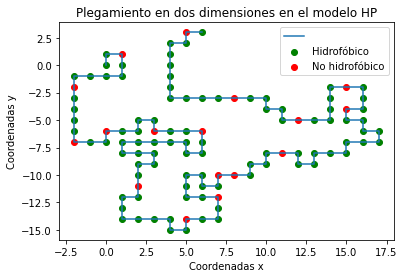


While INTERNO:


Valor it:  100
Valor t2:  12
-> Estructura:  ISWNNNNENNNNENNEESENEENNNEESWSSSWSSSWNWWWWSSESSSEESWWWSSSESWSESEESEEESSESEESSENENENEEESSEESSEEESEEEENNNENNESEE
-> Score:  1608.0799999999992
-> Variable t:  88.63848717161292


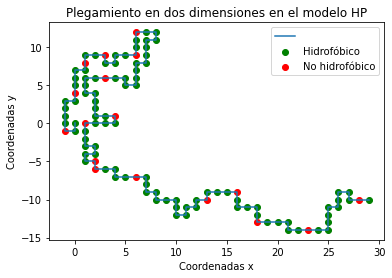


While INTERNO:


Valor it:  100
Valor t2:  13
-> Estructura:  IESWWNNNWWSSSWWNNNWSWWSSESSWNWNNNWWWNENNEENENNNWSSWNNNNWNNESENEENENEEEEESESWWSESESEEEESWWSSSSSWNNWWNWNWNWWNNWW
-> Score:  1554.7199999999993
-> Variable t:  87.75210229989679


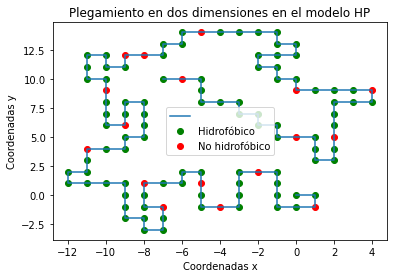


While INTERNO:


Valor it:  100
Valor t2:  14
-> Estructura:  IESWWNNWWWSWSWSWSWSESSEENEESWSWWWSWWNNWSSSSSSWWSESSSWWWSWWWWSESWSWSWSSEEEEESSENENESSEESSSSEESENNNWNEESSSENNEEN
-> Score:  1554.0499999999997
-> Variable t:  86.87458127689783


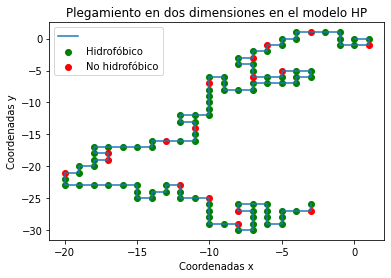


While INTERNO:


Valor it:  100
Valor t2:  15
-> Estructura:  ISWNNNWWNWWNNEESESENEENNWNNESESSSESSSSENNNNEEEEEESEESEEESENNNNESSSESSEEESESWWSSWSSWWNWWSSSENEESEENEENEEEESSWSE
-> Score:  1517.4999999999998
-> Variable t:  86.00583546412885


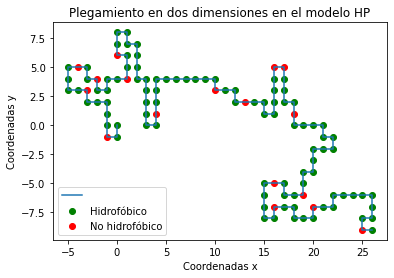


While INTERNO:


Valor it:  100
Valor t2:  16
-> Estructura:  IESEEESSSENNENNNNNNWWWWNWWSWWWNWNWWWNNWWNNNWSSSSWNWWNWWSWSEEESSSWWWSSESSSSSWWSESEESSWWNWSWSSSESEENENWNEENENNEN
-> Score:  1668.0599999999995
-> Variable t:  85.14577710948755


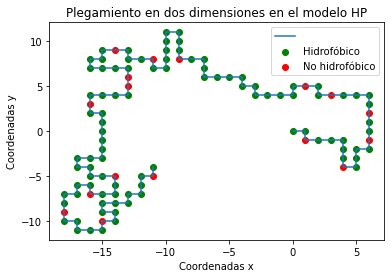


While INTERNO:


Valor it:  100
Valor t2:  17
-> Estructura:  IESSSESWWSEESEEEEEENENNNNWSWWNENEEENESENESSEESSSWSEEENWNENNNNEEESENNNESEEEESSENENWNENWNWWWSWNWNWNNEENNNNESESSE
-> Score:  1525.1499999999994
-> Variable t:  84.29431933839268


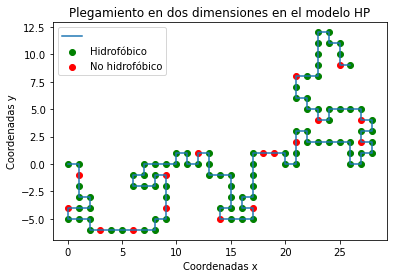


While INTERNO:


Valor it:  100
Valor t2:  18
-> Estructura:  INESEESWWSEESWWSESWWNWWNNWSWSWWSWSSEESSESWSEESSWNWSSWSESWSEEESSSWWSEESENNEESSENNNWNNNNENESESEESESWWWSEESWWSWSE
-> Score:  1337.5499999999993
-> Variable t:  83.45137614500875


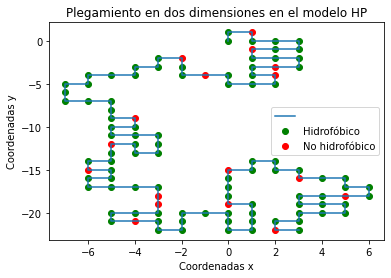


While INTERNO:


Valor it:  100
Valor t2:  19
-> Estructura:  ISWNWSWWWSEEESSENESSWSESWWSSSWWSWWNWSWWSWNWWWNWNENWWNWWNNNWWSESSWNWSSSEEEEESWSESSSSSWSWWSWWWSEESSWWWSEESWSESSS
-> Score:  1435.6599999999996
-> Variable t:  82.61686238355867


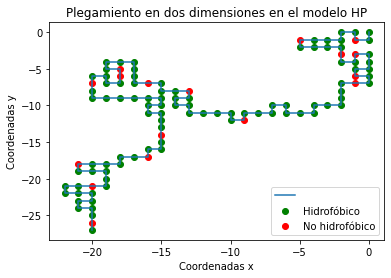


While INTERNO:


Valor it:  100
Valor t2:  20
-> Estructura:  INNEEESWWSEEEEENNNEEESENENWWNENWNENNWWWSWSWSSWWNENWWNWWWWWWSSWWWNNWSSWSWWSSWNWWWWWWSSSWWNNNNNNWWWSWNWSSWNWSWSW
-> Score:  1507.999999999999
-> Variable t:  81.79069375972308


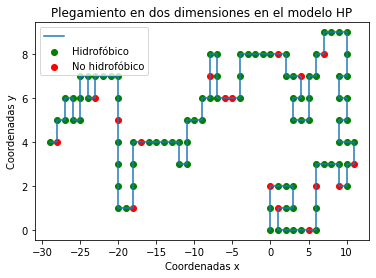


While INTERNO:


Valor it:  100
Valor t2:  21
-> Estructura:  IWWNWSSWWSEEEEENEEEESWWSWWWSWNWSWNWWSSSSENESSWSWSSESWSSENESSENEESSSEESWWWWWNNWSSWWWSSESESEEEENWNENESSEESWSWWWW
-> Score:  1270.59
-> Variable t:  80.97278682212585


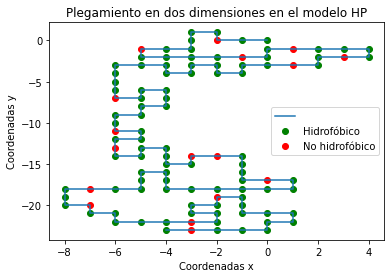


While INTERNO:


Valor it:  100
Valor t2:  22
-> Estructura:  INWNNWNEENWWWWNWNNWSWNNWNENWNENNEEENWNNNWSWNNENNWWSWNWSSSWWWWSSSWNWSWWNWWSESSSSSWSEEENNNESSSSSWNWSWWWWSESSSWWS
-> Score:  1494.5599999999995
-> Variable t:  80.1630589539046


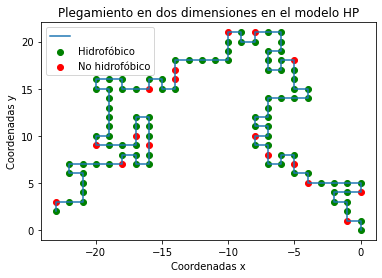


While INTERNO:


Valor it:  100
Valor t2:  23
-> Estructura:  INWWSSWSWSESWSSWNNWSWWWSSWWSWSESWWNNWNWWSESWWNWWSWWWNWSWWNNNNEEESSENEESEENWNENNEENWWNWWWNEENWWNEENEENNWSWNWNNN
-> Score:  1310.3399999999997
-> Variable t:  79.36142836436555


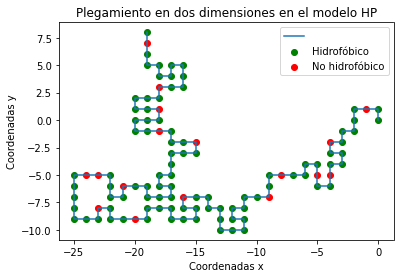


While INTERNO:


Valor it:  100
Valor t2:  24
-> Estructura:  INEESESSWWWSSWSSWWSESWWSWNNWNNWWWWNWWSESEESWWSSENEESWSESESSESWWWNNNWWWNWNWSWNWWNEENNNWSSWNNWSWNNWWWWNEENENWNEN
-> Score:  1393.8799999999999
-> Variable t:  78.56781408072189


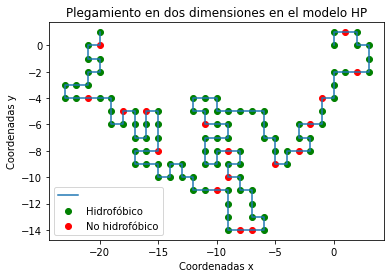


While INTERNO:


Valor it:  100
Valor t2:  25
-> Estructura:  INNENNNNWNENWNNEENNWWWNWSSSSWNWSWNNNENWWWSWNNEENWWWNENWWWNENENNWNNNNEEENEENESSSENNESSSEEESSEEESWWSSSWNNWWSESWS
-> Score:  1461.6399999999994
-> Variable t:  77.78213593991467


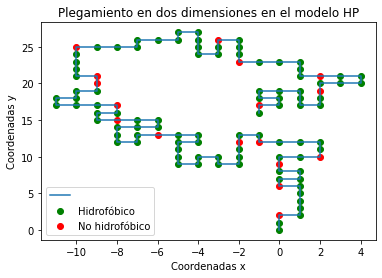


While INTERNO:


Valor it:  100
Valor t2:  26
-> Estructura:  ISWNWWWSSWNNWNNNNWNNNNNWWWWSWNNWNEEESENNNNESESEENWNNENESESWSSEEESSEESSEEEENESSWSSEEEENNNESSESSSWWSSEESSEEEESSE
-> Score:  1610.8699999999994
-> Variable t:  77.00431458051553


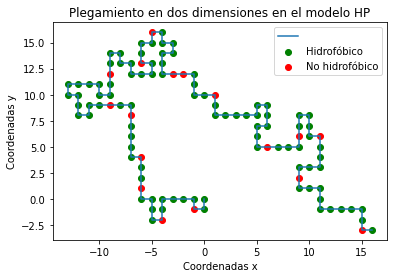


While INTERNO:


Valor it:  100
Valor t2:  27
-> Estructura:  IESWSWNNNNESENESSSSWSWWSSSENESSESWWWNWSSEEESSWSSENEEENNENESSSESESEEEEENNWNWNENNESENEEEEEEESSESSSWWWSSSSESSESSS
-> Score:  1496.7599999999993
-> Variable t:  76.23427143471037


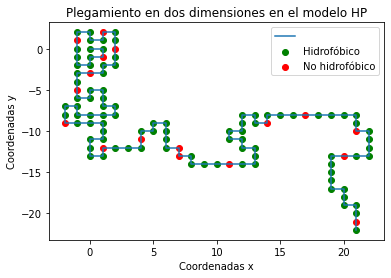


While INTERNO:


Valor it:  100
Valor t2:  28
-> Estructura:  INESESWWWWNENWNEENNENEEESSENNEENNENWNWSSWNNNNENNNWNNNNEENEEEENEENWWWWNEENNWWNWNEENWNWNEESEEENENNESENESSEEENNNN
-> Score:  1508.1199999999994
-> Variable t:  75.47192872036327


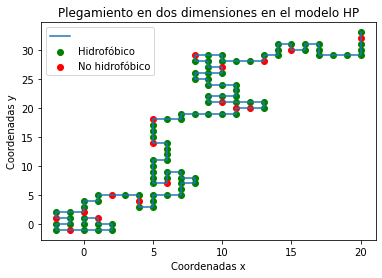


While INTERNO:


Valor it:  100
Valor t2:  29
-> Estructura:  ISWNWNEEEEEENWNENNESEEENEENWWNNWNENWNNWWNENNEEEEENESSSSSESSESESSENNEENESEENESSSSSEESSWSSWNNWWSSWSSSESWWSSWWWSS
-> Score:  1648.6099999999992
-> Variable t:  74.71720943315964


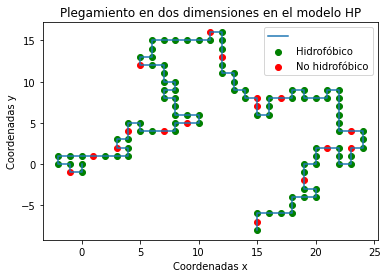


While INTERNO:


Valor it:  100
Valor t2:  30
-> Estructura:  ISSEESESWWWWSEESSENEESSESSSSSWSESWSEEENWNEEESESSSENNEESENEENEESWSESWWSWNWWSWWWSWSEEEESSESWWWNWWWWWWSSWWSWNNNNN
-> Score:  1527.8699999999994
-> Variable t:  73.97003733882804


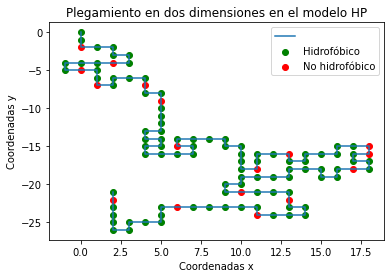


While INTERNO:


Valor it:  100
Valor t2:  31
-> Estructura:  IEENNEEEENEENWNEENWNNENNEEENNENWWWWNNNWSSWNWWNNNNWWNNNENWWWWWWWNENNNNWNNNENEEEESEESEEENWNENESESWSSWWSWSESSSSSE
-> Score:  1671.539999999999
-> Variable t:  73.23033696543976


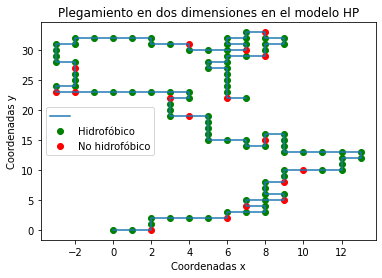


While INTERNO:


Valor it:  100
Valor t2:  32
-> Estructura:  IWWWNNWNNNEENWNEENWNNEENNNEEESSEESSWWWSEESWSESWWSEESWWWSSSSSWSESWSSEENESSWSSENESSSSEESENESEESESWSESEESENNNNWWS
-> Score:  1532.1999999999996
-> Variable t:  72.49803359578536


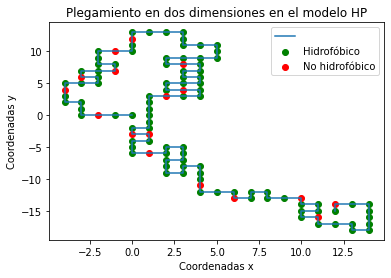


While INTERNO:


Valor it:  100
Valor t2:  33
-> Estructura:  INNWSWSSEESWWWNNNWWNWNENNNNWNWWSWNNNESENNEENWNENNESEESSSSEESWSEEENENNWNEEENENNESESWSSWSESWSSWSSESEEESSENNNNWWW
-> Score:  1453.1799999999992
-> Variable t:  71.7730532598275


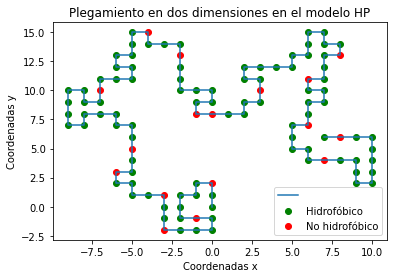


While INTERNO:


Valor it:  100
Valor t2:  34
-> Estructura:  ISENENNENEEEESSEENEENNNNEESEENNWWNWWNEENEENWWNENWWNNEENESESWSESESESESESWWWSWSEESESWSSWSEESSEESSESSENNEENNNENES
-> Score:  1553.459999999999
-> Variable t:  71.05532272722922


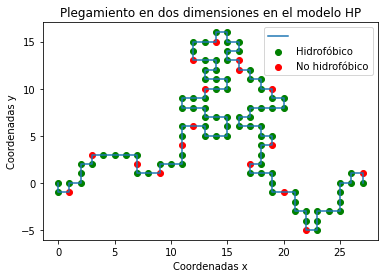


While INTERNO:


Valor it:  100
Valor t2:  35
-> Estructura:  INENNWSWSWSSWNWWWWWNNENWNWNWNWNNNNWNNNWNNENWWWNNWWNNEENESSESEENNNNENENEEESESENNENESESSENNEEENEENESENNESESSWWSE
-> Score:  1675.9999999999993
-> Variable t:  70.34476949995693


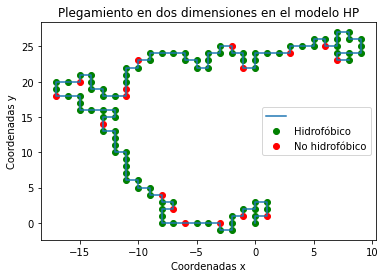


While INTERNO:


Valor it:  100
Valor t2:  36
-> Estructura:  IESEENWNNNWSWNWNNWWWNEENENNNEESESWSEEENWNENWWNEENESESENEESESENNNEEENENENENWNNWWNWNENESENNWWWSWNWNENWWNENEESENN
-> Score:  1400.7899999999995
-> Variable t:  69.64132180495736


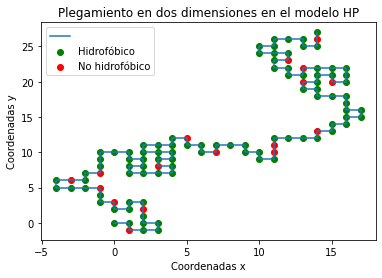


While INTERNO:


Valor it:  100
Valor t2:  37
-> Estructura:  IWNWNWSSESEESWWSWSSESWWWNNENWWNWNENWWWWWNEENWNNWSWNNNNNENNNENENWNWNNENNWWSSWSESWSWWSWNWSWSWNWWNWWNWSSSWSSWNNWW
-> Score:  1437.4899999999996
-> Variable t:  68.94490858690779


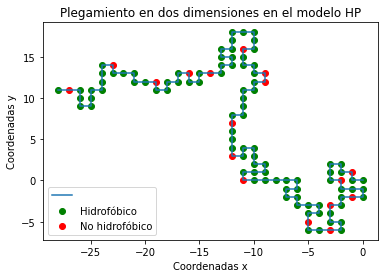


While INTERNO:


Valor it:  100
Valor t2:  38
-> Estructura:  ISWSWNWWSWSESWSSWSSSWNNWNWNWWWSSWWSEEEEESWWWSWWWSESESESWSSWNWWWSWSWWNNNWNWWWNWNENNWWNNWSWWWWWSWSSWSWNNWWWSSSES
-> Score:  1700.599999999999
-> Variable t:  68.25545950103871


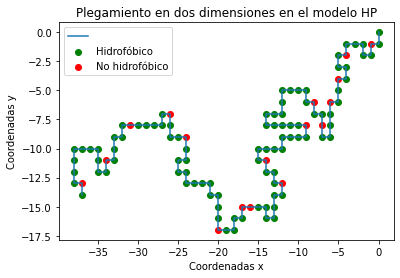


While INTERNO:


Valor it:  100
Valor t2:  39
-> Estructura:  IWWSESESESSESWSWNWNWNNNWNWWWSWSSWWSESSSSSWSSSWSSENENESSSSESWWWWSSESSEENNESESSSESESEESSEESESWSESSSSSSWSESWWWNWN
-> Score:  1731.4499999999994
-> Variable t:  67.57290490602833


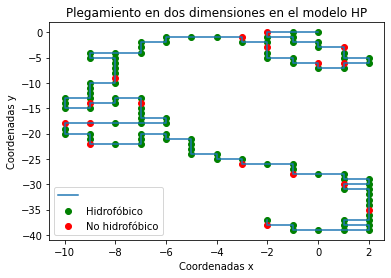


While INTERNO:


Valor it:  100
Valor t2:  40
-> Estructura:  IESSESESENNWNENESESESSSEEESENESSWWSWNWSSWWSSWNNNWWWWWSWWSSSWSSWSWSWWWWWSWNWNWWWWSWSSWSSSWSSWWWNNNNNWWSESWWWNNE
-> Score:  1604.1599999999992
-> Variable t:  66.89717585696805


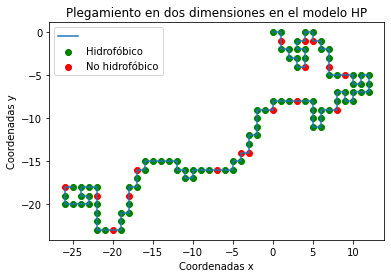


While INTERNO:


Valor it:  100
Valor t2:  41
-> Estructura:  IWNWSSSWWSSESWSSSSWSWNWWSSSSESWSWWSSWSEESSEESSSSEEEEESSSEEESESSESSWSWWWWWNWNWSWSESWWNWWNNWWWWWNENNNEENWNEENNWN
-> Score:  1746.5699999999995
-> Variable t:  66.22820409839836


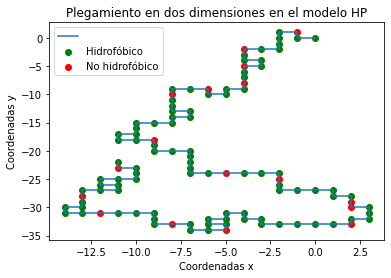


While INTERNO:


Valor it:  100
Valor t2:  42
-> Estructura:  IWNWSSSWWWNWWWSSSWNWWWSSSSWNNWNENNWWNWSSWNWSSESEESSSSWWSESSSSEENEEEESEENNEESENENWNEESESEEEESSESESSSSENNESSENEE
-> Score:  1529.4499999999991
-> Variable t:  65.56592205741438


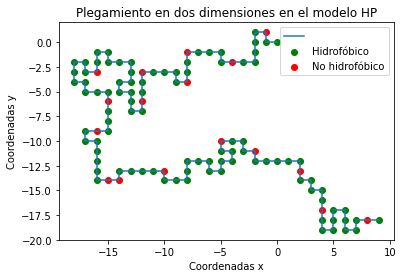


While INTERNO:


Valor it:  100
Valor t2:  43
-> Estructura:  IESSENNNNESESEEEESWSEENNNWWWNNESEEENESEESESEENENEEEENEESESWSWSSSWWSSWSSEESESWSWSEESSWSWNNWSWNWNWNWWNWWWNENNWNN
-> Score:  1520.1099999999992
-> Variable t:  64.91026283684023


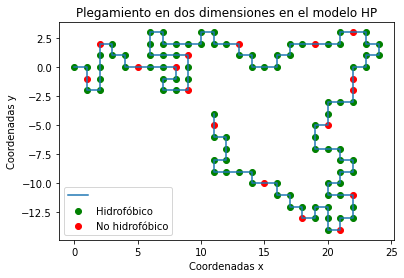


While INTERNO:


Valor it:  100
Valor t2:  44
-> Estructura:  ISWNNWNENEENNWSWWNENWNNESEESENESSEENESSWSESSWWWSWWSSESESESWSSWWWNENNNWWWWNWWNWNNWWNWNWSWWSSWNWNWNWSSESSWNWWNNN
-> Score:  1445.3799999999992
-> Variable t:  64.26116020847184


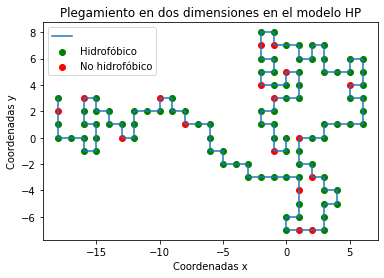


While INTERNO:


Valor it:  100
Valor t2:  45
-> Estructura:  ISWWSSWNWNNWWSSWSSWSESESWSWNWSSWWSWSWNNENWWSWWWSSWSSSWWWWNNWWNNENENNENEENENWNWNNWWSESWSWNWWWSSWSWWSWSWWNENNENW
-> Score:  1643.4899999999993
-> Variable t:  63.618548606387115


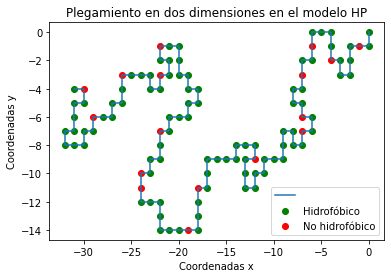


While INTERNO:


Valor it:  100
Valor t2:  46
-> Estructura:  IWSEEEESENEEENESESWSESEEEESSENNNENNWNENESEENEESENNWWWWWWWWNWWNNEESENENWNWNWSWSWWSWWWWWSWNWWWWSSESWSWWNNWWWWWNN
-> Score:  1555.3799999999992
-> Variable t:  62.98236312032324


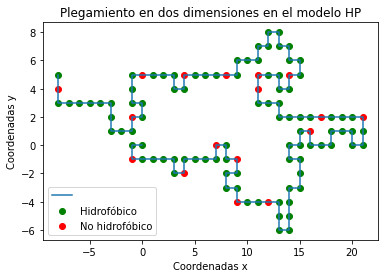


While INTERNO:


Valor it:  100
Valor t2:  47
-> Estructura:  IENWNNWWSESSSESSESWSEENNEENENNEESESSESESWSWSSESEEEESEESWSSWSESWWWNWSWSESESENENESESWSSSWWNNWWWWNWNNWSSWNWWNWSWS
-> Score:  1478.6699999999998
-> Variable t:  62.35253948912001


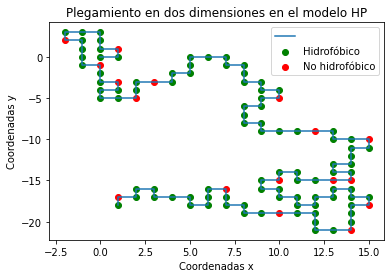


While INTERNO:


Valor it:  100
Valor t2:  48
-> Estructura:  ISEENNWNWSWNNNNNWNEENNWNENNESSSESESENNNNEESEENNWWWWNWSWNWWWSSWNWSWWWNWSWWNWSWSWWSSSWWWNNEENNWWNWNENWNWWWSSSEEN
-> Score:  1489.06
-> Variable t:  61.72901409422881


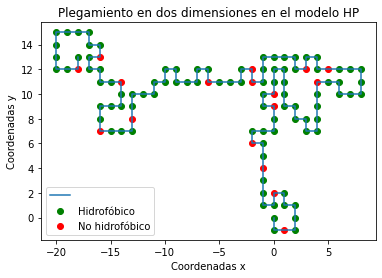


While INTERNO:


Valor it:  100
Valor t2:  49
-> Estructura:  INWSWWSWWSWNWWSSSWWSSENESEESWWSESEESEEEESSWWWSSSSSWNWSWNNNWSSWNWSWWNENWNNENWWWWWWSESWSWWWNNENNENENWWNWWNWNNWSS
-> Score:  1566.2500000000002
-> Variable t:  61.11172395328652


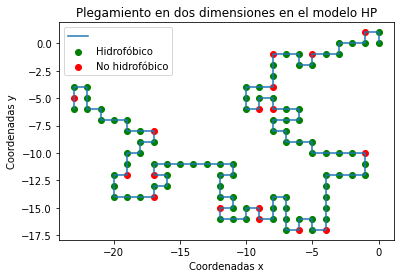


While INTERNO:


Valor it:  100
Valor t2:  50
-> Estructura:  IEESWWWNWSWNWWWWWNEEENNENWWNWWSWNWWWSSSWNNNWWWSSEESWSESSSSENNESSESSWNWSWWNWNNNNNNWWNENNWWWNNWWWSWSSWNWSSSWWSWW
-> Score:  1357.599999999999
-> Variable t:  60.500606713753655


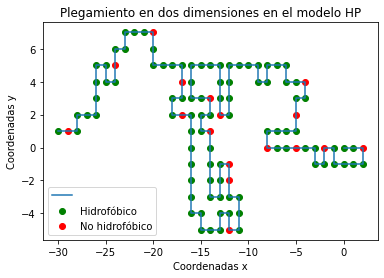


While INTERNO:


Valor it:  100
Valor t2:  51
-> Estructura:  IEEESEESENEENNWWWNEEENWNWSWNWWWNEEEENNNNEENWNEENNWNENWWNWNWSSSWWSWWNENNNWNWWWWNNNWSWWNNNNNENWNNWNNEEENWWNNNWSW
-> Score:  1479.7699999999993
-> Variable t:  59.89560064661612


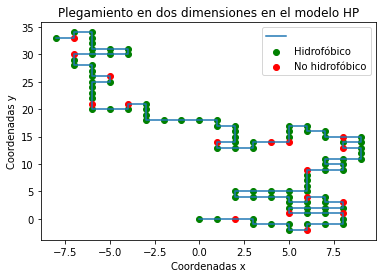


While INTERNO:


Valor it:  100
Valor t2:  52
-> Estructura:  IESWSWWNNWNNNWSSWNNNNWSWWSWNWWWNEEEENWWWNEENEEENWWNENWNWWNWWWSWWSWSWNWNWWNWWNWNWWWWWWNWNWWNWSWWSWWNWWSSSWSWNWN
-> Score:  1544.2499999999989
-> Variable t:  59.29664464014996


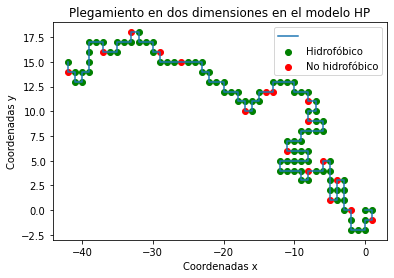


While INTERNO:


Valor it:  100
Valor t2:  53
-> Estructura:  INWWSSSESEESSENNNESEEEEEENESEEESWWWWSEEEESSESESENNESSESSSWWSSESSSWSSSEEEEENWNWNNNEENEENEEESSESSSWWWSSWSWWSSWSS
-> Score:  1635.769999999999
-> Variable t:  58.70367819374846


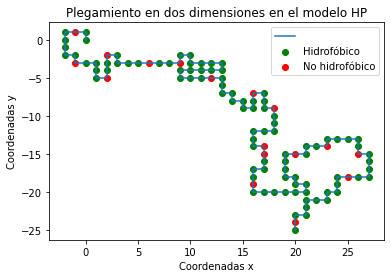


While INTERNO:


Valor it:  100
Valor t2:  54
-> Estructura:  IWSSSSWWNWSWNWWWWNENNEEENWNENWWNEEEENWNWWNNNENNENWNNNNENEESEEENNWWWWWNNNEENNNWNWSWWSWSSSSWSWSSSESWSWWSWWWSWNWW
-> Score:  1671.4999999999993
-> Variable t:  58.116641411810974


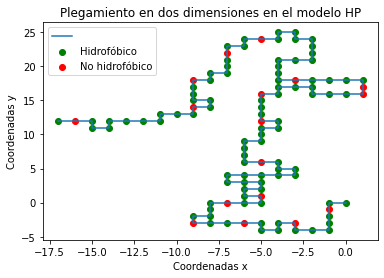


While INTERNO:


Valor it:  100
Valor t2:  55
-> Estructura:  ISESSEESWWSSSEEENESEEEESENESSSEESESSSSWSSESSWSWNWWWSSWNWWWWSWWNNWSWNNNNNENWWNWWWSWNWNWWWWWSWWNENNEENENEEEESSEE
-> Score:  1770.0799999999992
-> Variable t:  57.535474997692866


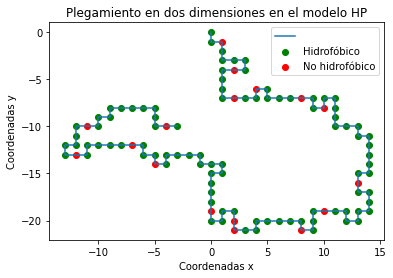


While INTERNO:


Valor it:  100
Valor t2:  56
-> Estructura:  IESSSSESWWSWWSSSESWSEEESENNEEEEEEESSSWNWWSWSSESWSEEEESWSSESSWWNNWSWWSSSESENNEEEENEENENEENNWNWWNNWNENEENWNENEES
-> Score:  1635.1099999999992
-> Variable t:  56.960120247715935


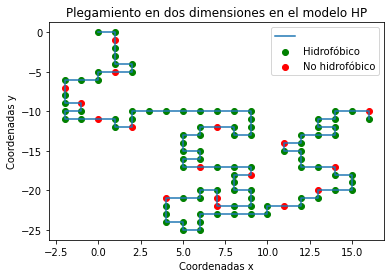


While INTERNO:


Valor it:  100
Valor t2:  57
-> Estructura:  IWWSEEEESSESENEEESWWSSWWSESSSSWSWNWSSSWSWWWNNWSWSESSSWWSSESEENEEEESWSSWSSENEEENEESENENNENNESEESSWWWSEESWWWSEES
-> Score:  1469.029999999999
-> Variable t:  56.390519045238776


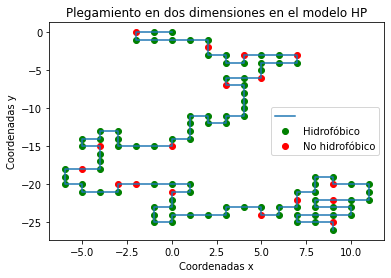


While INTERNO:


Valor it:  100
Valor t2:  58
-> Estructura:  ISWSESSSWWNENWNNWNNENNNENWNEEESESSSEESENENESEENESENNESSEEESEEESSSESWSSSEEENEESSWSSSSSSSWWWWWSSWWNNNWWWNEEEENEN
-> Score:  1647.209999999999
-> Variable t:  55.82661385478639


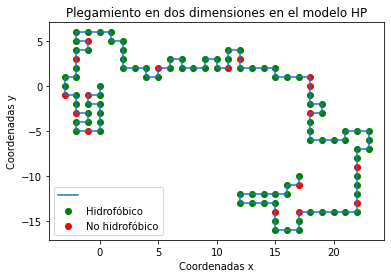


While INTERNO:


Valor it:  100
Valor t2:  59
-> Estructura:  ISWSESSSWWNENWWWWWNWWSSWSESWSSWSESWSSWSSWSWNWWSWWSEESWSSWWNWSWWWWSWWNNENNNWNNEESENNNWSWWNENNWNEENNENWNNEENEEES
-> Score:  1590.2899999999993
-> Variable t:  55.26834771623852


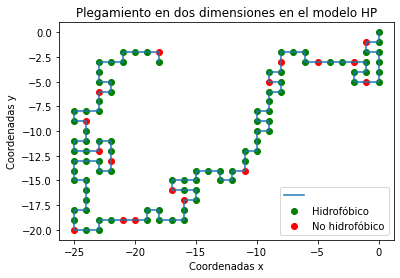


While INTERNO:


Valor it:  100
Valor t2:  60
-> Estructura:  ISSENENNWWNEEENNNNENWWWNNNEENESEESSEEENNENESSEESSENNESEESSWSSEEESEENESSESSESSWSSSSEENWNEESESESWWSESEESSWWSWSES
-> Score:  1659.4499999999996
-> Variable t:  54.71566423907614


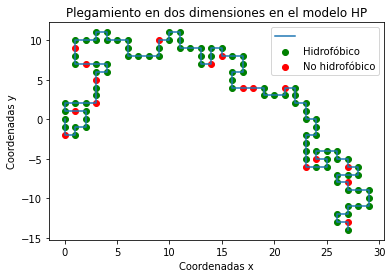


While INTERNO:


Valor it:  100
Valor t2:  61
-> Estructura:  IWNWSWWSSSESSWSWWSWSESSWWWNWSWNWWNWWNEENENEEENWNEEEESSENNNNWNWNNENNWWNNWNENNWWWNNNWNWWNNNNNNWNEENEENNENEESWSSW
-> Score:  1585.0899999999995
-> Variable t:  54.16850759668538


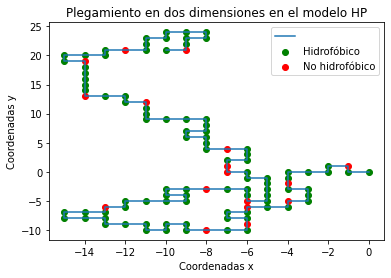


While INTERNO:


Valor it:  100
Valor t2:  62
-> Estructura:  INENWNNWWSESSWSSSWWSEEESESWSEESEESENESENENNESSEEESESWWSEESSESSWWWSWSEEENESEEEESWSWSWSESSESSWWWWWSWWWSSSWWNNNNW
-> Score:  1569.7199999999993
-> Variable t:  53.62682252071853


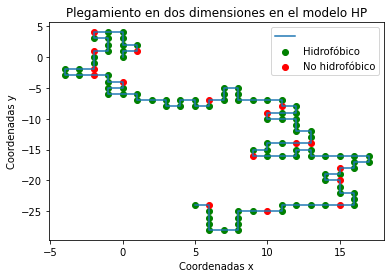


While INTERNO:


Valor it:  100
Valor t2:  63
-> Estructura:  IWNWSWWSWSESSWSWSWNWSSWNNWNENNNNWWSSWNWSSSSWNWSWSWWSWSSSWNNWWWNNENNWSWNWWSESSSWNNWSWSESEESSSESWSSEEESSSWWSESSS
-> Score:  1478.0499999999995
-> Variable t:  53.09055429551134


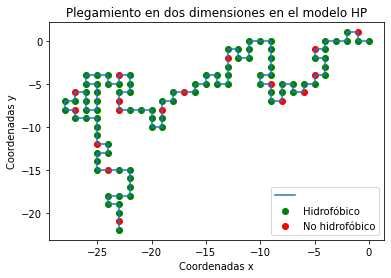


While INTERNO:


Valor it:  100
Valor t2:  64
-> Estructura:  IWWSESWWNWSWSSSWSSSENNEEENESEENENEEEESSEENNNESESEEENEEEEESSENNENENNWSWNNNWWNNWNEENNENNNNWNWWNENNNWWNENWNNEENNN
-> Score:  1688.7699999999993
-> Variable t:  52.55964875255623


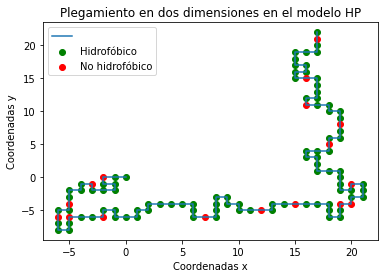


While INTERNO:


Valor it:  100
Valor t2:  65
-> Estructura:  INNENESESWSWSEESESWSESWSSESWSSESENNNNESSSESEESEENNENEEEEESWSEEESWSSENESSENNEEESWWSSWSSESSWSESWWWSEEEEEESEENEEN
-> Score:  1388.8099999999997
-> Variable t:  52.03405226503067


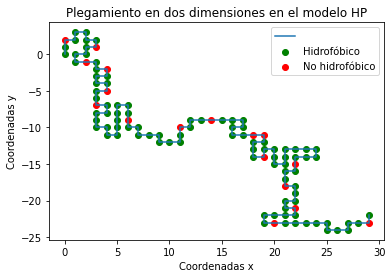


While INTERNO:


Valor it:  100
Valor t2:  66
-> Estructura:  IWSWSWNWWNWNWSSWSWNWWNENNNEENNWNWSWNNEEEEENENEENWWNNWWNNEESENEENESEENESSEESSSSEENNESENNENNNNESSSENNESSESESSSSS
-> Score:  1570.2999999999995
-> Variable t:  51.51371174238036


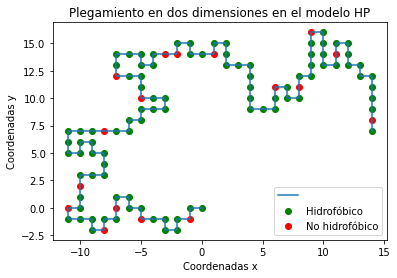


While INTERNO:


Valor it:  100
Valor t2:  67
-> Estructura:  IENNNESESENEENNENESESWWSEEEESSSWSESWWNNWWSWWSWWSEESSENENESSSSSSSWNWWSWWSEESENEEENNEENESENNNNESSESEEEEEENWNNWSS
-> Score:  1401.54
-> Variable t:  50.998574624956554


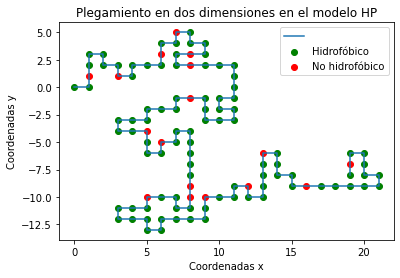


While INTERNO:


Valor it:  100
Valor t2:  68
-> Estructura:  IEENNEENNWSWNWSWSWNWWWWSESWWWSWNWWWNNESEENENWNEENEEENWNNEEEENNEESWSSESSENNENWNNNWWNENESENNWNNENWNNNNNNNWSWWSWN
-> Score:  1338.9399999999994
-> Variable t:  50.488588878706985


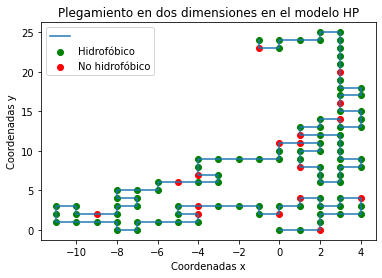


While INTERNO:


Valor it:  100
Valor t2:  69
-> Estructura:  ISSWSSSEENWNEENENNNNNEENWWNENWNNNENWWNENWWNWWWNWWWWNNWNWNNWWSSWWNENNNESENNENWNNWWWNENESEEENNESSEEENNWNNNNNWNEE
-> Score:  1471.0899999999997
-> Variable t:  49.98370298991991


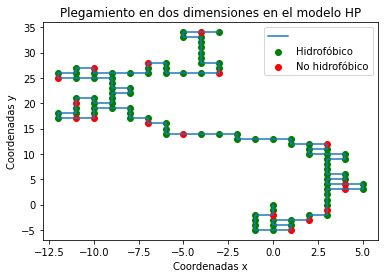


While INTERNO:


Valor it:  100
Valor t2:  70
-> Estructura:  ISSSEESEEEESWWSSSSSSENEENESEEESWSSEESWSSESSWWWWSWSSSSSWSWNNNWWNWSWSSWNNWSSWSESSWSSWNWNENWWSSWNNWSSSWSSWNWSSWSS
-> Score:  1540.8999999999996
-> Variable t:  49.483865960020715


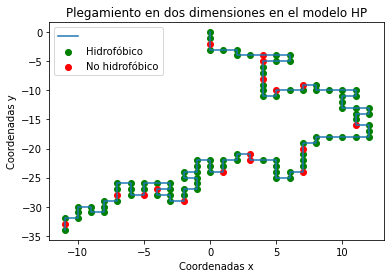


While INTERNO:


Valor it:  100
Valor t2:  71
-> Estructura:  INWSSWNNNWWNENWWSWSWSESSESWSSSSWSSSESSEEEESWWWWWNWWWSWNWWWWWWWWWSWWWNEENWWNWSSSSEESSESSSENEEESSEENESESESEEESWW
-> Score:  1460.6399999999996
-> Variable t:  48.98902730042051


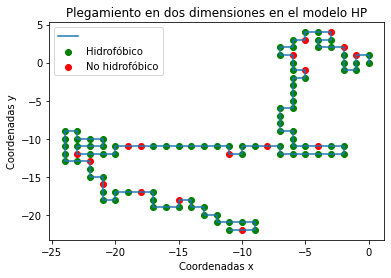


While INTERNO:


Valor it:  100
Valor t2:  72
-> Estructura:  IWNENNWWWWWNEENNNENENWWWSWNWWWWNWWSESSESSSSWWSEESENENESSWSWWWSSEESWWSSSSEEESESEENWNENENEENNEESSESESWSWSWNWWWNE
-> Score:  1559.7499999999993
-> Variable t:  48.4991370274163


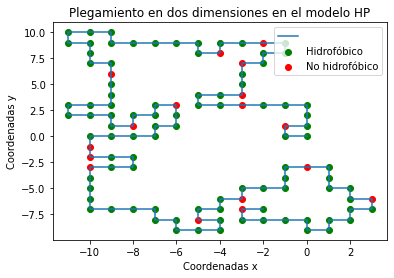


While INTERNO:


Valor it:  100
Valor t2:  73
-> Estructura:  IESSESENNNNNNWSSWNWNWSSWWNNNNNESENNWNENEENWWNNWSWWSWSSWSWSWSSWWSSSWSSWWWNNNWSWWWSEESSWWWSEESSWWSSESWWNWWNNWSWN
-> Score:  1555.1199999999997
-> Variable t:  48.01414565714214


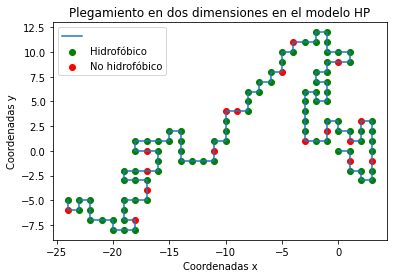


While INTERNO:


Valor it:  100
Valor t2:  74
-> Estructura:  INESSSENNEESSENNNENENWWNNEENENNENNNWNENEENWWNNNWNWWNWWNNEEEEEENNEESESSEESESENESSENNEESSSEENEEEENNWNENEEESSWWSS
-> Score:  1668.8899999999996
-> Variable t:  47.53400420057071


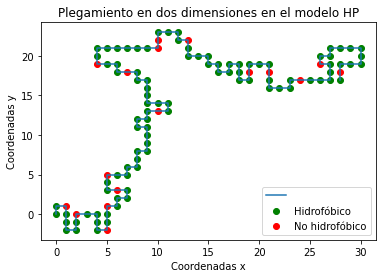


While INTERNO:


Valor it:  100
Valor t2:  75
-> Estructura:  IWWWWNWSSSSWWWSSSWWNWSWNNEENENNWSWWSWNNEENWNEEENENWNENEENNNWWWWWNNENNWNWNWWSESWWWSSWWNWNWNWNNWWWSESWSWWWNNEENN
-> Score:  1551.7399999999993
-> Variable t:  47.05866415856501


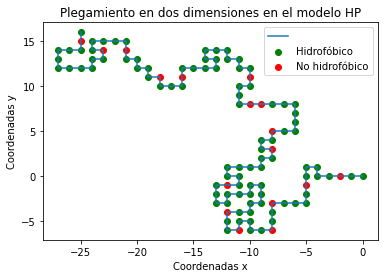


While INTERNO:


Valor it:  100
Valor t2:  76
-> Estructura:  INNNNNWSSSSSSSEENNESENNENESSWSSENEENESSWWSEESSSEENNNENNENEENNENNNNENNWNWNWWWSWNNWWNENNWNNNNESEESENESSWWSSESSEE
-> Score:  1411.6799999999998
-> Variable t:  46.58807751697936


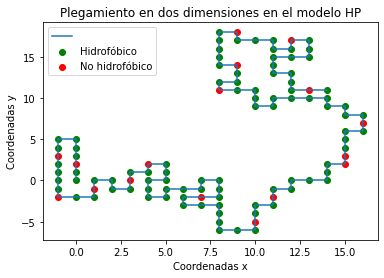


While INTERNO:


Valor it:  100
Valor t2:  77
-> Estructura:  ISWNNEENWWWNENWNNWNNWSSWSSWWNWSWWNWSWNNEENWWNWWSSSSESEEESSESWWSWWNNWSWNWNWNNWNWWSESWWWSWSSESWSESSESWWNNWWSWNNE
-> Score:  1354.6400000000003
-> Variable t:  46.12219674180957


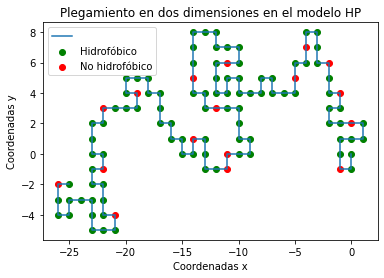


While INTERNO:


Valor it:  100
Valor t2:  78
-> Estructura:  IEESESWSEEESWWSWWWWSSEESSSSSWWSEESWSWNWNNWSSWSSESWWSSEEESSESSSSSESWSEEEESESENENEENENEEESEEESWSEEENESSWWSSESSEE
-> Score:  1572.809999999999
-> Variable t:  45.66097477439147


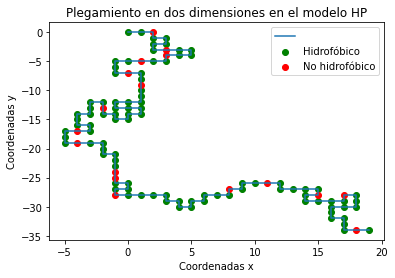


While INTERNO:


Valor it:  100
Valor t2:  79
-> Estructura:  INNENEESEEESWWSWNWSWSEESWWSESEENNESENEESSENEEESESWWSSESSWWSWWWWSESWWSSWWNWWWSWSWNWNWSSWNWWWWWWSWWSWSSWSEENNEES
-> Score:  1621.8999999999987
-> Variable t:  45.20436502664755


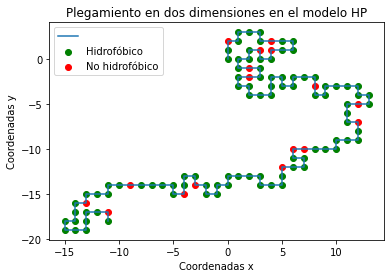


While INTERNO:


Valor it:  100
Valor t2:  80
-> Estructura:  ISESESSSENNEENWNNEEENEESWSEEENENNESSSWSWWSEESSEESWSESEEESSSSSWSSESWWWWNWNWWSESESWSWSESSSESWWSSSWWSWSSWSSSENENE
-> Score:  1512.829999999999
-> Variable t:  44.752321376381076


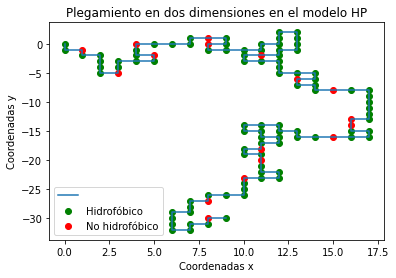


While INTERNO:


Valor it:  100
Valor t2:  81
-> Estructura:  INNENESSSSEESENESSESSWWWNWSSSSWSESWWWNWWWWWWNNWWNEENEENNENNNNENENNEENNNWNWWSESESWWNWNNNNNNEENEESENENNWSWNWNENE
-> Score:  1464.0399999999995
-> Variable t:  44.30479816261727


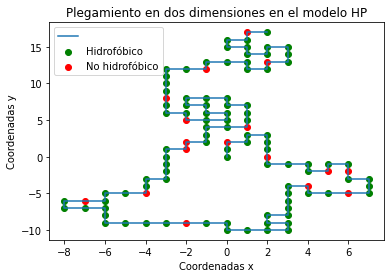


While INTERNO:


Valor it:  100
Valor t2:  82
-> Estructura:  IEENWNENNNNNEENWWWSSWNNNENWWWWNWSWWWNENNWNNNNNWWNNWNEENNNWWWWNNNWWNWSWWSWSWSESESWWNWNNNWNNNWSWWNWWNWWWSWNWNENE
-> Score:  1524.1899999999991
-> Variable t:  43.861750180991095


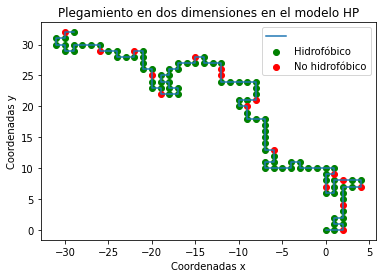


While INTERNO:


Valor it:  100
Valor t2:  83
-> Estructura:  ISSENESSWSSWNNWWNNWSWNNWWWSSWNWSSWNWNENWWWNENNWNENNEEENNNWWWSWSWNWWWSWWSWWNNWNWNEESESEENEEENWWWNWNENWWWWNWNENE
-> Score:  1438.3199999999995
-> Variable t:  43.42313267918119


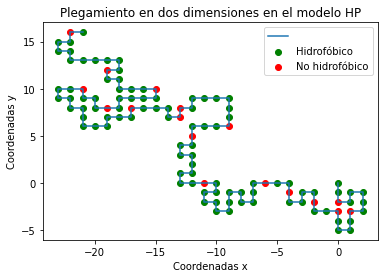


While INTERNO:


Valor it:  100
Valor t2:  84
-> Estructura:  IESENNNNWSSWNNWWNNNNWWWWWWSSWNNWWNENESENENENWWWNENNENNNWWNNENWWNENEENESEENENWNWNNNENNWWNNNNWWWWWSWWWSWWNNNNNWW
-> Score:  1627.139999999999
-> Variable t:  42.98890135238938


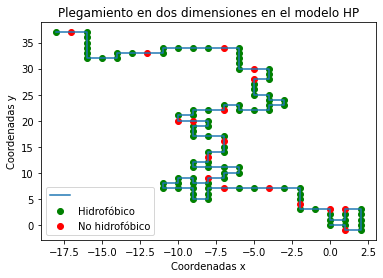


While INTERNO:


Valor it:  100
Valor t2:  85
-> Estructura:  ISWSSSWNWWWNNWSSSWSWWSSEEENNESSENEENESENENENWNNESESSEEENWNWNENWWNWWWWNENNESENEEEENENNWSWWWNWWNWWWNEENENENWWWWN
-> Score:  1400.4699999999996
-> Variable t:  42.559012338865486


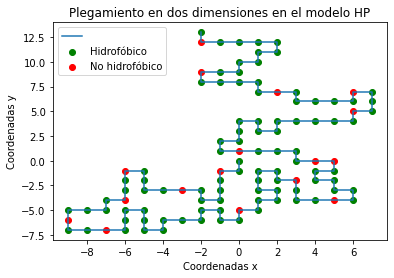


While INTERNO:


Valor it:  100
Valor t2:  86
-> Estructura:  IESSSSWNWWWWSEEESEEEENESSSENESEENESSWWSESESSEEESWSWWSEEESEESWSESWSWSSSWSESWSEEESEESEEESSEESEESENNESENNWNWWNNNE
-> Score:  1513.259999999999
-> Variable t:  42.133422215476834


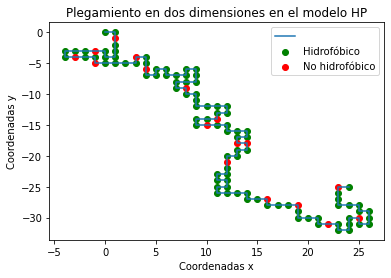


While INTERNO:


Valor it:  100
Valor t2:  87
-> Estructura:  ISSSSSWNWWWWSEESWWWSWSWSSSENESEENESSWSSESESSSEESWSWWSEEESSESWSSSWWNNWWNWSWNNNENENWNWSWNNNWNNNNWSSSWSWWWNWSWSES
-> Score:  1578.75
-> Variable t:  41.712087993322065


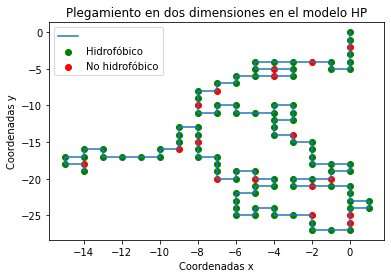


While INTERNO:


Valor it:  100
Valor t2:  88
-> Estructura:  IENESSWWSSWNWWWNEENWNWNWNNNWNEEENEEESEEEENESSESESESSENENEENESEEESSWNWWWSESWSWWSWSESENENESESESSENNNENNNESSEENWN
-> Score:  1548.5399999999997
-> Variable t:  41.29496711338884


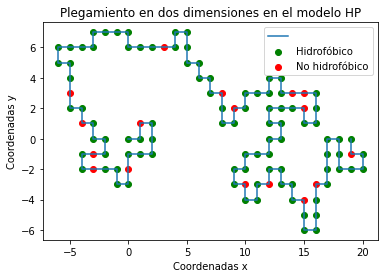


While INTERNO:


Valor it:  100
Valor t2:  89
-> Estructura:  IWSWWWNNWWNNWWWNEENNEEENWWWWNNNNWNNNEEEENWWNNNENENESENNWNNWWNWWWNNESEEENWNEESSEENNNWWNWNENENESENESSSWSSSSSWSWN
-> Score:  1491.64
-> Variable t:  40.882017442254956


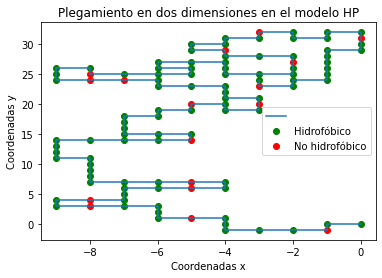


While INTERNO:


Valor it:  100
Valor t2:  90
-> Estructura:  INWSSWNNNWWWSEESWWWWSWNWSSSWNWWNNNENENEEENNNENENNWNEENNWNNWSWSSSWWNENNNWSWNNEENNWNWSSWSSWSWSWWSEESSSWSESESESSW
-> Score:  1465.2399999999998
-> Variable t:  40.473197267832404


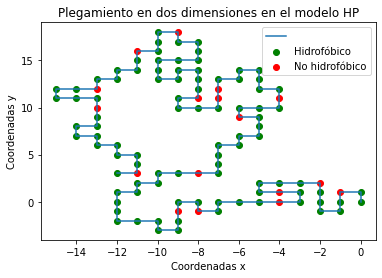


While INTERNO:


Valor it:  100
Valor t2:  91
-> Estructura:  ISENNEEENEEENNWWNNWWSWNWWSESWSSWNWNNENNNNNNNNNENWWWNNWWWSSSSWWWSWWNENNNWSWWWNWWNWWNNWWSSWWNWNWWWWNWNENNENNWWSE
-> Score:  1702.4899999999989
-> Variable t:  40.06846529515408


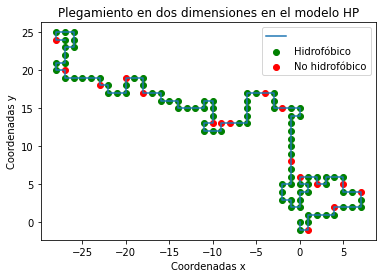


While INTERNO:


Valor it:  100
Valor t2:  92
-> Estructura:  IENWWWSSSEESESEESWSSENENEENNNWWNENENENNNWWNWWWNNNWNEENNEEEEESWSESSWNWSSEEEEESENNNNENWWSSWWNNENNNNENESESWSWSEEE
-> Score:  1515.1699999999998
-> Variable t:  39.66778064220254


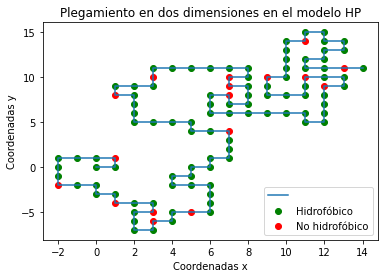


While INTERNO:


Valor it:  100
Valor t2:  93
-> Estructura:  INWSWNWNENWWWNWNWNWWSESWWSESSENESESSWSWNWWSESSWSSSWNNNWWNWSSSWSSWWWNWSWWWSSWNWSWSWNWSSESSSSSSENNNENESEESSWSESS
-> Score:  1510.2899999999997
-> Variable t:  39.27110283578051


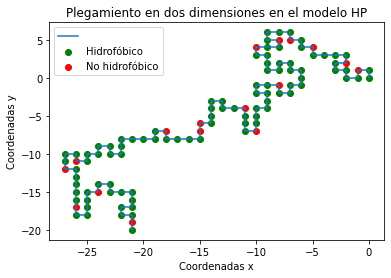


While INTERNO:


Valor it:  100
Valor t2:  94
-> Estructura:  IWSESSESSENNNENENENNWSWNNNNESENEEEENENESSWSSWSWSSSSWSSSWWSSSSSEESSWSWSWNNWNNENWNWNENWWSSWSESWSESSWSWNNNNWWSESS
-> Score:  1446.9700000000003
-> Variable t:  38.8783918074227


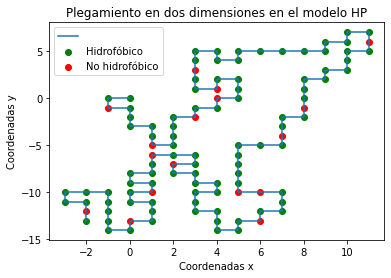


While INTERNO:


Valor it:  100
Valor t2:  95
-> Estructura:  IESESWSSWSEEEENENEESENEESSWSWWSWWWWWSSSWSSSWNWNWSWWWSSWNNNWSWNWWWSSESESWWWNWWSWNNNENWWSWWSESWSESWWSWNNNNWWSESS
-> Score:  1598.29
-> Variable t:  38.48960788934848


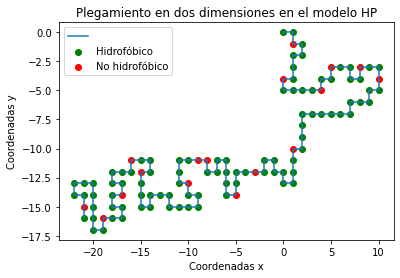


While INTERNO:


Valor it:  100
Valor t2:  96
-> Estructura:  IESENENNNWSWNNNENNNESSSEEESESWSWSSSSSENENNNESESENENENNESEENNESEESEEESEESWSSESESWWWWSEEESSEENESSESWWSWSWNWWSESW
-> Score:  1552.3899999999999
-> Variable t:  38.104711810454994


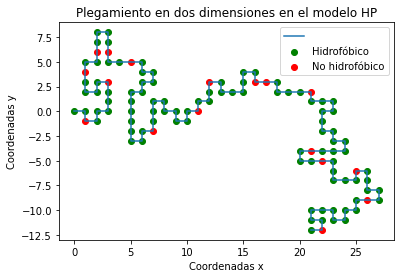


While INTERNO:


Valor it:  100
Valor t2:  97
-> Estructura:  ISSEESSWNWSSWSESSSSWNNWSWWNWWNWNNNNWWWSSENESSWWWWWSWSSWWSSEESSSWWSWNNWWNENNNNWWNEEENWWNEENWWWNENNENWNNESESENES
-> Score:  1375.3599999999994
-> Variable t:  37.72366469235045


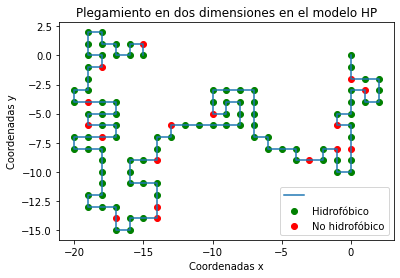


While INTERNO:


Valor it:  100
Valor t2:  98
-> Estructura:  ISSSWNWWNWSSWSEESSSWNNWSWSWSWNNNNNENNENNWSWNNEEESENENENENENWNNEENWNEENNEENWWWSSWWWWSEESWWSESSWNWWSSESSWNWNNNNE
-> Score:  1186.5299999999993
-> Variable t:  37.34642804542694


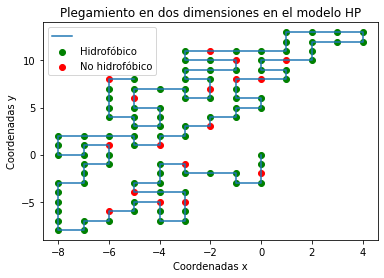


While INTERNO:


Valor it:  100
Valor t2:  99
-> Estructura:  ISEESWSWNWSWWSSSWWWNEENWNNWSWNNWSWNWNENNWSWNNNWWNWSWSWSWSEESSSWWWSWNNWWNENWWWSSWSSWSEESWWSESSWNWWSWWWSWNWNNNEE
-> Score:  1486.739999999999
-> Variable t:  36.97296376497267


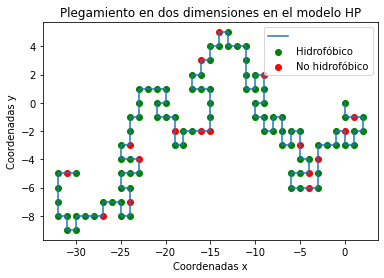


While INTERNO:


Valor it:  100
Valor t2:  100
-> Estructura:  IENNESENENWNNWSSWWSWNNWWWWSSWNNWSWNWNNNNWSWWSWWWNWSWWNWNWWWNNNEEENESSEESWSEEENESENENWWWNENNENESEEESSWSESENEEES
-> Score:  1455.0999999999997
-> Variable t:  36.60323412732294


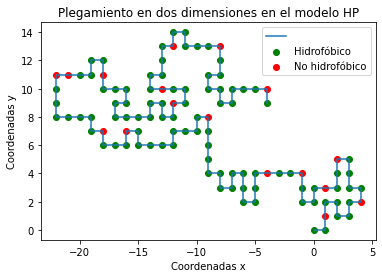

'IENNESENENWNNWSSWWSWNNWWWWSSWNNWSWNWNNNNWSWWSWWWNWSWWNWNWWWNNNEEENESSEESWSEEENESENENWWWNENNENESEEESSWSESENEEES'

In [40]:
#P01308 
#MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN
P01308 = 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'
prueba_simulated_annealing4(P01308)